### Deliverable 1: Preprocessing the Data for a Neural Network

In [86]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [87]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN','NAME'],axis=1,inplace=True)

In [88]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [89]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

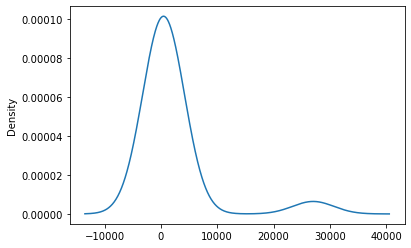

In [90]:
# Visualize the value counts of APPLICATION_TYPE
app_type = application_df["APPLICATION_TYPE"].value_counts()
app_type.plot.density()

In [91]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type[app_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [92]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

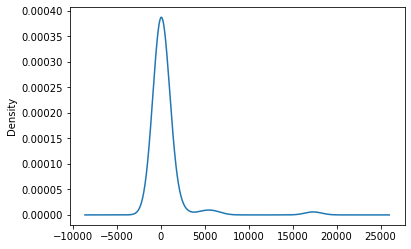

In [93]:
# Visualize the value counts of CLASSIFICATION
classification = application_df["CLASSIFICATION"].value_counts()
classification.plot.density()

In [94]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification[classification < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [95]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [96]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/ilan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [97]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
application_df.head()

STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
len(X_train_scaled[0])

43

In [25]:
X_train_scaled.shape

(25724, 43)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


2022-05-15 18:14:15.306665: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 5:04 - loss: 0.7310 - accuracy: 0.4688
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.7323 - accuracy: 0.5109  
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6826 - accuracy: 0.5875
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 0.6601 - accuracy: 0.6214


Epoch 1: saving model to checkpoints/weights.01.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.5849 - accuracy: 0.7071
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5834 - accuracy: 0.7079
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5827 - accuracy: 0.7092
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5818 - accuracy: 0.7101
Epoch 1: saving


Epoch 2: saving model to checkpoints/weights.02.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5547 - accuracy: 0.7338
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5568 - accuracy: 0.7324
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.5570 - accuracy: 0.7320
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
321/804 [==========>...................] - ETA


Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7287
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5565 - accuracy: 0.7286
Epoch 3/100
  1/804 [..............................] - ETA: 1s - loss: 0.5791 - accuracy: 0.6875
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5807 - accuracy: 0.7094
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 39/804 [>.............................] - ETA: 2s - 


Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.5563 - accuracy: 0.7279
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5561 - accuracy: 0.7279
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5558 - accuracy: 0.7283
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
572/804 [====================>.........] - ETA


Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7326
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5472 - accuracy: 0.7335
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5487 - accuracy: 0.7325
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.

785/804 [============================>.] - ETA: 0s - loss: 0.5504 - accuracy: 0.7304
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5513 - accuracy: 0.7297
Epoch 5/100
  1/804 [..............................] - ETA: 1s - loss: 0.4809 - accuracy: 0.8125
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
 22/804 [..............................] - ETA: 1s - loss: 0.5062 - accuracy: 0.7741
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

515/804 [==================>...........] - ETA: 0s - loss: 0.5490 - accuracy: 0.7335
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5486 - accuracy: 0.7344
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5504 - accuracy: 0.7326
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5502 - accuracy: 0.7325
Epoch 5: saving


Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.5497 - accuracy: 0.7322
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.5486 - accuracy: 0.7323
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7343
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.

785/804 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7328
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5493 - accuracy: 0.7335
Epoch 7/100

Epoch 7: saving model to checkpoints/weights.07.hdf5
  1/804 [..............................] - ETA: 9s - loss: 0.5433 - accuracy: 0.7500
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5549 - accuracy: 0.7352
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 36/804 [>.............................] - ETA: 2s - 


Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.5520 - accuracy: 0.7296
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5524 - accuracy: 0.7296
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.5512 - accuracy: 0.7308
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.


Epoch 8: saving model to checkpoints/weights.08.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.5438 - accuracy: 0.7397
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5435 - accuracy: 0.7399
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5451 - accuracy: 0.7378
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
321/804 [==========>...................] - ETA


Epoch 8: saving model to checkpoints/weights.08.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5476 - accuracy: 0.7346
Epoch 9/100
  1/804 [..............................] - ETA: 1s - loss: 0.6559 - accuracy: 0.6562
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5655 - accuracy: 0.7286
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 40/804 [>.............................] - ETA: 1s - loss: 0.5512 - accuracy: 0.7391
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

527/804 [==================>...........] - ETA: 0s - loss: 0.5458 - accuracy: 0.7361
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5448 - accuracy: 0.7369
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5450 - accuracy: 0.7365
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5449 - accuracy: 0.7364
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving


Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5451 - accuracy: 0.7385
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7376
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7364
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkp

789/804 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7338
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5469 - accuracy: 0.7334
Epoch 11/100
  1/804 [..............................] - ETA: 1s - loss: 0.4917 - accuracy: 0.7812
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7250
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 40/804 [>.............................] 

510/804 [==================>...........] - ETA: 0s - loss: 0.5438 - accuracy: 0.7358
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5434 - accuracy: 0.7362
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.5437 - accuracy: 0.7359
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5441 - accuracy: 0.7354
Epo

231/804 [=======>......................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7417
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7422
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7426
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.5409 - accuracy: 0.7397
Epo


Epoch 12: saving model to checkpoints/weights.12.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7356
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5459 - accuracy: 0.7354
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5459 - accuracy: 0.7357
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5460 - accuracy: 0.7356
Epoch 13/100
  1/804 [..............................] - ETA: 1s - loss: 0.5929 - accuracy: 0.6562
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: s

473/804 [================>.............] - ETA: 0s - loss: 0.5455 - accuracy: 0.7324
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.5457 - accuracy: 0.7321
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 0.5469 - accuracy: 0.7316
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5470 - accuracy: 0.7314
Epo


Epoch 14: saving model to checkpoints/weights.14.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.5517 - accuracy: 0.7255
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5493 - accuracy: 0.7299
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5500 - accuracy: 0.7296
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.5518 - accuracy: 0.7286
Epo

723/804 [=========================>....] - ETA: 0s - loss: 0.5454 - accuracy: 0.7350
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5453 - accuracy: 0.7351
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7347
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5454 - accuracy: 0.7353
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epo


Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.5469 - accuracy: 0.7328
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5467 - accuracy: 0.7338
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5461 - accuracy: 0.7339
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkp

166/804 [=====>........................] - ETA: 1s - loss: 0.5409 - accuracy: 0.7353
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7369
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.5408 - accuracy: 0.7355
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7370
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epo


Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5455 - accuracy: 0.7336
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5453 - accuracy: 0.7338
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5456 - accuracy: 0.7336
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
755/804 [========================


Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5439 - accuracy: 0.7395
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 0.5437 - accuracy: 0.7392
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.5451 - accuracy: 0.7377
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkp


Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7393
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
167/804 [=====>........................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7388
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 0.5448 - accuracy: 0.7376
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkp


Epoch 18: saving model to checkpoints/weights.18.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5462 - accuracy: 0.7323
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5464 - accuracy: 0.7320
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5463 - accuracy: 0.7323
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
724/804 [========================

380/804 [=============>................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7356
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5428 - accuracy: 0.7361
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5422 - accuracy: 0.7366
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
443/804 [===============>........


Epoch 20: saving model to checkpoints/weights.20.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.5526 - accuracy: 0.7291
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
114/804 [===>..........................] - ETA: 1s - loss: 0.5500 - accuracy: 0.7305
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 0.5498 - accuracy: 0.7320
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.5458 - accuracy: 0.7353
Epo

617/804 [======================>.......] - ETA: 0s - loss: 0.5434 - accuracy: 0.7360
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5431 - accuracy: 0.7358
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5437 - accuracy: 0.7356
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5441 - accuracy: 0.7356
Epo


Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7359
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5428 - accuracy: 0.7359
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.5434 - accuracy: 0.7350
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkp


Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5548 - accuracy: 0.7269
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7368
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7432
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
114/804 [===>....................


Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7369
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5436 - accuracy: 0.7359
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5433 - accuracy: 0.7364
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkp


Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7442
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7428
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7413
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkp

 18/804 [..............................] - ETA: 2s - loss: 0.5498 - accuracy: 0.7465
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.5428 - accuracy: 0.7410
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7423
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7432
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epo

541/804 [===================>..........] - ETA: 0s - loss: 0.5418 - accuracy: 0.7384
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7387
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5425 - accuracy: 0.7373
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5428 - accuracy: 0.7368
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epo


Epoch 25: saving model to checkpoints/weights.25.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7432
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7449
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7444
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7437
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epo

719/804 [=========================>....] - ETA: 0s - loss: 0.5422 - accuracy: 0.7367
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5421 - accuracy: 0.7371
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5428 - accuracy: 0.7366
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5423 - accuracy: 0.7370
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
780/


Epoch 26: saving model to checkpoints/weights.26.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7422
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7426
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7412
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7413
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epo


Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7390
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7376
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7389
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7436
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epo


Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7385
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5416 - accuracy: 0.7384
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5425 - accuracy: 0.7378
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5431 - accuracy: 0.7374
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epo


Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.5493 - accuracy: 0.7305
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.5496 - accuracy: 0.7296
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5489 - accuracy: 0.7307
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.5473 - accuracy: 0.7318
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epo


Epoch 28: saving model to checkpoints/weights.28.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5407 - accuracy: 0.7387
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5411 - accuracy: 0.7383
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5413 - accuracy: 0.7383
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5419 - accuracy: 0.7379
Epoch 29/100
  1/804 [..............................] - ETA: 2s - loss: 0.5948 - accuracy: 0.6562
Epoch 29: s


Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7390
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5398 - accuracy: 0.7399
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5404 - accuracy: 0.7390
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5404 - accuracy: 0.7386
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epo


Epoch 30: saving model to checkpoints/weights.30.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7413
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7397
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7366
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7374
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epo

604/804 [=====================>........] - ETA: 0s - loss: 0.5432 - accuracy: 0.7350
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5438 - accuracy: 0.7347
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5439 - accuracy: 0.7348
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5437 - accuracy: 0.7354
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 

280/804 [=========>....................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7375
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7379
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7388
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7377
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
340/


Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5417 - accuracy: 0.7381
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7380
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7384
Epoch 31: saving model to checkpoints/weights.31.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5415 - accuracy: 0.7383
Epoch 32/100

Epoch 32: saving model to checkpoints/weights.32.hdf5
  1/804 [..............................] - ETA: 13s - loss: 0.5782 - accuracy: 0.6562
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: 

411/804 [==============>...............] - ETA: 1s - loss: 0.5362 - accuracy: 0.7419
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7412
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5365 - accuracy: 0.7421
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5363 - accuracy: 0.7419
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5361 - accuracy: 0.7418
Epoch 32: saving model to che


Epoch 33: saving model to checkpoints/weights.33.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7328
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.5417 - accuracy: 0.7340
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.5420 - accuracy: 0.7349
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.5418 - accuracy: 0.7359
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
122/


Epoch 33: saving model to checkpoints/weights.33.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5382 - accuracy: 0.7397
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7403
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.5375 - accuracy: 0.7401
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.5377 - accuracy: 0.7404
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 

175/804 [=====>........................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7264
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5509 - accuracy: 0.7264
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.5503 - accuracy: 0.7275
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7312
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7314
Epoch 34: saving model to che

622/804 [======================>.......] - ETA: 0s - loss: 0.5408 - accuracy: 0.7377
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5408 - accuracy: 0.7378
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5408 - accuracy: 0.7376
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5405 - accuracy: 0.7382
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5408 - accuracy: 0.7381
Epoch 34: saving model to che

268/804 [=========>....................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7372
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7382
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7372
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7374
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7371
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to che

718/804 [=========================>....] - ETA: 0s - loss: 0.5416 - accuracy: 0.7381
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5407 - accuracy: 0.7388
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5411 - accuracy: 0.7383
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5410 - accuracy: 0.7383
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7388
Epoch 35: saving model to che

353/804 [============>.................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7365
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7370
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7376
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7378
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7378
Epoch 36: saving model to che

Epoch 37/100

Epoch 37: saving model to checkpoints/weights.37.hdf5
  1/804 [..............................] - ETA: 14s - loss: 0.4205 - accuracy: 0.8438
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7380 
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.5225 - accuracy: 0.7565
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7439
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 48/804 [>.............................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7461
Epoch 37: savi


Epoch 37: saving model to checkpoints/weights.37.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7341
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5435 - accuracy: 0.7340
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7336
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5433 - accuracy: 0.7341
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7336
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to che

 69/804 [=>............................] - ETA: 4s - loss: 0.5286 - accuracy: 0.7505
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.5275 - accuracy: 0.7484
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.5360 - accuracy: 0.7406
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
102/804 [==>...........................] - ETA: 4s - loss: 0.5410 - accuracy: 0.7371
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
113/804 [===>..........................] - ETA: 4s - loss: 0.5398 - accuracy: 0.7378
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to che

497/804 [=================>............] - ETA: 1s - loss: 0.5441 - accuracy: 0.7361
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5443 - accuracy: 0.7359
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5445 - accuracy: 0.7356
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5440 - accuracy: 0.7359
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5435 - accuracy: 0.7364
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to che

117/804 [===>..........................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7407
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7388
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.5375 - accuracy: 0.7388
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.5384 - accuracy: 0.7392
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7402
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to che

548/804 [===================>..........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7397
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7391
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.5417 - accuracy: 0.7388
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.5422 - accuracy: 0.7384
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7392
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
602/804 [=====================


Epoch 40: saving model to checkpoints/weights.40.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.5284 - accuracy: 0.7452
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.5291 - accuracy: 0.7439
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.5299 - accuracy: 0.7431
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
205/804 [======>.......................] - ETA: 3s - loss: 0.5316 - accuracy: 0.7418
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7399
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to che

594/804 [=====================>........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7409
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7402
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5383 - accuracy: 0.7408
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5381 - accuracy: 0.7411
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5383 - accuracy: 0.7405
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
644/804 [=====================


Epoch 41: saving model to checkpoints/weights.41.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.5334 - accuracy: 0.7402
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7381
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.5320 - accuracy: 0.7391
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5341 - accuracy: 0.7372
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7361
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to che


Epoch 41: saving model to checkpoints/weights.41.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5399 - accuracy: 0.7374
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7374
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7376
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5394 - accuracy: 0.7379
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7379
Epoch 41: saving model to che

254/804 [========>.....................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7388
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7380
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
275/804 [=========>....................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7389
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7394
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7394
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
301/804 [==========>..........

671/804 [========================>.....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7374
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7372
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7367
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5408 - accuracy: 0.7369
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5409 - accuracy: 0.7369
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
721/804 [=====================

283/804 [=========>....................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7380
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7391
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7379
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7374
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7386
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
333/804 [===========>.........

702/804 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7391
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7390
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5377 - accuracy: 0.7394
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5375 - accuracy: 0.7399
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5381 - accuracy: 0.7397
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
755/804 [=====================


Epoch 44: saving model to checkpoints/weights.44.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7382
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7375
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7367
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7379
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7373
Epoch 44: saving model to checkpoints/weights.44.hdf5
367/804 [============>........

734/804 [==========================>...] - ETA: 0s - loss: 0.5407 - accuracy: 0.7374
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7380
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5409 - accuracy: 0.7377
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5408 - accuracy: 0.7378
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5401 - accuracy: 0.7382
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
787/804 [=====================


Epoch 45: saving model to checkpoints/weights.45.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7413
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7411
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7416
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7412
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7407
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to che


Epoch 45: saving model to checkpoints/weights.45.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7408
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5392 - accuracy: 0.7404
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.7403
Epoch 45: saving model to checkpoints/weights.45.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5395 - accuracy: 0.7400
Epoch 46/100
  1/804 [..............................] - ETA: 3s - loss: 0.4707 - accuracy: 0.7812
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5378 -

390/804 [=============>................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7389
Epoch 46: saving model to checkpoints/weights.46.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7391
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.5397 - accuracy: 0.7393
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5405 - accuracy: 0.7389
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.5401 - accuracy: 0.7387
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
441/804 [===============>.....

  1/804 [..............................] - ETA: 17s - loss: 0.5423 - accuracy: 0.7188
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.5351 - accuracy: 0.7273 
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 21/804 [..............................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7158
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 32/804 [>.............................] - ETA: 3s - loss: 0.5429 - accuracy: 0.7246
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5431 - accuracy: 0.7247
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 52/804 [>..................

429/804 [===============>..............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7418
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5375 - accuracy: 0.7414
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5385 - accuracy: 0.7402
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5382 - accuracy: 0.7406
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7412
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to che

 44/804 [>.............................] - ETA: 3s - loss: 0.5386 - accuracy: 0.7322
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7309
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7285
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.5428 - accuracy: 0.7289
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 83/804 [==>...........................] - ETA: 3s - loss: 0.5411 - accuracy: 0.7319
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 94/804 [==>..................

471/804 [================>.............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7391
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7385
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7376
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7379
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7379
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to che

 91/804 [==>...........................] - ETA: 3s - loss: 0.5302 - accuracy: 0.7500
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7450
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7455
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
122/804 [===>..........................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7459
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7427
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to che

513/804 [==================>...........] - ETA: 1s - loss: 0.5376 - accuracy: 0.7407
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7410
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7409
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5382 - accuracy: 0.7396
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7401
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
566/804 [====================>

135/804 [====>.........................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7382
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7408
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7436
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
166/804 [=====>........................] - ETA: 3s - loss: 0.5361 - accuracy: 0.7423
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7405
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
184/804 [=====>...............

563/804 [====================>.........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7391
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7387
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7389
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5382 - accuracy: 0.7391
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7392
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
612/804 [=====================

183/804 [=====>........................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7372
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7383
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7390
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7376
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7370
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to che

610/804 [=====================>........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7382
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7378
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5401 - accuracy: 0.7374
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7376
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7378
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
660/804 [=====================

231/804 [=======>......................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7405
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7421
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7419
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7408
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7397
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
282/804 [=========>...........

657/804 [=======================>......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7405
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7404
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7407
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7407
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5389 - accuracy: 0.7400
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
707/804 [=====================

267/804 [========>.....................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7427
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7432
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7454
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7462
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7462
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
318/804 [==========>..........

693/804 [========================>.....] - ETA: 0s - loss: 0.5356 - accuracy: 0.7427
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5358 - accuracy: 0.7424
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7423
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5360 - accuracy: 0.7422
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5361 - accuracy: 0.7419
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to che

304/804 [==========>...................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7440
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.5336 - accuracy: 0.7437
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.5347 - accuracy: 0.7426
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7440
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7435
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
353/804 [============>........


Epoch 54: saving model to checkpoints/weights.54.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7412
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7407
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7400
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5383 - accuracy: 0.7398
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5381 - accuracy: 0.7400
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to che

349/804 [============>.................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7408
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7406
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7412
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7411
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.5401 - accuracy: 0.7398
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
403/804 [==============>......


Epoch 55: saving model to checkpoints/weights.55.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5393 - accuracy: 0.7389
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5392 - accuracy: 0.7395
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.7400
Epoch 55: saving model to checkpoints/weights.55.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5387 - accuracy: 0.7400
Epoch 56/100
  1/804 [..............................] - ETA: 2s - loss: 0.5198 - accuracy: 0.7500
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.4967 - accuracy: 0.7784
Epoch 56: saving model to checkpoints

393/804 [=============>................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7451
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.5356 - accuracy: 0.7449
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5358 - accuracy: 0.7447
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5358 - accuracy: 0.7444
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7434
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to che

 11/804 [..............................] - ETA: 4s - loss: 0.5205 - accuracy: 0.7472 
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 21/804 [..............................] - ETA: 3s - loss: 0.5429 - accuracy: 0.7292
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 32/804 [>.............................] - ETA: 3s - loss: 0.5316 - accuracy: 0.7451
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5398 - accuracy: 0.7376
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7378
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 64/804 [=>..................

440/804 [===============>..............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7395
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7396
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7396
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5413 - accuracy: 0.7391
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7393
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to che

 62/804 [=>............................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7339
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7391
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 83/804 [==>...........................] - ETA: 3s - loss: 0.5386 - accuracy: 0.7387
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 0.5359 - accuracy: 0.7410
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
106/804 [==>...........................] - ETA: 3s - loss: 0.5375 - accuracy: 0.7397
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to che

493/804 [=================>............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7440
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7434
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5337 - accuracy: 0.7435
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5348 - accuracy: 0.7425
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5352 - accuracy: 0.7421
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to che

108/804 [===>..........................] - ETA: 3s - loss: 0.5470 - accuracy: 0.7300
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7315
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.5452 - accuracy: 0.7306
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7281
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.5479 - accuracy: 0.7262
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
162/804 [=====>...............


Epoch 59: saving model to checkpoints/weights.59.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7390
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5397 - accuracy: 0.7389
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7397
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5391 - accuracy: 0.7395
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7395
Epoch 59: saving model to che

158/804 [====>.........................] - ETA: 3s - loss: 0.5371 - accuracy: 0.7443
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.5354 - accuracy: 0.7450
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.5345 - accuracy: 0.7458
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7436
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7439
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to che

587/804 [====================>.........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7399
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7396
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7396
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7393
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7399
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to che

202/804 [======>.......................] - ETA: 3s - loss: 0.5286 - accuracy: 0.7509
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.5291 - accuracy: 0.7512
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7510
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7492
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.5289 - accuracy: 0.7499
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
254/804 [========>............

625/804 [======================>.......] - ETA: 0s - loss: 0.5383 - accuracy: 0.7406
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5375 - accuracy: 0.7413
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7420
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7415
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7416
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
677/804 [=====================


Epoch 62: saving model to checkpoints/weights.62.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7379
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7381
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7392
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7378
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7377
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to che

683/804 [========================>.....] - ETA: 0s - loss: 0.5379 - accuracy: 0.7406
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7404
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7406
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7408
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7406
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to che

307/804 [==========>...................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7409
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7417
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7415
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7422
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.5356 - accuracy: 0.7416
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
358/804 [============>........


Epoch 63: saving model to checkpoints/weights.63.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7404
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5376 - accuracy: 0.7407
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5381 - accuracy: 0.7402
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5378 - accuracy: 0.7401
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5379 - accuracy: 0.7398
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to che

338/804 [===========>..................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7411
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7411
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7416
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7421
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.5342 - accuracy: 0.7421
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
388/804 [=============>.......

758/804 [===========================>..] - ETA: 0s - loss: 0.5380 - accuracy: 0.7399
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5380 - accuracy: 0.7396
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5378 - accuracy: 0.7398
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7398
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7401
Epoch 64: saving model to checkpoints/weights.64.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5379 - accuracy: 0.7

369/804 [============>.................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7402
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7410
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7408
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7404
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.5367 - accuracy: 0.7405
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
419/804 [==============>......

789/804 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7400
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7399
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5373 - accuracy: 0.7400
Epoch 66/100
  1/804 [..............................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7500
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.5028 - accuracy: 0.7670
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.5081 - accuracy: 0.7560
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints

400/804 [=============>................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7409
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.5371 - accuracy: 0.7410
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.5367 - accuracy: 0.7408
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.5359 - accuracy: 0.7418
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5372 - accuracy: 0.7411
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
450/804 [===============>.....


Epoch 67: saving model to checkpoints/weights.67.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.4967 - accuracy: 0.7557 
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.5279 - accuracy: 0.7440
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.5196 - accuracy: 0.7530
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
 41/804 [>.............................] - ETA: 5s - loss: 0.5136 - accuracy: 0.7607
Epoch 67: saving model to checkpoints/weights.67.hdf5
 46/804 [>.............................] - ETA: 5s - loss: 0.5148 - accuracy: 0.7615
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
 56/804 [=>..................


Epoch 67: saving model to checkpoints/weights.67.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.5362 - accuracy: 0.7418
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.5370 - accuracy: 0.7412
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7404
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5382 - accuracy: 0.7401
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7398
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to che

 37/804 [>.............................] - ETA: 4s - loss: 0.5568 - accuracy: 0.7230
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.5551 - accuracy: 0.7281
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.5489 - accuracy: 0.7303
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.5527 - accuracy: 0.7262
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.5452 - accuracy: 0.7330
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 87/804 [==>..................

457/804 [================>.............] - ETA: 1s - loss: 0.5388 - accuracy: 0.7393
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7398
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7400
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.5382 - accuracy: 0.7399
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7404
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
507/804 [=================>...

 68/804 [=>............................] - ETA: 3s - loss: 0.5267 - accuracy: 0.7463
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.5298 - accuracy: 0.7440
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5284 - accuracy: 0.7433
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.5286 - accuracy: 0.7437
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.5287 - accuracy: 0.7437
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
118/804 [===>.................

488/804 [=================>............] - ETA: 1s - loss: 0.5358 - accuracy: 0.7405
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5362 - accuracy: 0.7401
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7395
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5362 - accuracy: 0.7402
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.5361 - accuracy: 0.7405
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
538/804 [===================>.

 94/804 [==>...........................] - ETA: 3s - loss: 0.5382 - accuracy: 0.7400
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7389
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.5419 - accuracy: 0.7360
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.5436 - accuracy: 0.7354
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7374
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
144/804 [====>................

509/804 [=================>............] - ETA: 1s - loss: 0.5415 - accuracy: 0.7386
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7390
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5402 - accuracy: 0.7392
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7396
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.5400 - accuracy: 0.7395
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
559/804 [===================>.

120/804 [===>..........................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7419
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7428
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.5318 - accuracy: 0.7435
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.5315 - accuracy: 0.7433
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.5334 - accuracy: 0.7432
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
170/804 [=====>...............


Epoch 71: saving model to checkpoints/weights.71.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.5356 - accuracy: 0.7413
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.5350 - accuracy: 0.7414
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.5352 - accuracy: 0.7415
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.5353 - accuracy: 0.7412
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7410
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to che

151/804 [====>.........................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7397
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7401
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.5411 - accuracy: 0.7394
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7419
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7433
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
201/804 [======>..............

571/804 [====================>.........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7403
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.5378 - accuracy: 0.7394
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.5377 - accuracy: 0.7393
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7391
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.5384 - accuracy: 0.7387
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
621/804 [=====================

182/804 [=====>........................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7406
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.5333 - accuracy: 0.7419
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
202/804 [======>.......................] - ETA: 3s - loss: 0.5344 - accuracy: 0.7409
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.5344 - accuracy: 0.7412
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.5336 - accuracy: 0.7416
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
232/804 [=======>.............

602/804 [=====================>........] - ETA: 1s - loss: 0.5376 - accuracy: 0.7411
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7415
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.5371 - accuracy: 0.7416
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5371 - accuracy: 0.7414
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5370 - accuracy: 0.7409
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
652/804 [=====================

213/804 [======>.......................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7399
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
223/804 [=======>......................] - ETA: 3s - loss: 0.5311 - accuracy: 0.7422
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
233/804 [=======>......................] - ETA: 3s - loss: 0.5307 - accuracy: 0.7425
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 0.5318 - accuracy: 0.7425
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 0.5333 - accuracy: 0.7417
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
263/804 [========>............

633/804 [======================>.......] - ETA: 1s - loss: 0.5365 - accuracy: 0.7400
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5369 - accuracy: 0.7399
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7395
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7398
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7390
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
683/804 [=====================

244/804 [========>.....................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7412
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
254/804 [========>.....................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7410
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7399
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
274/804 [=========>....................] - ETA: 3s - loss: 0.5365 - accuracy: 0.7401
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
284/804 [=========>....................] - ETA: 3s - loss: 0.5351 - accuracy: 0.7414
Epoch 75: saving model to checkpoints/weights.75.hdf5
293/804 [=========>....................] - ETA: 3s - loss: 0.5354 - accuracy: 0.7414


664/804 [=======================>......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7397
Epoch 75: saving model to checkpoints/weights.75.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7398
Epoch 75: saving model to checkpoints/weights.75.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5377 - accuracy: 0.7397
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7387
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7385
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7388
Epoch 75: saving model to checkpoints/weights.75.hdf5



270/804 [=========>....................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7358
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
280/804 [=========>....................] - ETA: 3s - loss: 0.5429 - accuracy: 0.7355
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
290/804 [=========>....................] - ETA: 3s - loss: 0.5442 - accuracy: 0.7350
Epoch 76: saving model to checkpoints/weights.76.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7358
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7359
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7368



Epoch 76: saving model to checkpoints/weights.76.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5394 - accuracy: 0.7386
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5395 - accuracy: 0.7383
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7387
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5386 - accuracy: 0.7388
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5376 - accuracy: 0.7395
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to che


Epoch 77: saving model to checkpoints/weights.77.hdf5
301/804 [==========>...................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7441
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7436
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.5354 - accuracy: 0.7430
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7419
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7409
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to che

716/804 [=========================>....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7415
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.7409
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5367 - accuracy: 0.7410
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5374 - accuracy: 0.7402
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5368 - accuracy: 0.7405
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
766/804 [=====================

327/804 [===========>..................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7448
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.5289 - accuracy: 0.7450
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.5301 - accuracy: 0.7452
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7447
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7446
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
377/804 [=============>.......


Epoch 78: saving model to checkpoints/weights.78.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5377 - accuracy: 0.7410
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5376 - accuracy: 0.7409
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7409
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7410
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.7411
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to che

358/804 [============>.................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7359
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7365
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7361
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7361
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7364
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
408/804 [==============>......


Epoch 79: saving model to checkpoints/weights.79.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5369 - accuracy: 0.7403
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5368 - accuracy: 0.7406
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5371 - accuracy: 0.7405
Epoch 80/100
  1/804 [..............................] - ETA: 2s - loss: 0.6628 - accuracy: 0.7188
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.5578 - accuracy: 0.7222
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.5554 -

384/804 [=============>................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7381
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7385
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.5387 - accuracy: 0.7389
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.5389 - accuracy: 0.7387
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.5391 - accuracy: 0.7381
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
434/804 [===============>.....

804/804 [==============================] - 5s 6ms/step - loss: 0.5367 - accuracy: 0.7410
Epoch 81/100
  1/804 [..............................] - ETA: 3s - loss: 0.5325 - accuracy: 0.7812
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.5715 - accuracy: 0.7063
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.5497 - accuracy: 0.7219
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.5408 - accuracy: 0.7385
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.5348 - accuracy: 0.7414
Epoch 81: saving model to checkpoints

415/804 [==============>...............] - ETA: 2s - loss: 0.5345 - accuracy: 0.7436
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.5346 - accuracy: 0.7433
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.5332 - accuracy: 0.7443
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.5340 - accuracy: 0.7437
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.5336 - accuracy: 0.7437
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
465/804 [================>....

 11/804 [..............................] - ETA: 4s - loss: 0.5471 - accuracy: 0.7102 
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.5363 - accuracy: 0.7232
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.5395 - accuracy: 0.7298
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.5460 - accuracy: 0.7287
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.5419 - accuracy: 0.7322
Epoch 82: saving model to checkpoints/weights.82.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.5465 - accuracy: 0.7276


Epoch 82: saving model to checkpoints/weights.82.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.5359 - accuracy: 0.7387
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 0.5355 - accuracy: 0.7390
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.5356 - accuracy: 0.7388
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5350 - accuracy: 0.7393
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5366 - accuracy: 0.7381
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to che


Epoch 83: saving model to checkpoints/weights.83.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.5447 - accuracy: 0.7354
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7401
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7397
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.5396 - accuracy: 0.7407
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.5418 - accuracy: 0.7392
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to che

467/804 [================>.............] - ETA: 1s - loss: 0.5352 - accuracy: 0.7426
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5355 - accuracy: 0.7419
Epoch 83: saving model to checkpoints/weights.83.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.5357 - accuracy: 0.7417
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7420
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.5362 - accuracy: 0.7413
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5371 - accuracy: 0.7408


 78/804 [=>............................] - ETA: 4s - loss: 0.5378 - accuracy: 0.7464
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.5348 - accuracy: 0.7486
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.5330 - accuracy: 0.7500
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.5327 - accuracy: 0.7503
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.5295 - accuracy: 0.7521
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
128/804 [===>.................

498/804 [=================>............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7431
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5343 - accuracy: 0.7430
Epoch 84: saving model to checkpoints/weights.84.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.5339 - accuracy: 0.7433
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5342 - accuracy: 0.7430
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.5344 - accuracy: 0.7427
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.5345 - accuracy: 0.7431


109/804 [===>..........................] - ETA: 4s - loss: 0.5345 - accuracy: 0.7417
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
119/804 [===>..........................] - ETA: 4s - loss: 0.5304 - accuracy: 0.7450
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.5286 - accuracy: 0.7461
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.5287 - accuracy: 0.7462
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.5272 - accuracy: 0.7458
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
159/804 [====>................


Epoch 85: saving model to checkpoints/weights.85.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.5332 - accuracy: 0.7433
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5330 - accuracy: 0.7433
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5327 - accuracy: 0.7437
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5331 - accuracy: 0.7436
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5332 - accuracy: 0.7433
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to che

140/804 [====>.........................] - ETA: 3s - loss: 0.5322 - accuracy: 0.7437
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.5340 - accuracy: 0.7421
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.5323 - accuracy: 0.7428
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7408
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7411
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
190/804 [======>..............

560/804 [===================>..........] - ETA: 1s - loss: 0.5395 - accuracy: 0.7389
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5394 - accuracy: 0.7388
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7389
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5401 - accuracy: 0.7385
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7386
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
610/804 [=====================


Epoch 87: saving model to checkpoints/weights.87.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7404
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7423
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
196/804 [======>.......................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7412
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.5359 - accuracy: 0.7418
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
216/804 [=======>......................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7419
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to che

591/804 [=====================>........] - ETA: 1s - loss: 0.5349 - accuracy: 0.7418
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5356 - accuracy: 0.7415
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7407
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.5360 - accuracy: 0.7409
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7406
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
641/804 [=====================


Epoch 88: saving model to checkpoints/weights.88.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.5327 - accuracy: 0.7411
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7418
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7424
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7427
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.5339 - accuracy: 0.7415
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to che

622/804 [======================>.......] - ETA: 1s - loss: 0.5359 - accuracy: 0.7416
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.5361 - accuracy: 0.7412
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7413
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7410
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7412
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
672/804 [=====================

233/804 [=======>......................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7401
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 0.5340 - accuracy: 0.7391
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7395
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7398
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.5336 - accuracy: 0.7400
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
283/804 [=========>...........


Epoch 89: saving model to checkpoints/weights.89.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5349 - accuracy: 0.7413
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7412
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7412
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7414
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5351 - accuracy: 0.7411
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to che


Epoch 90: saving model to checkpoints/weights.90.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5291 - accuracy: 0.7448
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7440
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
289/804 [=========>....................] - ETA: 2s - loss: 0.5294 - accuracy: 0.7443
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7441
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7436
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to che

684/804 [========================>.....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7414
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7414
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7409
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7405
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.7405
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
734/804 [=====================


Epoch 91: saving model to checkpoints/weights.91.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.5297 - accuracy: 0.7482
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.5297 - accuracy: 0.7471
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.5298 - accuracy: 0.7470
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.5306 - accuracy: 0.7465
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.5306 - accuracy: 0.7470
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to che

720/804 [=========================>....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7400
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5366 - accuracy: 0.7403
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5363 - accuracy: 0.7405
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5358 - accuracy: 0.7412
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7406
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
770/804 [=====================

331/804 [===========>..................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7386
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7374
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7371
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7362
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7369
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
381/804 [=============>.......

751/804 [===========================>..] - ETA: 0s - loss: 0.5371 - accuracy: 0.7403
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7406
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5370 - accuracy: 0.7404
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5369 - accuracy: 0.7403
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5368 - accuracy: 0.7402
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
804/804 [=====================

357/804 [============>.................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7435
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7445
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7433
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7435
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7439
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
407/804 [==============>......

777/804 [===========================>..] - ETA: 0s - loss: 0.5368 - accuracy: 0.7401
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7402
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7404
Epoch 93: saving model to checkpoints/weights.93.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5362 - accuracy: 0.7406
Epoch 94/100
  1/804 [..............................] - ETA: 2s - loss: 0.5199 - accuracy: 0.7500
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.5097 - accuracy: 0.7469
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints

388/804 [=============>................] - ETA: 2s - loss: 0.5301 - accuracy: 0.7452
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7443
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.5301 - accuracy: 0.7441
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.5305 - accuracy: 0.7441
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.5303 - accuracy: 0.7441
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
438/804 [===============>.....

  1/804 [..............................] - ETA: 3s - loss: 0.5627 - accuracy: 0.7188
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.5156 - accuracy: 0.7812
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.5319 - accuracy: 0.7648
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.5407 - accuracy: 0.7522
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.5302 - accuracy: 0.7580
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 49/804 [>....................

419/804 [==============>...............] - ETA: 2s - loss: 0.5371 - accuracy: 0.7400
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.5374 - accuracy: 0.7400
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5368 - accuracy: 0.7404
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7407
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7401
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
469/804 [================>....

 30/804 [>.............................] - ETA: 4s - loss: 0.5408 - accuracy: 0.7271
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.5335 - accuracy: 0.7383
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.5349 - accuracy: 0.7344
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.5366 - accuracy: 0.7391
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.5363 - accuracy: 0.7415
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 80/804 [=>...................

450/804 [===============>..............] - ETA: 1s - loss: 0.5332 - accuracy: 0.7425
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7416
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5350 - accuracy: 0.7412
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7410
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5345 - accuracy: 0.7420
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
500/804 [=================>...

 61/804 [=>............................] - ETA: 4s - loss: 0.5447 - accuracy: 0.7310
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.5416 - accuracy: 0.7298
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.5351 - accuracy: 0.7350
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7380
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7373
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
111/804 [===>.................

481/804 [================>.............] - ETA: 1s - loss: 0.5349 - accuracy: 0.7419
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5352 - accuracy: 0.7419
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5358 - accuracy: 0.7413
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5353 - accuracy: 0.7411
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7408
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
531/804 [==================>..


Epoch 98: saving model to checkpoints/weights.98.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.5383 - accuracy: 0.7381
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7380
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
117/804 [===>..........................] - ETA: 4s - loss: 0.5384 - accuracy: 0.7382
Epoch 98: saving model to checkpoints/weights.98.hdf5
126/804 [===>..........................] - ETA: 4s - loss: 0.5379 - accuracy: 0.7398
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
133/804 [===>..........................] - ETA: 4s - loss: 0.5376 - accuracy: 0.7399
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
142/804 [====>................

512/804 [==================>...........] - ETA: 1s - loss: 0.5353 - accuracy: 0.7427
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5352 - accuracy: 0.7427
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5354 - accuracy: 0.7425
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5359 - accuracy: 0.7418
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.5355 - accuracy: 0.7419
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
562/804 [===================>.

118/804 [===>..........................] - ETA: 4s - loss: 0.5393 - accuracy: 0.7381
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.5398 - accuracy: 0.7356
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
138/804 [====>.........................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7380
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
148/804 [====>.........................] - ETA: 4s - loss: 0.5428 - accuracy: 0.7344
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
158/804 [====>.........................] - ETA: 4s - loss: 0.5428 - accuracy: 0.7338
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
168/804 [=====>...............


Epoch 99: saving model to checkpoints/weights.99.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7394
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5378 - accuracy: 0.7396
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.5375 - accuracy: 0.7396
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.5376 - accuracy: 0.7401
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7397
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to che

144/804 [====>.........................] - ETA: 4s - loss: 0.5352 - accuracy: 0.7444
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
154/804 [====>.........................] - ETA: 4s - loss: 0.5347 - accuracy: 0.7437
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
164/804 [=====>........................] - ETA: 4s - loss: 0.5368 - accuracy: 0.7418
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
174/804 [=====>........................] - ETA: 4s - loss: 0.5340 - accuracy: 0.7443
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7435
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
194/804 [=


Epoch 100: saving model to checkpoints/weights.100.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7396
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5362 - accuracy: 0.7398
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.5362 - accuracy: 0.7395
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7389
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5361 - accuracy: 0.7393
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5558 - accuracy: 0.7270 - 647ms/epoch - 2ms/step
Loss: 0.5557964444160461, Accuracy: 0.7269970774650574


# Deliverable 3

## Attempt 1

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4400      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 9,501
Trainable params: 9,501
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 5:32 - loss: 0.6982 - accuracy: 0.5312
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6324 - accuracy: 0.6581  
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.6263 - accuracy: 0.6733
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.6169 - accuracy: 0.6913
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5



Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5756 - accuracy: 0.7205
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5750 - accuracy: 0.7209
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5747 - accuracy: 0.7211
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.

246/804 [========>.....................] - ETA: 1s - loss: 0.5578 - accuracy: 0.7315
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.5555 - accuracy: 0.7330
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5534 - accuracy: 0.7342
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.5546 - accuracy: 0.7321
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving


Epoch 2: saving model to checkpoints/weights.02.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5573 - accuracy: 0.7292
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5575 - accuracy: 0.7289
Epoch 3/100
  1/804 [..............................] - ETA: 1s - loss: 0.6546 - accuracy: 0.7188
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 21/804 [..............................] - ETA: 1s - loss: 0.5528 - accuracy: 0.7396
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5


Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.5530 - accuracy: 0.7327
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5540 - accuracy: 0.7325
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5543 - accuracy: 0.7318
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.


Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.5476 - accuracy: 0.7363
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.5495 - accuracy: 0.7354
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5485 - accuracy: 0.7365
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.

755/804 [===========================>..] - ETA: 0s - loss: 0.5514 - accuracy: 0.7328
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5516 - accuracy: 0.7324
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5513 - accuracy: 0.7326
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5516 - accuracy: 0.7323
Epoch 5/100
  1/804 [..............................] - ETA: 1s - loss: 0.5882 - accuracy: 0.7188
Epoch 5: saving model 

479/804 [================>.............] - ETA: 0s - loss: 0.5515 - accuracy: 0.7314
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5521 - accuracy: 0.7311
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5527 - accuracy: 0.7302
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5523 - accuracy: 0.7303
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving

200/804 [======>.......................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7284
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5471 - accuracy: 0.7297
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.5494 - accuracy: 0.7285
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5491 - accuracy: 0.7294
Epoch 6: saving

730/804 [==========================>...] - ETA: 0s - loss: 0.5502 - accuracy: 0.7325
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5498 - accuracy: 0.7329
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5501 - accuracy: 0.7328
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5500 - accuracy: 0.7328
Epoch 6: saving

451/804 [===============>..............] - ETA: 0s - loss: 0.5501 - accuracy: 0.7319
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.5495 - accuracy: 0.7332
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5494 - accuracy: 0.7334
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.5481 - accuracy: 0.7345
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving

172/804 [=====>........................] - ETA: 1s - loss: 0.5492 - accuracy: 0.7316
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.5476 - accuracy: 0.7323
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.5469 - accuracy: 0.7326
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.5473 - accuracy: 0.7312
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving


Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5460 - accuracy: 0.7351
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5459 - accuracy: 0.7355
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5472 - accuracy: 0.7341
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.

428/804 [==============>...............] - ETA: 1s - loss: 0.5429 - accuracy: 0.7366
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.5438 - accuracy: 0.7362
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.5451 - accuracy: 0.7345
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.5448 - accuracy: 0.7357
Epoch 9: saving

149/804 [====>.........................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7383
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
166/804 [=====>........................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7361
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
184/804 [=====>........................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7368
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 0.5471 - accuracy: 0.7341
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epo

674/804 [========================>.....] - ETA: 0s - loss: 0.5468 - accuracy: 0.7349
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5468 - accuracy: 0.7350
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5462 - accuracy: 0.7353
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5460 - accuracy: 0.7351
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epo

385/804 [=============>................] - ETA: 1s - loss: 0.5436 - accuracy: 0.7382
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5428 - accuracy: 0.7391
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7383
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.5424 - accuracy: 0.7395
Epo

106/804 [==>...........................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7255
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7262
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
138/804 [====>.........................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7274
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.5498 - accuracy: 0.7264
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epo


Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5446 - accuracy: 0.7363
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5458 - accuracy: 0.7351
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5460 - accuracy: 0.7352
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
681/804 [========================


Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7409
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7392
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7398
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.5407 - accuracy: 0.7399
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epo

804/804 [==============================] - 3s 4ms/step - loss: 0.5445 - accuracy: 0.7356
Epoch 14/100
  1/804 [..............................] - ETA: 2s - loss: 0.6012 - accuracy: 0.7812
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5122 - accuracy: 0.7716
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5089 - accuracy: 0.7656
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5341 - accuracy: 0.7456
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: s

478/804 [================>.............] - ETA: 1s - loss: 0.5456 - accuracy: 0.7337
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5456 - accuracy: 0.7340
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5460 - accuracy: 0.7333
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5467 - accuracy: 0.7324
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
538/

159/804 [====>.........................] - ETA: 2s - loss: 0.5480 - accuracy: 0.7349
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7340
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7343
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5474 - accuracy: 0.7330
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
219/


Epoch 15: saving model to checkpoints/weights.15.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5415 - accuracy: 0.7375
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5416 - accuracy: 0.7376
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5417 - accuracy: 0.7372
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5424 - accuracy: 0.7364
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
687/


Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7338
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7347
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7335
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.5446 - accuracy: 0.7317
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
330/


Epoch 16: saving model to checkpoints/weights.16.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5433 - accuracy: 0.7360
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5433 - accuracy: 0.7358
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5437 - accuracy: 0.7354
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5434 - accuracy: 0.7355
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
790/804 [============================>.] - ETA: 0s - loss: 

386/804 [=============>................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7384
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7382
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7395
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7397
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7392
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to che

 23/804 [..............................] - ETA: 4s - loss: 0.5139 - accuracy: 0.7514
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.5243 - accuracy: 0.7464
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.5302 - accuracy: 0.7460
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 0.5310 - accuracy: 0.7452
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.5267 - accuracy: 0.7526
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to che

467/804 [================>.............] - ETA: 1s - loss: 0.5404 - accuracy: 0.7393
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7390
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7384
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.5400 - accuracy: 0.7384
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5406 - accuracy: 0.7379
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to che


Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.5489 - accuracy: 0.7283
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 0.5491 - accuracy: 0.7296
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.5564 - accuracy: 0.7236
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.5541 - accuracy: 0.7241
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.5566 - accuracy: 0.7229
Epoch 19: saving model to che

524/804 [==================>...........] - ETA: 1s - loss: 0.5405 - accuracy: 0.7367
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.5407 - accuracy: 0.7364
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7363
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7363
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5400 - accuracy: 0.7374
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
574/804 [====================>


Epoch 20: saving model to checkpoints/weights.20.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7305
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.5426 - accuracy: 0.7302
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7330
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.5424 - accuracy: 0.7310
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7312
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to che

554/804 [===================>..........] - ETA: 1s - loss: 0.5448 - accuracy: 0.7343
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7339
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5448 - accuracy: 0.7340
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5452 - accuracy: 0.7338
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.5461 - accuracy: 0.7326
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
604/804 [=====================


Epoch 21: saving model to checkpoints/weights.21.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7362
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.5435 - accuracy: 0.7366
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7339
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.5467 - accuracy: 0.7342
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.5481 - accuracy: 0.7336
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to che

585/804 [====================>.........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7388
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7400
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.5402 - accuracy: 0.7385
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.5403 - accuracy: 0.7382
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5399 - accuracy: 0.7384
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
635/804 [=====================


Epoch 22: saving model to checkpoints/weights.22.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7326
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7316
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7333
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.5429 - accuracy: 0.7339
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7351
Epoch 22: saving model to checkpoints/weights.22.hdf5
250/804 [========>............


Epoch 22: saving model to checkpoints/weights.22.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.5406 - accuracy: 0.7361
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.5410 - accuracy: 0.7360
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.5415 - accuracy: 0.7360
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5418 - accuracy: 0.7358
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5417 - accuracy: 0.7359
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to che

212/804 [======>.......................] - ETA: 4s - loss: 0.5521 - accuracy: 0.7305
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.5522 - accuracy: 0.7309
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 0.5520 - accuracy: 0.7306
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 0.5499 - accuracy: 0.7321
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
252/804 [========>.....................] - ETA: 3s - loss: 0.5497 - accuracy: 0.7316
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
262/804 [========>............

614/804 [=====================>........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7390
Epoch 23: saving model to checkpoints/weights.23.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.5411 - accuracy: 0.7390
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.5411 - accuracy: 0.7391
Epoch 23: saving model to checkpoints/weights.23.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.5412 - accuracy: 0.7393
Epoch 23: saving model to checkpoints/weights.23.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.5415 - accuracy: 0.7388
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.5412 - accuracy: 0.7390
Epoch 23: saving model to checkpoints/weights.23.hdf5
654/804 [=======================>......] - ETA: 1s - los

148/804 [====>.........................] - ETA: 5s - loss: 0.5402 - accuracy: 0.7365
Epoch 24: saving model to checkpoints/weights.24.hdf5
153/804 [====>.........................] - ETA: 5s - loss: 0.5399 - accuracy: 0.7363
Epoch 24: saving model to checkpoints/weights.24.hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.5370 - accuracy: 0.7389
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
168/804 [=====>........................] - ETA: 5s - loss: 0.5350 - accuracy: 0.7403
Epoch 24: saving model to checkpoints/weights.24.hdf5
177/804 [=====>........................] - ETA: 5s - loss: 0.5326 - accuracy: 0.7412
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.5340 - accuracy: 0.7401
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
1


Epoch 24: saving model to checkpoints/weights.24.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.5361 - accuracy: 0.7405
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.5359 - accuracy: 0.7406
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.5359 - accuracy: 0.7405
Epoch 24: saving model to checkpoints/weights.24.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7407
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7401
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
593/804 [=====================

114/804 [===>..........................] - ETA: 6s - loss: 0.5300 - accuracy: 0.7456
Epoch 25: saving model to checkpoints/weights.25.hdf5
119/804 [===>..........................] - ETA: 6s - loss: 0.5310 - accuracy: 0.7437
Epoch 25: saving model to checkpoints/weights.25.hdf5
126/804 [===>..........................] - ETA: 6s - loss: 0.5300 - accuracy: 0.7443
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
134/804 [====>.........................] - ETA: 6s - loss: 0.5315 - accuracy: 0.7435
Epoch 25: saving model to checkpoints/weights.25.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.5306 - accuracy: 0.7449
Epoch 25: saving model to checkpoints/weights.25.hdf5
145/804 [====>.........................] - ETA: 6s - loss: 0.5294 - accuracy: 0.7468
Epoch 25: saving model to checkpoints/weights.25.hdf5
150/804 [====>.........................] - ETA: 6s - loss: 0.5291 - accuracy: 0.7467
Epoch 25: saving model to 

454/804 [===============>..............] - ETA: 3s - loss: 0.5398 - accuracy: 0.7382
Epoch 25: saving model to checkpoints/weights.25.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.5392 - accuracy: 0.7384
Epoch 25: saving model to checkpoints/weights.25.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.5393 - accuracy: 0.7386
Epoch 25: saving model to checkpoints/weights.25.hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.5393 - accuracy: 0.7386
Epoch 25: saving model to checkpoints/weights.25.hdf5
478/804 [================>.............] - ETA: 3s - loss: 0.5399 - accuracy: 0.7383
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.5401 - accuracy: 0.7380
Epoch 25: saving model to checkpoints/weights.25.hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.5401 - accuracy: 0.7381
Epoch 25: saving model to 

804/804 [==============================] - 7s 9ms/step - loss: 0.5403 - accuracy: 0.7389
Epoch 26/100
  1/804 [..............................] - ETA: 5s - loss: 0.5428 - accuracy: 0.6875
Epoch 26: saving model to checkpoints/weights.26.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.5297 - accuracy: 0.7305
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.5356 - accuracy: 0.7396
Epoch 26: saving model to checkpoints/weights.26.hdf5
 23/804 [..............................] - ETA: 6s - loss: 0.5426 - accuracy: 0.7283
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.5390 - accuracy: 0.7333
Epoch 26: saving model to checkpoints/weights.26.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.5354 - accuracy: 0.7336
Epoch 26

363/804 [============>.................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7348
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.5444 - accuracy: 0.7344
Epoch 26: saving model to checkpoints/weights.26.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.5446 - accuracy: 0.7340
Epoch 26: saving model to checkpoints/weights.26.hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7350
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7349
Epoch 26: saving model to checkpoints/weights.26.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7350
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
4

723/804 [=========================>....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7385
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5406 - accuracy: 0.7384
Epoch 26: saving model to checkpoints/weights.26.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5404 - accuracy: 0.7388
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5405 - accuracy: 0.7385
Epoch 26: saving model to checkpoints/weights.26.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7390
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5395 - accuracy: 0.7394
Epoch 26: saving model to checkpoints/weights.26.hdf5
7

281/804 [=========>....................] - ETA: 4s - loss: 0.5308 - accuracy: 0.7459
Epoch 27: saving model to checkpoints/weights.27.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.5318 - accuracy: 0.7447
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
296/804 [==========>...................] - ETA: 4s - loss: 0.5319 - accuracy: 0.7444
Epoch 27: saving model to checkpoints/weights.27.hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.5315 - accuracy: 0.7446
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
311/804 [==========>...................] - ETA: 4s - loss: 0.5337 - accuracy: 0.7425
Epoch 27: saving model to checkpoints/weights.27.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7418
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
3


Epoch 27: saving model to checkpoints/weights.27.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.5392 - accuracy: 0.7384
Epoch 27: saving model to checkpoints/weights.27.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.5397 - accuracy: 0.7382
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.5396 - accuracy: 0.7382
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.5396 - accuracy: 0.7385
Epoch 27: saving model to checkpoints/weights.27.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.5396 - accuracy: 0.7388
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7388


200/804 [======>.......................] - ETA: 4s - loss: 0.5439 - accuracy: 0.7319
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
207/804 [======>.......................] - ETA: 4s - loss: 0.5442 - accuracy: 0.7320
Epoch 28: saving model to checkpoints/weights.28.hdf5
215/804 [=======>......................] - ETA: 4s - loss: 0.5443 - accuracy: 0.7318
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.5453 - accuracy: 0.7313
Epoch 28: saving model to checkpoints/weights.28.hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.5444 - accuracy: 0.7325
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
237/804 [=======>......................] - ETA: 4s - loss: 0.5434 - accuracy: 0.7333
Epoch 28: saving model to checkpoints/weights.28.hdf5
2

518/804 [==================>...........] - ETA: 2s - loss: 0.5393 - accuracy: 0.7380
Epoch 28: saving model to checkpoints/weights.28.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.5399 - accuracy: 0.7376
Epoch 28: saving model to checkpoints/weights.28.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.5395 - accuracy: 0.7381
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.5392 - accuracy: 0.7384
Epoch 28: saving model to checkpoints/weights.28.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.5390 - accuracy: 0.7385
Epoch 28: saving model to checkpoints/weights.28.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.5387 - accuracy: 0.7387
Epoch 28: saving model to checkpoints/weights.28.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.5388 - accuracy: 0.7386
Epoch 28: saving model to 


Epoch 29: saving model to checkpoints/weights.29.hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.5411 - accuracy: 0.7318
Epoch 29: saving model to checkpoints/weights.29.hdf5
 49/804 [>.............................] - ETA: 6s - loss: 0.5412 - accuracy: 0.7315
Epoch 29: saving model to checkpoints/weights.29.hdf5
 56/804 [=>............................] - ETA: 6s - loss: 0.5434 - accuracy: 0.7310
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.5438 - accuracy: 0.7312
Epoch 29: saving model to checkpoints/weights.29.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.5478 - accuracy: 0.7281
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.5469 - accuracy: 0.7296
Epoch 29: saving model to checkpoints/weights.29.hdf5
 

397/804 [=============>................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7357
Epoch 29: saving model to checkpoints/weights.29.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.5440 - accuracy: 0.7356
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.5439 - accuracy: 0.7354
Epoch 29: saving model to checkpoints/weights.29.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.5432 - accuracy: 0.7357
Epoch 29: saving model to checkpoints/weights.29.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.5432 - accuracy: 0.7356
Epoch 29: saving model to checkpoints/weights.29.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.5430 - accuracy: 0.7356
Epoch 29: saving model to checkpoints/weights.29.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.5425 - accuracy: 0.7362
Epoch 29: saving model to 

738/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7378
Epoch 29: saving model to checkpoints/weights.29.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7380
Epoch 29: saving model to checkpoints/weights.29.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5403 - accuracy: 0.7376
Epoch 29: saving model to checkpoints/weights.29.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5401 - accuracy: 0.7378
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7377
Epoch 29: saving model to checkpoints/weights.29.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7378
Epoch 29: saving model to checkpoints/weights.29.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7379
Epoch 29: saving model to 

256/804 [========>.....................] - ETA: 5s - loss: 0.5426 - accuracy: 0.7390
Epoch 30: saving model to checkpoints/weights.30.hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.5423 - accuracy: 0.7393
Epoch 30: saving model to checkpoints/weights.30.hdf5
268/804 [=========>....................] - ETA: 5s - loss: 0.5423 - accuracy: 0.7392
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
274/804 [=========>....................] - ETA: 5s - loss: 0.5435 - accuracy: 0.7384
Epoch 30: saving model to checkpoints/weights.30.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.5435 - accuracy: 0.7380
Epoch 30: saving model to checkpoints/weights.30.hdf5
288/804 [=========>....................] - ETA: 5s - loss: 0.5430 - accuracy: 0.7383
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
294/804 [=========>....................] - ETA: 5s - los

600/804 [=====================>........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7393
Epoch 30: saving model to checkpoints/weights.30.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.5378 - accuracy: 0.7398
Epoch 30: saving model to checkpoints/weights.30.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.5375 - accuracy: 0.7400
Epoch 30: saving model to checkpoints/weights.30.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.5377 - accuracy: 0.7400
Epoch 30: saving model to checkpoints/weights.30.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.5380 - accuracy: 0.7395
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.5377 - accuracy: 0.7397
Epoch 30: saving model to checkpoints/weights.30.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.5386 - accuracy: 0.7388
Epoch 30: saving model to 

142/804 [====>.........................] - ETA: 5s - loss: 0.5465 - accuracy: 0.7320
Epoch 31: saving model to checkpoints/weights.31.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.5474 - accuracy: 0.7311
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.5474 - accuracy: 0.7310
Epoch 31: saving model to checkpoints/weights.31.hdf5
161/804 [=====>........................] - ETA: 5s - loss: 0.5460 - accuracy: 0.7312
Epoch 31: saving model to checkpoints/weights.31.hdf5
169/804 [=====>........................] - ETA: 5s - loss: 0.5444 - accuracy: 0.7328
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.5461 - accuracy: 0.7314
Epoch 31: saving model to checkpoints/weights.31.hdf5
183/804 [=====>........................] - ETA: 5s - los

485/804 [=================>............] - ETA: 2s - loss: 0.5419 - accuracy: 0.7333
Epoch 31: saving model to checkpoints/weights.31.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.5420 - accuracy: 0.7333
Epoch 31: saving model to checkpoints/weights.31.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.5426 - accuracy: 0.7329
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.5427 - accuracy: 0.7329
Epoch 31: saving model to checkpoints/weights.31.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.5423 - accuracy: 0.7333
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.5418 - accuracy: 0.7334
Epoch 31: saving model to checkpoints/weights.31.hdf5
528/804 [==================>...........] - ETA: 2s - los

 25/804 [..............................] - ETA: 6s - loss: 0.5523 - accuracy: 0.7175
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 0.5516 - accuracy: 0.7198
Epoch 32: saving model to checkpoints/weights.32.hdf5
 39/804 [>.............................] - ETA: 6s - loss: 0.5504 - accuracy: 0.7236
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.5453 - accuracy: 0.7310
Epoch 32: saving model to checkpoints/weights.32.hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.5453 - accuracy: 0.7321
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.5450 - accuracy: 0.7280
Epoch 32: saving model to checkpoints/weights.32.hdf5
 

382/804 [=============>................] - ETA: 3s - loss: 0.5322 - accuracy: 0.7430
Epoch 32: saving model to checkpoints/weights.32.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.5324 - accuracy: 0.7427
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.5333 - accuracy: 0.7419
Epoch 32: saving model to checkpoints/weights.32.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.5329 - accuracy: 0.7421
Epoch 32: saving model to checkpoints/weights.32.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.5327 - accuracy: 0.7422
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.5322 - accuracy: 0.7428
Epoch 32: saving model to checkpoints/weights.32.hdf5
423/804 [==============>...............] - ETA: 3s - los

734/804 [==========================>...] - ETA: 0s - loss: 0.5382 - accuracy: 0.7396
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5382 - accuracy: 0.7396
Epoch 32: saving model to checkpoints/weights.32.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5380 - accuracy: 0.7399
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5385 - accuracy: 0.7393
Epoch 32: saving model to checkpoints/weights.32.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5387 - accuracy: 0.7395
Epoch 32: saving model to checkpoints/weights.32.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5385 - accuracy: 0.7397
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
7

277/804 [=========>....................] - ETA: 4s - loss: 0.5338 - accuracy: 0.7417
Epoch 33: saving model to checkpoints/weights.33.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.5325 - accuracy: 0.7427
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.5315 - accuracy: 0.7437
Epoch 33: saving model to checkpoints/weights.33.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.5322 - accuracy: 0.7435
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.5329 - accuracy: 0.7429
Epoch 33: saving model to checkpoints/weights.33.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.5315 - accuracy: 0.7445
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
3

630/804 [======================>.......] - ETA: 1s - loss: 0.5372 - accuracy: 0.7405
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.5367 - accuracy: 0.7409
Epoch 33: saving model to checkpoints/weights.33.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.5368 - accuracy: 0.7408
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.5369 - accuracy: 0.7406
Epoch 33: saving model to checkpoints/weights.33.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.5372 - accuracy: 0.7404
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.5376 - accuracy: 0.7402
Epoch 33: saving model to checkpoints/weights.33.hdf5
6


Epoch 34: saving model to checkpoints/weights.34.hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.5275 - accuracy: 0.7490
Epoch 34: saving model to checkpoints/weights.34.hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.5271 - accuracy: 0.7491
Epoch 34: saving model to checkpoints/weights.34.hdf5
188/804 [======>.......................] - ETA: 5s - loss: 0.5276 - accuracy: 0.7492
Epoch 34: saving model to checkpoints/weights.34.hdf5
193/804 [======>.......................] - ETA: 5s - loss: 0.5273 - accuracy: 0.7490
Epoch 34: saving model to checkpoints/weights.34.hdf5
198/804 [======>.......................] - ETA: 5s - loss: 0.5273 - accuracy: 0.7491
Epoch 34: saving model to checkpoints/weights.34.hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.5271 - accuracy: 0.7492
Epoch 34: saving model to checkpoints/weights.34.hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.5271 - accuracy: 0.7494
Epoch 34: saving model to 

523/804 [==================>...........] - ETA: 2s - loss: 0.5344 - accuracy: 0.7428
Epoch 34: saving model to checkpoints/weights.34.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.5346 - accuracy: 0.7427
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.5347 - accuracy: 0.7425
Epoch 34: saving model to checkpoints/weights.34.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.5346 - accuracy: 0.7427
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.5346 - accuracy: 0.7425
Epoch 34: saving model to checkpoints/weights.34.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.5342 - accuracy: 0.7427
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
5

 74/804 [=>............................] - ETA: 6s - loss: 0.5383 - accuracy: 0.7407
Epoch 35: saving model to checkpoints/weights.35.hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.5356 - accuracy: 0.7420
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.5372 - accuracy: 0.7416
Epoch 35: saving model to checkpoints/weights.35.hdf5
 97/804 [==>...........................] - ETA: 5s - loss: 0.5342 - accuracy: 0.7461
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
104/804 [==>...........................] - ETA: 5s - loss: 0.5325 - accuracy: 0.7479
Epoch 35: saving model to checkpoints/weights.35.hdf5
111/804 [===>..........................] - ETA: 5s - loss: 0.5367 - accuracy: 0.7455
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
1

434/804 [===============>..............] - ETA: 3s - loss: 0.5396 - accuracy: 0.7403
Epoch 35: saving model to checkpoints/weights.35.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.5400 - accuracy: 0.7400
Epoch 35: saving model to checkpoints/weights.35.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.5396 - accuracy: 0.7406
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.5396 - accuracy: 0.7404
Epoch 35: saving model to checkpoints/weights.35.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.5397 - accuracy: 0.7406
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
469/804 [================>.............] - ETA: 2s - loss: 0.5396 - accuracy: 0.7408
Epoch 35: saving model to checkpoints/weights.35.hdf5
474/804 [================>.............] - ETA: 2s - los

797/804 [============================>.] - ETA: 0s - loss: 0.5379 - accuracy: 0.7406
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.5378 - accuracy: 0.7406
Epoch 36/100
  1/804 [..............................] - ETA: 4s - loss: 0.4453 - accuracy: 0.8438
Epoch 36: saving model to checkpoints/weights.36.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.4869 - accuracy: 0.7891
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 15/804 [..............................] - ETA: 7s - loss: 0.5232 - accuracy: 0.7729
Epoch 36: saving model to checkpoints/weights.36.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.5300 - accuracy: 0.7614
Epoch 36: saving model to checkpoints/weights.36.hdf5
 25/804 [..............................] - ETA: 8s - loss: 0.5355 - accuracy: 0.7550
Epoch 36

343/804 [===========>..................] - ETA: 4s - loss: 0.5342 - accuracy: 0.7443
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
350/804 [============>.................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7441
Epoch 36: saving model to checkpoints/weights.36.hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7425
Epoch 36: saving model to checkpoints/weights.36.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.5361 - accuracy: 0.7423
Epoch 36: saving model to checkpoints/weights.36.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7412
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.5373 - accuracy: 0.7408
Epoch 36: saving model to checkpoints/weights.36.hdf5
382/804 [=============>................] - ETA: 3s - los

707/804 [=========================>....] - ETA: 0s - loss: 0.5389 - accuracy: 0.7390
Epoch 36: saving model to checkpoints/weights.36.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5390 - accuracy: 0.7389
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5390 - accuracy: 0.7391
Epoch 36: saving model to checkpoints/weights.36.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5389 - accuracy: 0.7391
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5387 - accuracy: 0.7390
Epoch 36: saving model to checkpoints/weights.36.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5387 - accuracy: 0.7390
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
7


Epoch 37: saving model to checkpoints/weights.37.hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.5391 - accuracy: 0.7413
Epoch 37: saving model to checkpoints/weights.37.hdf5
269/804 [=========>....................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7409
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.5380 - accuracy: 0.7415
Epoch 37: saving model to checkpoints/weights.37.hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.5363 - accuracy: 0.7424
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.5360 - accuracy: 0.7429
Epoch 37: saving model to checkpoints/weights.37.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.5346 - accuracy: 0.7445
Epoch 37: saving model to checkpoints/weights.37.hdf5



621/804 [======================>.......] - ETA: 1s - loss: 0.5337 - accuracy: 0.7435
Epoch 37: saving model to checkpoints/weights.37.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.5333 - accuracy: 0.7437
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.5337 - accuracy: 0.7435
Epoch 37: saving model to checkpoints/weights.37.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.5337 - accuracy: 0.7434
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.5339 - accuracy: 0.7433
Epoch 37: saving model to checkpoints/weights.37.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.5342 - accuracy: 0.7431
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
6

182/804 [=====>........................] - ETA: 4s - loss: 0.5417 - accuracy: 0.7378
Epoch 38: saving model to checkpoints/weights.38.hdf5
190/804 [======>.......................] - ETA: 4s - loss: 0.5414 - accuracy: 0.7372
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
197/804 [======>.......................] - ETA: 4s - loss: 0.5392 - accuracy: 0.7389
Epoch 38: saving model to checkpoints/weights.38.hdf5
206/804 [======>.......................] - ETA: 4s - loss: 0.5395 - accuracy: 0.7400
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
212/804 [======>.......................] - ETA: 4s - loss: 0.5396 - accuracy: 0.7401
Epoch 38: saving model to checkpoints/weights.38.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.5384 - accuracy: 0.7403
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
2

561/804 [===================>..........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7409
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7411
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7408
Epoch 38: saving model to checkpoints/weights.38.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.5369 - accuracy: 0.7408
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7411
Epoch 38: saving model to checkpoints/weights.38.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5366 - accuracy: 0.7410
Epoch 38: saving model to checkpoints/weights.38.hdf5



118/804 [===>..........................] - ETA: 5s - loss: 0.5495 - accuracy: 0.7338
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.5497 - accuracy: 0.7319
Epoch 39: saving model to checkpoints/weights.39.hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.5503 - accuracy: 0.7322
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
143/804 [====>.........................] - ETA: 5s - loss: 0.5521 - accuracy: 0.7312
Epoch 39: saving model to checkpoints/weights.39.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.5512 - accuracy: 0.7314
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
158/804 [====>.........................] - ETA: 4s - loss: 0.5494 - accuracy: 0.7316
Epoch 39: saving model to checkpoints/weights.39.hdf5
1

493/804 [=================>............] - ETA: 2s - loss: 0.5384 - accuracy: 0.7396
Epoch 39: saving model to checkpoints/weights.39.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.5376 - accuracy: 0.7403
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.5373 - accuracy: 0.7407
Epoch 39: saving model to checkpoints/weights.39.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.5370 - accuracy: 0.7409
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.5368 - accuracy: 0.7410
Epoch 39: saving model to checkpoints/weights.39.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.5371 - accuracy: 0.7407
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
5

 57/804 [=>............................] - ETA: 6s - loss: 0.5149 - accuracy: 0.7495
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 64/804 [=>............................] - ETA: 6s - loss: 0.5151 - accuracy: 0.7490
Epoch 40: saving model to checkpoints/weights.40.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.5146 - accuracy: 0.7509
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.5155 - accuracy: 0.7496
Epoch 40: saving model to checkpoints/weights.40.hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.5186 - accuracy: 0.7475
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 94/804 [==>...........................] - ETA: 5s - loss: 0.5213 - accuracy: 0.7457
Epoch 40: saving model to checkpoints/weights.40.hdf5



439/804 [===============>..............] - ETA: 2s - loss: 0.5346 - accuracy: 0.7413
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.5343 - accuracy: 0.7420
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.5339 - accuracy: 0.7428
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
469/804 [================>.............] - ETA: 2s - loss: 0.5345 - accuracy: 0.7427
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.5347 - accuracy: 0.7430
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
489/804 [=================>...

 40/804 [>.............................] - ETA: 5s - loss: 0.5301 - accuracy: 0.7555
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 50/804 [>.............................] - ETA: 5s - loss: 0.5334 - accuracy: 0.7506
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 60/804 [=>............................] - ETA: 5s - loss: 0.5389 - accuracy: 0.7474
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 70/804 [=>............................] - ETA: 5s - loss: 0.5382 - accuracy: 0.7464
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 80/804 [=>............................] - ETA: 5s - loss: 0.5406 - accuracy: 0.7465
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 90/804 [==>..................

450/804 [===============>..............] - ETA: 2s - loss: 0.5339 - accuracy: 0.7410
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.5343 - accuracy: 0.7409
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.5358 - accuracy: 0.7396
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.5364 - accuracy: 0.7393
Epoch 41: saving model to checkpoints/weights.41.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.5377 - accuracy: 0.7383
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.5376 - accuracy: 0.7384


 36/804 [>.............................] - ETA: 6s - loss: 0.5327 - accuracy: 0.7439
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 46/804 [>.............................] - ETA: 5s - loss: 0.5257 - accuracy: 0.7466
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 56/804 [=>............................] - ETA: 5s - loss: 0.5286 - accuracy: 0.7455
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 66/804 [=>............................] - ETA: 5s - loss: 0.5240 - accuracy: 0.7467
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 76/804 [=>............................] - ETA: 5s - loss: 0.5262 - accuracy: 0.7467
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 86/804 [==>..................


Epoch 42: saving model to checkpoints/weights.42.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.5341 - accuracy: 0.7429
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.5345 - accuracy: 0.7423
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.5344 - accuracy: 0.7423
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.5337 - accuracy: 0.7430
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.5351 - accuracy: 0.7420
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to che

 62/804 [=>............................] - ETA: 5s - loss: 0.5396 - accuracy: 0.7218
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 72/804 [=>............................] - ETA: 5s - loss: 0.5366 - accuracy: 0.7292
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 82/804 [==>...........................] - ETA: 5s - loss: 0.5357 - accuracy: 0.7321
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 92/804 [==>...........................] - ETA: 5s - loss: 0.5313 - accuracy: 0.7361
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
102/804 [==>...........................] - ETA: 4s - loss: 0.5349 - accuracy: 0.7341
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
112/804 [===>.................

477/804 [================>.............] - ETA: 2s - loss: 0.5352 - accuracy: 0.7405
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.5358 - accuracy: 0.7396
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.5356 - accuracy: 0.7396
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.5352 - accuracy: 0.7402
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5354 - accuracy: 0.7404
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
527/804 [==================>..

 83/804 [==>...........................] - ETA: 5s - loss: 0.5372 - accuracy: 0.7376
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.5359 - accuracy: 0.7389
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
103/804 [==>...........................] - ETA: 4s - loss: 0.5352 - accuracy: 0.7394
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
113/804 [===>..........................] - ETA: 4s - loss: 0.5395 - accuracy: 0.7359
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
123/804 [===>..........................] - ETA: 4s - loss: 0.5375 - accuracy: 0.7378
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
133/804 [===>.................

503/804 [=================>............] - ETA: 2s - loss: 0.5349 - accuracy: 0.7420
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5343 - accuracy: 0.7423
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5338 - accuracy: 0.7428
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.5343 - accuracy: 0.7426
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.5349 - accuracy: 0.7420
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
553/804 [===================>.

109/804 [===>..........................] - ETA: 4s - loss: 0.5279 - accuracy: 0.7440
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
119/804 [===>..........................] - ETA: 4s - loss: 0.5295 - accuracy: 0.7421
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
129/804 [===>..........................] - ETA: 4s - loss: 0.5284 - accuracy: 0.7454
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
139/804 [====>.........................] - ETA: 4s - loss: 0.5303 - accuracy: 0.7455
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
149/804 [====>.........................] - ETA: 4s - loss: 0.5333 - accuracy: 0.7429
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
159/804 [====>................


Epoch 45: saving model to checkpoints/weights.45.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.5344 - accuracy: 0.7425
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5341 - accuracy: 0.7431
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5341 - accuracy: 0.7428
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5342 - accuracy: 0.7425
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5349 - accuracy: 0.7420
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to che

135/804 [====>.........................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7412
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
145/804 [====>.........................] - ETA: 4s - loss: 0.5371 - accuracy: 0.7427
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
155/804 [====>.........................] - ETA: 4s - loss: 0.5379 - accuracy: 0.7415
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
165/804 [=====>........................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7409
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.5381 - accuracy: 0.7404
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
185/804 [=====>...............


Epoch 46: saving model to checkpoints/weights.46.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.5377 - accuracy: 0.7411
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7416
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.5360 - accuracy: 0.7425
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5356 - accuracy: 0.7426
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.5359 - accuracy: 0.7424
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to che

166/804 [=====>........................] - ETA: 4s - loss: 0.5488 - accuracy: 0.7304
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
176/804 [=====>........................] - ETA: 4s - loss: 0.5477 - accuracy: 0.7308
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.5474 - accuracy: 0.7327
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
196/804 [======>.......................] - ETA: 3s - loss: 0.5483 - accuracy: 0.7315
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7323
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
216/804 [=======>.............


Epoch 47: saving model to checkpoints/weights.47.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7409
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7410
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7410
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.5374 - accuracy: 0.7407
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.5378 - accuracy: 0.7409
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to che


Epoch 48: saving model to checkpoints/weights.48.hdf5
202/804 [======>.......................] - ETA: 4s - loss: 0.5336 - accuracy: 0.7403
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.5334 - accuracy: 0.7404
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.5317 - accuracy: 0.7411
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 0.5332 - accuracy: 0.7400
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 0.5359 - accuracy: 0.7381
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to che


Epoch 48: saving model to checkpoints/weights.48.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.5342 - accuracy: 0.7422
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.5348 - accuracy: 0.7416
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.5344 - accuracy: 0.7420
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.5342 - accuracy: 0.7423
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5343 - accuracy: 0.7424
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to che


Epoch 49: saving model to checkpoints/weights.49.hdf5
228/804 [=======>......................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7429
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.5363 - accuracy: 0.7425
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.5364 - accuracy: 0.7421
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7422
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.5367 - accuracy: 0.7409
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to che

643/804 [======================>.......] - ETA: 1s - loss: 0.5392 - accuracy: 0.7384
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.5389 - accuracy: 0.7386
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5383 - accuracy: 0.7389
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7393
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5379 - accuracy: 0.7397
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
693/804 [=====================


Epoch 50: saving model to checkpoints/weights.50.hdf5
259/804 [========>.....................] - ETA: 3s - loss: 0.5305 - accuracy: 0.7470
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
269/804 [=========>....................] - ETA: 3s - loss: 0.5305 - accuracy: 0.7466
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.5322 - accuracy: 0.7448
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.5321 - accuracy: 0.7445
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.5320 - accuracy: 0.7445
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to che

674/804 [========================>.....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7401
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7401
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7409
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5355 - accuracy: 0.7412
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7406
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
724/804 [=====================

285/804 [=========>....................] - ETA: 3s - loss: 0.5376 - accuracy: 0.7380
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
295/804 [==========>...................] - ETA: 3s - loss: 0.5361 - accuracy: 0.7392
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.5361 - accuracy: 0.7395
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7396
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.5363 - accuracy: 0.7395
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
335/804 [===========>.........


Epoch 51: saving model to checkpoints/weights.51.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7397
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7397
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.7399
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5363 - accuracy: 0.7405
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5362 - accuracy: 0.7405
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to che

316/804 [==========>...................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7433
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.5372 - accuracy: 0.7423
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7427
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7435
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.5352 - accuracy: 0.7435
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
366/804 [============>........


Epoch 52: saving model to checkpoints/weights.52.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5363 - accuracy: 0.7410
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7412
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5365 - accuracy: 0.7409
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7410
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5360 - accuracy: 0.7412
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to che


Epoch 53: saving model to checkpoints/weights.53.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7425
Epoch 53: saving model to checkpoints/weights.53.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7428
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7429
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7436
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7434
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
397/804 [=============>.......

767/804 [===========================>..] - ETA: 0s - loss: 0.5345 - accuracy: 0.7417
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5349 - accuracy: 0.7414
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7411
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7409
Epoch 53: saving model to checkpoints/weights.53.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5355 - accuracy: 0.7410
Epoch 54/100
  1/804 [..............................] - ETA: 3s - loss: 0.5155 - accuracy: 0.8125
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints


Epoch 54: saving model to checkpoints/weights.54.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7434
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7437
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.5335 - accuracy: 0.7446
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.5337 - accuracy: 0.7441
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.5338 - accuracy: 0.7439
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to che

793/804 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7414
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5354 - accuracy: 0.7413
Epoch 55/100
  1/804 [..............................] - ETA: 3s - loss: 0.5255 - accuracy: 0.8125
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.5337 - accuracy: 0.7431
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.5423 - accuracy: 0.7319
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.5264 - accuracy: 0.7489
Epoch 55: saving model to checkpoints

404/804 [==============>...............] - ETA: 2s - loss: 0.5363 - accuracy: 0.7409
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.5357 - accuracy: 0.7416
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.5371 - accuracy: 0.7407
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.5370 - accuracy: 0.7408
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.5371 - accuracy: 0.7409
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
454/804 [===============>.....


Epoch 56: saving model to checkpoints/weights.56.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.5536 - accuracy: 0.7266
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.5430 - accuracy: 0.7281
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.5423 - accuracy: 0.7344
Epoch 56: saving model to checkpoints/weights.56.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.5407 - accuracy: 0.7324
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 55/804 [=>............................] - ETA: 4s - loss: 0.5348 - accuracy: 0.7358
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
 65/804 [=>...................

435/804 [===============>..............] - ETA: 2s - loss: 0.5281 - accuracy: 0.7480
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.5284 - accuracy: 0.7478
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.5297 - accuracy: 0.7471
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.5301 - accuracy: 0.7465
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5293 - accuracy: 0.7474
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
485/804 [=================>...

 41/804 [>.............................] - ETA: 4s - loss: 0.5435 - accuracy: 0.7325
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.5341 - accuracy: 0.7408
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.5378 - accuracy: 0.7408
Epoch 57: saving model to checkpoints/weights.57.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.5422 - accuracy: 0.7381
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 76/804 [=>............................] - ETA: 4s - loss: 0.5366 - accuracy: 0.7434
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 86/804 [==>...........................] - ETA: 4s - loss: 0.5341 - accuracy: 0.7427



Epoch 57: saving model to checkpoints/weights.57.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.5372 - accuracy: 0.7409
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.5374 - accuracy: 0.7406
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5375 - accuracy: 0.7402
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7406
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7401
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to che


Epoch 58: saving model to checkpoints/weights.58.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.5144 - accuracy: 0.7566
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.5203 - accuracy: 0.7495
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.5254 - accuracy: 0.7463
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 0.5238 - accuracy: 0.7480
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.5279 - accuracy: 0.7446
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to che

467/804 [================>.............] - ETA: 2s - loss: 0.5340 - accuracy: 0.7424
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
477/804 [================>.............] - ETA: 2s - loss: 0.5346 - accuracy: 0.7418
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.5348 - accuracy: 0.7415
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5345 - accuracy: 0.7418
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7420
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
517/804 [==================>..


Epoch 59: saving model to checkpoints/weights.59.hdf5
 68/804 [=>............................] - ETA: 5s - loss: 0.5497 - accuracy: 0.7266
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 78/804 [=>............................] - ETA: 5s - loss: 0.5510 - accuracy: 0.7260
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 88/804 [==>...........................] - ETA: 5s - loss: 0.5476 - accuracy: 0.7294
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 98/804 [==>...........................] - ETA: 5s - loss: 0.5483 - accuracy: 0.7283
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.5452 - accuracy: 0.7318
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to che


Epoch 59: saving model to checkpoints/weights.59.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.5347 - accuracy: 0.7416
Epoch 59: saving model to checkpoints/weights.59.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.5342 - accuracy: 0.7416
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.5346 - accuracy: 0.7415
Epoch 59: saving model to checkpoints/weights.59.hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.5347 - accuracy: 0.7416
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.5340 - accuracy: 0.7417
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.5336 - accuracy: 0.7422


 53/804 [>.............................] - ETA: 6s - loss: 0.5368 - accuracy: 0.7323
Epoch 60: saving model to checkpoints/weights.60.hdf5
 54/804 [=>............................] - ETA: 7s - loss: 0.5356 - accuracy: 0.7338
Epoch 60: saving model to checkpoints/weights.60.hdf5
 60/804 [=>............................] - ETA: 7s - loss: 0.5373 - accuracy: 0.7344
Epoch 60: saving model to checkpoints/weights.60.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.5379 - accuracy: 0.7337
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 74/804 [=>............................] - ETA: 6s - loss: 0.5408 - accuracy: 0.7302
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 84/804 [==>...........................] - ETA: 6s - loss: 0.5407 - accuracy: 0.7340
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 


Epoch 60: saving model to checkpoints/weights.60.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.5425 - accuracy: 0.7347
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.5420 - accuracy: 0.7354
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.5420 - accuracy: 0.7355
Epoch 60: saving model to checkpoints/weights.60.hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.5410 - accuracy: 0.7364
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
449/804 [===============>..............] - ETA: 3s - loss: 0.5407 - accuracy: 0.7365
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
459/804 [================>....

  1/804 [..............................] - ETA: 3s - loss: 0.5512 - accuracy: 0.6875
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.5378 - accuracy: 0.7406
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.5377 - accuracy: 0.7391
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 0.5244 - accuracy: 0.7490
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.5298 - accuracy: 0.7461
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 50/804 [>....................

410/804 [==============>...............] - ETA: 2s - loss: 0.5329 - accuracy: 0.7428
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.5329 - accuracy: 0.7422
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.5319 - accuracy: 0.7434
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.5324 - accuracy: 0.7429
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.5321 - accuracy: 0.7438
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
460/804 [================>....


Epoch 62: saving model to checkpoints/weights.62.hdf5
 21/804 [..............................] - ETA: 5s - loss: 0.5335 - accuracy: 0.7440
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 31/804 [>.............................] - ETA: 5s - loss: 0.5433 - accuracy: 0.7298
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.5483 - accuracy: 0.7271
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.5473 - accuracy: 0.7243
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.5467 - accuracy: 0.7264
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to che


Epoch 62: saving model to checkpoints/weights.62.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.5341 - accuracy: 0.7419
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.5343 - accuracy: 0.7420
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.5352 - accuracy: 0.7413
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.5344 - accuracy: 0.7420
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.5350 - accuracy: 0.7415
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to che

 47/804 [>.............................] - ETA: 5s - loss: 0.5433 - accuracy: 0.7500
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.5417 - accuracy: 0.7500
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.5374 - accuracy: 0.7519
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.5393 - accuracy: 0.7500
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.5379 - accuracy: 0.7478
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 97/804 [==>..................

467/804 [================>.............] - ETA: 2s - loss: 0.5361 - accuracy: 0.7404
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
477/804 [================>.............] - ETA: 2s - loss: 0.5361 - accuracy: 0.7400
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.5362 - accuracy: 0.7399
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5366 - accuracy: 0.7398
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5359 - accuracy: 0.7401
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
517/804 [==================>..

 78/804 [=>............................] - ETA: 4s - loss: 0.5198 - accuracy: 0.7564
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.5261 - accuracy: 0.7518
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.5250 - accuracy: 0.7535
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.5267 - accuracy: 0.7535
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.5267 - accuracy: 0.7548
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
128/804 [===>.................


Epoch 64: saving model to checkpoints/weights.64.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5324 - accuracy: 0.7423
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5327 - accuracy: 0.7421
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5326 - accuracy: 0.7421
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.5328 - accuracy: 0.7417
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.5321 - accuracy: 0.7422
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to che


Epoch 65: saving model to checkpoints/weights.65.hdf5
114/804 [===>..........................] - ETA: 4s - loss: 0.5313 - accuracy: 0.7481
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.5330 - accuracy: 0.7487
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.5373 - accuracy: 0.7428
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.5390 - accuracy: 0.7413
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
154/804 [====>.........................] - ETA: 4s - loss: 0.5378 - accuracy: 0.7423
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to che

529/804 [==================>...........] - ETA: 1s - loss: 0.5361 - accuracy: 0.7400
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.5362 - accuracy: 0.7404
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7399
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7399
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5366 - accuracy: 0.7399
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
579/804 [====================>

140/804 [====>.........................] - ETA: 4s - loss: 0.5356 - accuracy: 0.7386
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
150/804 [====>.........................] - ETA: 4s - loss: 0.5338 - accuracy: 0.7415
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
160/804 [====>.........................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7404
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
170/804 [=====>........................] - ETA: 4s - loss: 0.5357 - accuracy: 0.7414
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
180/804 [=====>........................] - ETA: 4s - loss: 0.5364 - accuracy: 0.7403
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
190/804 [======>..............

560/804 [===================>..........] - ETA: 1s - loss: 0.5361 - accuracy: 0.7407
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7412
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.5356 - accuracy: 0.7414
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5358 - accuracy: 0.7412
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.5362 - accuracy: 0.7405
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
610/804 [=====================


Epoch 67: saving model to checkpoints/weights.67.hdf5
176/804 [=====>........................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7438
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.5324 - accuracy: 0.7465
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
196/804 [======>.......................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7427
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.5363 - accuracy: 0.7409
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
216/804 [=======>......................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7413
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to che

595/804 [=====================>........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7397
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5360 - accuracy: 0.7395
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.5356 - accuracy: 0.7400
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.5355 - accuracy: 0.7404
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.5354 - accuracy: 0.7402
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
641/804 [=====================


Epoch 68: saving model to checkpoints/weights.68.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.5297 - accuracy: 0.7464
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.5302 - accuracy: 0.7465
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.5307 - accuracy: 0.7455
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.5317 - accuracy: 0.7446
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.5325 - accuracy: 0.7446
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to che


Epoch 68: saving model to checkpoints/weights.68.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.5356 - accuracy: 0.7388
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.5352 - accuracy: 0.7394
Epoch 68: saving model to checkpoints/weights.68.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.5341 - accuracy: 0.7402
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5339 - accuracy: 0.7405
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5339 - accuracy: 0.7406
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
672/804 [=====================

223/804 [=======>......................] - ETA: 3s - loss: 0.5314 - accuracy: 0.7454
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
233/804 [=======>......................] - ETA: 3s - loss: 0.5318 - accuracy: 0.7453
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 0.5313 - accuracy: 0.7465
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 0.5316 - accuracy: 0.7462
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.5313 - accuracy: 0.7463
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
273/804 [=========>...........


Epoch 69: saving model to checkpoints/weights.69.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.5357 - accuracy: 0.7409
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7404
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7407
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5354 - accuracy: 0.7406
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7405
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to che


Epoch 70: saving model to checkpoints/weights.70.hdf5
259/804 [========>.....................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7382
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
269/804 [=========>....................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7394
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7401
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7416
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.5332 - accuracy: 0.7434
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to che

674/804 [========================>.....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7424
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7424
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7431
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7428
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7423
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
724/804 [=====================

275/804 [=========>....................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7384
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
285/804 [=========>....................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7384
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
295/804 [==========>...................] - ETA: 3s - loss: 0.5382 - accuracy: 0.7382
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.5372 - accuracy: 0.7398
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7398
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
325/804 [===========>.........

685/804 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7402
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5351 - accuracy: 0.7406
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7411
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7413
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5348 - accuracy: 0.7414
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
735/804 [=====================

291/804 [=========>....................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7385
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
301/804 [==========>...................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7394
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7393
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.5362 - accuracy: 0.7374
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.5344 - accuracy: 0.7388
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
341/804 [===========>.........


Epoch 72: saving model to checkpoints/weights.72.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5329 - accuracy: 0.7420
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5323 - accuracy: 0.7425
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5327 - accuracy: 0.7424
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5331 - accuracy: 0.7422
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7417
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to che


Epoch 73: saving model to checkpoints/weights.73.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7367
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.5373 - accuracy: 0.7354
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
327/804 [===========>..................] - ETA: 3s - loss: 0.5380 - accuracy: 0.7354
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7348
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.5384 - accuracy: 0.7360
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to che

712/804 [=========================>....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7418
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5343 - accuracy: 0.7420
Epoch 73: saving model to checkpoints/weights.73.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7423
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5339 - accuracy: 0.7424
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5340 - accuracy: 0.7426
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5333 - accuracy: 0.7431


293/804 [=========>....................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7459
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.5345 - accuracy: 0.7457
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
313/804 [==========>...................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7456
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
323/804 [===========>..................] - ETA: 3s - loss: 0.5327 - accuracy: 0.7465
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
333/804 [===========>..................] - ETA: 3s - loss: 0.5309 - accuracy: 0.7475
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
343/804 [===========>.........

703/804 [=========================>....] - ETA: 0s - loss: 0.5330 - accuracy: 0.7421
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7416
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5339 - accuracy: 0.7412
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5339 - accuracy: 0.7411
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5340 - accuracy: 0.7414
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
753/804 [=====================


Epoch 75: saving model to checkpoints/weights.75.hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.5346 - accuracy: 0.7417
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7418
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7418
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7409
Epoch 75: saving model to checkpoints/weights.75.hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7404
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
359/804 [============>........

714/804 [=========================>....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7411
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5351 - accuracy: 0.7411
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5350 - accuracy: 0.7411
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5352 - accuracy: 0.7410
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5356 - accuracy: 0.7408
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
764/804 [=====================


Epoch 76: saving model to checkpoints/weights.76.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.5262 - accuracy: 0.7472
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.5265 - accuracy: 0.7471
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.5271 - accuracy: 0.7469
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
345/804 [===========>..................] - ETA: 3s - loss: 0.5264 - accuracy: 0.7472
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.5261 - accuracy: 0.7475
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to che


Epoch 76: saving model to checkpoints/weights.76.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5334 - accuracy: 0.7421
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5339 - accuracy: 0.7420
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5337 - accuracy: 0.7422
Epoch 76: saving model to checkpoints/weights.76.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7417
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5340 - accuracy: 0.7418
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
770/804 [=====================


Epoch 77: saving model to checkpoints/weights.77.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.5385 - accuracy: 0.7384
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.5375 - accuracy: 0.7391
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7392
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
366/804 [============>.................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7404
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.5352 - accuracy: 0.7405
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to che

741/804 [==========================>...] - ETA: 0s - loss: 0.5335 - accuracy: 0.7427
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7426
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5336 - accuracy: 0.7427
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5342 - accuracy: 0.7423
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5340 - accuracy: 0.7424
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
791/804 [=====================


Epoch 78: saving model to checkpoints/weights.78.hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.5305 - accuracy: 0.7433
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.5296 - accuracy: 0.7439
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.5300 - accuracy: 0.7434
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.5294 - accuracy: 0.7443
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.5297 - accuracy: 0.7440
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to che

761/804 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7418
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5336 - accuracy: 0.7416
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7417
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5340 - accuracy: 0.7413
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5338 - accuracy: 0.7417
Epoch 78: saving model to checkpoints/weights.78.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.5337 - accuracy: 0.7

357/804 [============>.................] - ETA: 3s - loss: 0.5359 - accuracy: 0.7405
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7405
Epoch 79: saving model to checkpoints/weights.79.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7419
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7412
Epoch 79: saving model to checkpoints/weights.79.hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7412
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
393/804 [=============>................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7412
Epoch 79: saving model to checkpoints/weights.79.hdf5



758/804 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7422
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7424
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.7424
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5338 - accuracy: 0.7424
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7424
Epoch 79: saving model to checkpoints/weights.79.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.5335 - accuracy: 0.7

348/804 [===========>..................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7373
Epoch 80: saving model to checkpoints/weights.80.hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.5372 - accuracy: 0.7371
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.5363 - accuracy: 0.7383
Epoch 80: saving model to checkpoints/weights.80.hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7380
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.5359 - accuracy: 0.7385
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7393
Epoch 80: saving model to checkpoints/weights.80.hdf5



754/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7415
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7411
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7415
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7419
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7419
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
804/804 [=====================

345/804 [===========>..................] - ETA: 3s - loss: 0.5272 - accuracy: 0.7460
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.5284 - accuracy: 0.7451
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.5279 - accuracy: 0.7457
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.5287 - accuracy: 0.7448
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.5289 - accuracy: 0.7446
Epoch 81: saving model to checkpoints/weights.81.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.5285 - accuracy: 0.7454


735/804 [==========================>...] - ETA: 0s - loss: 0.5329 - accuracy: 0.7426
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5330 - accuracy: 0.7425
Epoch 81: saving model to checkpoints/weights.81.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7425
Epoch 81: saving model to checkpoints/weights.81.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7425
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7425
Epoch 81: saving model to checkpoints/weights.81.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7423
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
7


Epoch 82: saving model to checkpoints/weights.82.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7371
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.5401 - accuracy: 0.7365
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7368
Epoch 82: saving model to checkpoints/weights.82.hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7363
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.5412 - accuracy: 0.7361
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
366/804 [============>........

711/804 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7404
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7401
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5342 - accuracy: 0.7409
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7415
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5336 - accuracy: 0.7415
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
761/804 [=====================


Epoch 83: saving model to checkpoints/weights.83.hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7402
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7400
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
342/804 [===========>..................] - ETA: 3s - loss: 0.5343 - accuracy: 0.7399
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7395
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7401
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to che

737/804 [==========================>...] - ETA: 0s - loss: 0.5329 - accuracy: 0.7427
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5330 - accuracy: 0.7429
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7422
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7428
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5327 - accuracy: 0.7429
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
787/804 [=====================

343/804 [===========>..................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7392
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7395
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7398
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7395
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
383/804 [=============>................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7402
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
393/804 [=============>.......

753/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7412
Epoch 84: saving model to checkpoints/weights.84.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7414
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7413
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7412
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7412
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.7409


354/804 [============>.................] - ETA: 3s - loss: 0.5297 - accuracy: 0.7447
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.5311 - accuracy: 0.7435
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.5307 - accuracy: 0.7438
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7441
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.5299 - accuracy: 0.7442
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
404/804 [==============>......

769/804 [===========================>..] - ETA: 0s - loss: 0.5324 - accuracy: 0.7425
Epoch 85: saving model to checkpoints/weights.85.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5322 - accuracy: 0.7428
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5328 - accuracy: 0.7423
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5328 - accuracy: 0.7426
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.5331 - accuracy: 0.7426
Epoch 86/100
  1/804 [..............................] - ETA: 3s - loss: 0.6014 - accuracy: 0.6562
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints

375/804 [============>.................] - ETA: 3s - loss: 0.5319 - accuracy: 0.7413
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7405
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7407
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.5332 - accuracy: 0.7408
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.5335 - accuracy: 0.7405
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
425/804 [==============>......

785/804 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7417
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7421
Epoch 86: saving model to checkpoints/weights.86.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.5335 - accuracy: 0.7417
Epoch 87/100

Epoch 87: saving model to checkpoints/weights.87.hdf5
  1/804 [..............................] - ETA: 22s - loss: 0.5911 - accuracy: 0.7500
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
 11/804 [..............................] - ETA: 5s - loss: 0.5373 - accuracy: 0.7301 
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
 21/804 [..............................] - ETA: 5s - loss: 0.5380 - accuracy: 0.7277
Epoch 87: saving model to checkpoin

386/804 [=============>................] - ETA: 2s - loss: 0.5279 - accuracy: 0.7451
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.5285 - accuracy: 0.7438
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.5280 - accuracy: 0.7449
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.5273 - accuracy: 0.7450
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.5268 - accuracy: 0.7454
Epoch 87: saving model to checkpoints/weights.87.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.5262 - accuracy: 0.7457


774/804 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7421
Epoch 87: saving model to checkpoints/weights.87.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7423
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7424
Epoch 87: saving model to checkpoints/weights.87.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7419
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.5332 - accuracy: 0.7417
Epoch 88/100
  1/804 [..............................] - ETA: 3s - loss: 0.6058 - accuracy: 0.6875
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
  7/804 [.............................

347/804 [===========>..................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7363
Epoch 88: saving model to checkpoints/weights.88.hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7361
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.5397 - accuracy: 0.7364
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7366
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.5392 - accuracy: 0.7367
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.5377 - accuracy: 0.7379


752/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7424
Epoch 88: saving model to checkpoints/weights.88.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7423
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7419
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5333 - accuracy: 0.7421
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7422
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5328 - accuracy: 0.7425


328/804 [===========>..................] - ETA: 3s - loss: 0.5315 - accuracy: 0.7450
Epoch 89: saving model to checkpoints/weights.89.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.5312 - accuracy: 0.7449
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.5313 - accuracy: 0.7446
Epoch 89: saving model to checkpoints/weights.89.hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.5325 - accuracy: 0.7437
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.5325 - accuracy: 0.7437
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7430
Epoch 89: saving model to checkpoints/weights.89.hdf5



713/804 [=========================>....] - ETA: 0s - loss: 0.5343 - accuracy: 0.7413
Epoch 89: saving model to checkpoints/weights.89.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5343 - accuracy: 0.7410
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5343 - accuracy: 0.7410
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5340 - accuracy: 0.7413
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7415
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7419


294/804 [=========>....................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7403
Epoch 90: saving model to checkpoints/weights.90.hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7401
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.5336 - accuracy: 0.7405
Epoch 90: saving model to checkpoints/weights.90.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7404
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.5346 - accuracy: 0.7401
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.5345 - accuracy: 0.7408
Epoch 90: saving model to checkpoints/weights.90.hdf5



684/804 [========================>.....] - ETA: 0s - loss: 0.5317 - accuracy: 0.7415
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5321 - accuracy: 0.7411
Epoch 90: saving model to checkpoints/weights.90.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5320 - accuracy: 0.7415
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5319 - accuracy: 0.7415
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5321 - accuracy: 0.7415
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7417


265/804 [========>.....................] - ETA: 4s - loss: 0.5275 - accuracy: 0.7478
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.5289 - accuracy: 0.7468
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
285/804 [=========>....................] - ETA: 3s - loss: 0.5289 - accuracy: 0.7466
Epoch 91: saving model to checkpoints/weights.91.hdf5
294/804 [=========>....................] - ETA: 3s - loss: 0.5274 - accuracy: 0.7474
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
300/804 [==========>...................] - ETA: 3s - loss: 0.5282 - accuracy: 0.7469
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.5288 - accuracy: 0.7461


648/804 [=======================>......] - ETA: 1s - loss: 0.5313 - accuracy: 0.7438
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.5317 - accuracy: 0.7435
Epoch 91: saving model to checkpoints/weights.91.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.5313 - accuracy: 0.7436
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.5309 - accuracy: 0.7441
Epoch 91: saving model to checkpoints/weights.91.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5310 - accuracy: 0.7440
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5315 - accuracy: 0.7436
Epoch 91: saving model to checkpoints/weights.91.hdf5
6

204/804 [======>.......................] - ETA: 4s - loss: 0.5372 - accuracy: 0.7368
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
211/804 [======>.......................] - ETA: 4s - loss: 0.5367 - accuracy: 0.7374
Epoch 92: saving model to checkpoints/weights.92.hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.5340 - accuracy: 0.7399
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7394
Epoch 92: saving model to checkpoints/weights.92.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.5334 - accuracy: 0.7408
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.5332 - accuracy: 0.7409
Epoch 92: saving model to checkpoints/weights.92.hdf5
2


Epoch 92: saving model to checkpoints/weights.92.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.5323 - accuracy: 0.7427
Epoch 92: saving model to checkpoints/weights.92.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.5323 - accuracy: 0.7427
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.5322 - accuracy: 0.7429
Epoch 92: saving model to checkpoints/weights.92.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.5332 - accuracy: 0.7421
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5330 - accuracy: 0.7420
Epoch 92: saving model to checkpoints/weights.92.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.5339 - accuracy: 0.7415
Epoch 92: saving model to checkpoints/weights.92.hdf5




Epoch 93: saving model to checkpoints/weights.93.hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.5273 - accuracy: 0.7473
Epoch 93: saving model to checkpoints/weights.93.hdf5
126/804 [===>..........................] - ETA: 6s - loss: 0.5248 - accuracy: 0.7500
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.5261 - accuracy: 0.7481
Epoch 93: saving model to checkpoints/weights.93.hdf5
141/804 [====>.........................] - ETA: 5s - loss: 0.5259 - accuracy: 0.7478
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.5262 - accuracy: 0.7481
Epoch 93: saving model to checkpoints/weights.93.hdf5
156/804 [====>.........................] - ETA: 5s - loss: 0.5299 - accuracy: 0.7452
Epoch 93: saving model to checkpoints/weights.93.hdf5



459/804 [================>.............] - ETA: 3s - loss: 0.5322 - accuracy: 0.7413
Epoch 93: saving model to checkpoints/weights.93.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.5321 - accuracy: 0.7414
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.5320 - accuracy: 0.7415
Epoch 93: saving model to checkpoints/weights.93.hdf5
477/804 [================>.............] - ETA: 2s - loss: 0.5317 - accuracy: 0.7419
Epoch 93: saving model to checkpoints/weights.93.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.5322 - accuracy: 0.7417
Epoch 93: saving model to checkpoints/weights.93.hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.5324 - accuracy: 0.7416
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
497/804 [=================>............] - ETA: 2s - los

784/804 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7408
Epoch 93: saving model to checkpoints/weights.93.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5338 - accuracy: 0.7411
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7414
Epoch 93: saving model to checkpoints/weights.93.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.5331 - accuracy: 0.7416
Epoch 94/100
  1/804 [..............................] - ETA: 4s - loss: 0.5418 - accuracy: 0.7812
Epoch 94: saving model to checkpoints/weights.94.hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.5273 - accuracy: 0.7723
Epoch 94: saving model to checkpoints/weights.94.hdf5
 12/804 [..............................] - ETA: 7s - loss: 0.5475 - accuracy: 0.7396
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94

317/804 [==========>...................] - ETA: 4s - loss: 0.5336 - accuracy: 0.7400
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.5335 - accuracy: 0.7404
Epoch 94: saving model to checkpoints/weights.94.hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.5331 - accuracy: 0.7407
Epoch 94: saving model to checkpoints/weights.94.hdf5
336/804 [===========>..................] - ETA: 4s - loss: 0.5335 - accuracy: 0.7405
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
343/804 [===========>..................] - ETA: 4s - loss: 0.5342 - accuracy: 0.7401
Epoch 94: saving model to checkpoints/weights.94.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7403
Epoch 94: saving model to checkpoints/weights.94.hdf5
355/804 [============>.................] - ETA: 4s - los

643/804 [======================>.......] - ETA: 1s - loss: 0.5330 - accuracy: 0.7414
Epoch 94: saving model to checkpoints/weights.94.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.5329 - accuracy: 0.7416
Epoch 94: saving model to checkpoints/weights.94.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.5329 - accuracy: 0.7416
Epoch 94: saving model to checkpoints/weights.94.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.5334 - accuracy: 0.7413
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.5339 - accuracy: 0.7409
Epoch 94: saving model to checkpoints/weights.94.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.5339 - accuracy: 0.7410
Epoch 94: saving model to checkpoints/weights.94.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.5335 - accuracy: 0.7416
Epoch 94: saving model to 

170/804 [=====>........................] - ETA: 5s - loss: 0.5337 - accuracy: 0.7404
Epoch 95: saving model to checkpoints/weights.95.hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.5330 - accuracy: 0.7408
Epoch 95: saving model to checkpoints/weights.95.hdf5
182/804 [=====>........................] - ETA: 5s - loss: 0.5341 - accuracy: 0.7402
Epoch 95: saving model to checkpoints/weights.95.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 0.5336 - accuracy: 0.7410
Epoch 95: saving model to checkpoints/weights.95.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.5336 - accuracy: 0.7413
Epoch 95: saving model to checkpoints/weights.95.hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.5322 - accuracy: 0.7430
Epoch 95: saving model to checkpoints/weights.95.hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.5296 - accuracy: 0.7455
Epoch 95: saving model to checkpoints/weights.95.hdf5
208/804 [======>...........

474/804 [================>.............] - ETA: 3s - loss: 0.5353 - accuracy: 0.7414
Epoch 95: saving model to checkpoints/weights.95.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.5346 - accuracy: 0.7421
Epoch 95: saving model to checkpoints/weights.95.hdf5
486/804 [=================>............] - ETA: 3s - loss: 0.5348 - accuracy: 0.7421
Epoch 95: saving model to checkpoints/weights.95.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.5346 - accuracy: 0.7420
Epoch 95: saving model to checkpoints/weights.95.hdf5
495/804 [=================>............] - ETA: 3s - loss: 0.5346 - accuracy: 0.7422
Epoch 95: saving model to checkpoints/weights.95.hdf5
500/804 [=================>............] - ETA: 3s - loss: 0.5346 - accuracy: 0.7421
Epoch 95: saving model to checkpoints/weights.95.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.5341 - accuracy: 0.7427
Epoch 95: saving model to checkpoints/weights.95.hdf5
510/804 [==================

774/804 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7419
Epoch 95: saving model to checkpoints/weights.95.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7423
Epoch 95: saving model to checkpoints/weights.95.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7423
Epoch 95: saving model to checkpoints/weights.95.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7424
Epoch 95: saving model to checkpoints/weights.95.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5338 - accuracy: 0.7423
Epoch 95: saving model to checkpoints/weights.95.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7427
Epoch 95: saving model to checkpoints/weights.95.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.5332 - accuracy: 0.7427
Epoch 96/100
  1/804 [..............................] - ETA: 4s - loss: 0.38

266/804 [========>.....................] - ETA: 6s - loss: 0.5320 - accuracy: 0.7419
Epoch 96: saving model to checkpoints/weights.96.hdf5
271/804 [=========>....................] - ETA: 5s - loss: 0.5311 - accuracy: 0.7429
Epoch 96: saving model to checkpoints/weights.96.hdf5
277/804 [=========>....................] - ETA: 5s - loss: 0.5309 - accuracy: 0.7428
Epoch 96: saving model to checkpoints/weights.96.hdf5
283/804 [=========>....................] - ETA: 5s - loss: 0.5306 - accuracy: 0.7432
Epoch 96: saving model to checkpoints/weights.96.hdf5
289/804 [=========>....................] - ETA: 5s - loss: 0.5298 - accuracy: 0.7437
Epoch 96: saving model to checkpoints/weights.96.hdf5
294/804 [=========>....................] - ETA: 5s - loss: 0.5295 - accuracy: 0.7443
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.5298 - accuracy: 0.7440
Epoch 96: saving model to 

570/804 [====================>.........] - ETA: 2s - loss: 0.5280 - accuracy: 0.7456
Epoch 96: saving model to checkpoints/weights.96.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.5284 - accuracy: 0.7453
Epoch 96: saving model to checkpoints/weights.96.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.5284 - accuracy: 0.7454
Epoch 96: saving model to checkpoints/weights.96.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.5290 - accuracy: 0.7450
Epoch 96: saving model to checkpoints/weights.96.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.5291 - accuracy: 0.7450
Epoch 96: saving model to checkpoints/weights.96.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.5292 - accuracy: 0.7450
Epoch 96: saving model to checkpoints/weights.96.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.5293 - accuracy: 0.7448
Epoch 96: saving model to checkpoints/weights.96.hdf5
605/804 [==================

 79/804 [=>............................] - ETA: 6s - loss: 0.5371 - accuracy: 0.7294
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.5365 - accuracy: 0.7300
Epoch 97: saving model to checkpoints/weights.97.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 0.5359 - accuracy: 0.7311
Epoch 97: saving model to checkpoints/weights.97.hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.5331 - accuracy: 0.7345
Epoch 97: saving model to checkpoints/weights.97.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 0.5347 - accuracy: 0.7348
Epoch 97: saving model to checkpoints/weights.97.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.5367 - accuracy: 0.7364
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
116/804 [===>..........................] - ETA: 6s - los

390/804 [=============>................] - ETA: 4s - loss: 0.5391 - accuracy: 0.7343
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7345
Epoch 97: saving model to checkpoints/weights.97.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 0.5385 - accuracy: 0.7347
Epoch 97: saving model to checkpoints/weights.97.hdf5
408/804 [==============>...............] - ETA: 4s - loss: 0.5385 - accuracy: 0.7342
Epoch 97: saving model to checkpoints/weights.97.hdf5
412/804 [==============>...............] - ETA: 4s - loss: 0.5382 - accuracy: 0.7348
Epoch 97: saving model to checkpoints/weights.97.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.5369 - accuracy: 0.7357
Epoch 97: saving model to checkpoints/weights.97.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.5365 - accuracy: 0.7356
Epoch 97: saving model to 

686/804 [========================>.....] - ETA: 1s - loss: 0.5346 - accuracy: 0.7402
Epoch 97: saving model to checkpoints/weights.97.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.5351 - accuracy: 0.7396
Epoch 97: saving model to checkpoints/weights.97.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.5353 - accuracy: 0.7393
Epoch 97: saving model to checkpoints/weights.97.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.5354 - accuracy: 0.7392
Epoch 97: saving model to checkpoints/weights.97.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.5351 - accuracy: 0.7396
Epoch 97: saving model to checkpoints/weights.97.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7398
Epoch 97: saving model to checkpoints/weights.97.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7399
Epoch 97: saving model to checkpoints/weights.97.hdf5
721/804 [==================

172/804 [=====>........................] - ETA: 7s - loss: 0.5309 - accuracy: 0.7465
Epoch 98: saving model to checkpoints/weights.98.hdf5
177/804 [=====>........................] - ETA: 7s - loss: 0.5307 - accuracy: 0.7461
Epoch 98: saving model to checkpoints/weights.98.hdf5
182/804 [=====>........................] - ETA: 7s - loss: 0.5309 - accuracy: 0.7455
Epoch 98: saving model to checkpoints/weights.98.hdf5
187/804 [=====>........................] - ETA: 6s - loss: 0.5325 - accuracy: 0.7440
Epoch 98: saving model to checkpoints/weights.98.hdf5
192/804 [======>.......................] - ETA: 6s - loss: 0.5325 - accuracy: 0.7438
Epoch 98: saving model to checkpoints/weights.98.hdf5
198/804 [======>.......................] - ETA: 6s - loss: 0.5333 - accuracy: 0.7431
Epoch 98: saving model to checkpoints/weights.98.hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.5325 - accuracy: 0.7432
Epoch 98: saving model to checkpoints/weights.98.hdf5
208/804 [======>...........

468/804 [================>.............] - ETA: 3s - loss: 0.5336 - accuracy: 0.7401
Epoch 98: saving model to checkpoints/weights.98.hdf5
473/804 [================>.............] - ETA: 3s - loss: 0.5337 - accuracy: 0.7402
Epoch 98: saving model to checkpoints/weights.98.hdf5
478/804 [================>.............] - ETA: 3s - loss: 0.5332 - accuracy: 0.7405
Epoch 98: saving model to checkpoints/weights.98.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.5332 - accuracy: 0.7405
Epoch 98: saving model to checkpoints/weights.98.hdf5
487/804 [=================>............] - ETA: 3s - loss: 0.5336 - accuracy: 0.7402
Epoch 98: saving model to checkpoints/weights.98.hdf5
492/804 [=================>............] - ETA: 3s - loss: 0.5339 - accuracy: 0.7400
Epoch 98: saving model to checkpoints/weights.98.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.5336 - accuracy: 0.7401
Epoch 98: saving model to checkpoints/weights.98.hdf5
502/804 [=================>

762/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7425
Epoch 98: saving model to checkpoints/weights.98.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7420
Epoch 98: saving model to checkpoints/weights.98.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5336 - accuracy: 0.7419
Epoch 98: saving model to checkpoints/weights.98.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5336 - accuracy: 0.7418
Epoch 98: saving model to checkpoints/weights.98.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7418
Epoch 98: saving model to checkpoints/weights.98.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7418
Epoch 98: saving model to checkpoints/weights.98.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7421
Epoch 98: saving model to checkpoints/weights.98.hdf5
797/804 [==================

248/804 [========>.....................] - ETA: 6s - loss: 0.5312 - accuracy: 0.7418
Epoch 99: saving model to checkpoints/weights.99.hdf5
253/804 [========>.....................] - ETA: 6s - loss: 0.5294 - accuracy: 0.7432
Epoch 99: saving model to checkpoints/weights.99.hdf5
258/804 [========>.....................] - ETA: 6s - loss: 0.5296 - accuracy: 0.7429
Epoch 99: saving model to checkpoints/weights.99.hdf5
263/804 [========>.....................] - ETA: 6s - loss: 0.5305 - accuracy: 0.7423
Epoch 99: saving model to checkpoints/weights.99.hdf5
268/804 [=========>....................] - ETA: 6s - loss: 0.5310 - accuracy: 0.7418
Epoch 99: saving model to checkpoints/weights.99.hdf5
273/804 [=========>....................] - ETA: 6s - loss: 0.5305 - accuracy: 0.7420
Epoch 99: saving model to checkpoints/weights.99.hdf5
278/804 [=========>....................] - ETA: 6s - loss: 0.5315 - accuracy: 0.7418
Epoch 99: saving model to checkpoints/weights.99.hdf5
283/804 [=========>........

543/804 [===================>..........] - ETA: 3s - loss: 0.5338 - accuracy: 0.7423
Epoch 99: saving model to checkpoints/weights.99.hdf5
548/804 [===================>..........] - ETA: 3s - loss: 0.5340 - accuracy: 0.7421
Epoch 99: saving model to checkpoints/weights.99.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.5340 - accuracy: 0.7421
Epoch 99: saving model to checkpoints/weights.99.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.5333 - accuracy: 0.7429
Epoch 99: saving model to checkpoints/weights.99.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.5331 - accuracy: 0.7430
Epoch 99: saving model to checkpoints/weights.99.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.5334 - accuracy: 0.7427
Epoch 99: saving model to checkpoints/weights.99.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.5334 - accuracy: 0.7426
Epoch 99: saving model to checkpoints/weights.99.hdf5
578/804 [==================

 29/804 [>.............................] - ETA: 9s - loss: 0.5475 - accuracy: 0.7306
Epoch 100: saving model to checkpoints/weights.100.hdf5
 34/804 [>.............................] - ETA: 9s - loss: 0.5370 - accuracy: 0.7426
Epoch 100: saving model to checkpoints/weights.100.hdf5
 39/804 [>.............................] - ETA: 9s - loss: 0.5331 - accuracy: 0.7468
Epoch 100: saving model to checkpoints/weights.100.hdf5
 44/804 [>.............................] - ETA: 9s - loss: 0.5445 - accuracy: 0.7393
Epoch 100: saving model to checkpoints/weights.100.hdf5
 49/804 [>.............................] - ETA: 9s - loss: 0.5418 - accuracy: 0.7404
Epoch 100: saving model to checkpoints/weights.100.hdf5
 54/804 [=>............................] - ETA: 8s - loss: 0.5400 - accuracy: 0.7407
Epoch 100: saving model to checkpoints/weights.100.hdf5
 59/804 [=>............................] - ETA: 8s - loss: 0.5431 - accuracy: 0.7405
Epoch 100: saving model to checkpoints/weights.100.hdf5
 64/804 [=>..

319/804 [==========>...................] - ETA: 6s - loss: 0.5348 - accuracy: 0.7441
Epoch 100: saving model to checkpoints/weights.100.hdf5
324/804 [===========>..................] - ETA: 6s - loss: 0.5347 - accuracy: 0.7446
Epoch 100: saving model to checkpoints/weights.100.hdf5
329/804 [===========>..................] - ETA: 6s - loss: 0.5354 - accuracy: 0.7435
Epoch 100: saving model to checkpoints/weights.100.hdf5
334/804 [===========>..................] - ETA: 6s - loss: 0.5352 - accuracy: 0.7434
Epoch 100: saving model to checkpoints/weights.100.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.5351 - accuracy: 0.7432
Epoch 100: saving model to checkpoints/weights.100.hdf5
344/804 [===========>..................] - ETA: 5s - loss: 0.5343 - accuracy: 0.7442
Epoch 100: saving model to checkpoints/weights.100.hdf5
349/804 [============>.................] - ETA: 5s - loss: 0.5342 - accuracy: 0.7444
Epoch 100: saving model to checkpoints/weights.100.hdf5
354/804 [====

610/804 [=====================>........] - ETA: 2s - loss: 0.5353 - accuracy: 0.7414
Epoch 100: saving model to checkpoints/weights.100.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.5355 - accuracy: 0.7413
Epoch 100: saving model to checkpoints/weights.100.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.5357 - accuracy: 0.7409
Epoch 100: saving model to checkpoints/weights.100.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.5357 - accuracy: 0.7410
Epoch 100: saving model to checkpoints/weights.100.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.5352 - accuracy: 0.7416
Epoch 100: saving model to checkpoints/weights.100.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.5353 - accuracy: 0.7412
Epoch 100: saving model to checkpoints/weights.100.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.5353 - accuracy: 0.7413
Epoch 100: saving model to checkpoints/weights.100.hdf5
644/804 [====

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5549 - accuracy: 0.7252 - 1s/epoch - 4ms/step
Loss: 0.5548532605171204, Accuracy: 0.7252478003501892


# Attempt 2

In [26]:
# Compile the model
nn.compile(optimizer='sgd', loss='mse', metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:22 - loss: 0.1972 - accuracy: 0.6562
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.1862 - accuracy: 0.7156  
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 22/804 [..............................] - ETA: 3s - loss: 0.1622 - accuracy: 0.7670
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 0.1719 - accuracy: 0.7519
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.1736 - accuracy: 0.7451
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model t


Epoch 1: saving model to checkpoints/weights.01.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.1779 - accuracy: 0.7423
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.1779 - accuracy: 0.7422
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.1774 - accuracy: 0.7438
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.1774 - accuracy: 0.7437
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.1774 - ac

 82/804 [==>...........................] - ETA: 3s - loss: 0.1793 - accuracy: 0.7416
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 93/804 [==>...........................] - ETA: 3s - loss: 0.1800 - accuracy: 0.7399
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.1797 - accuracy: 0.7401
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.1800 - accuracy: 0.7371
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 0.1797 - accuracy: 0.7371
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/we


Epoch 2: saving model to checkpoints/weights.02.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.1792 - accuracy: 0.7394
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.1791 - accuracy: 0.7392
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.1789 - accuracy: 0.7393
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.1787 - accuracy: 0.7397
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.1786 - accuracy: 0.7400
Epoch 2: saving model to checkpoints/we


Epoch 3: saving model to checkpoints/weights.03.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.1811 - accuracy: 0.7339
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.1802 - accuracy: 0.7358
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.1804 - accuracy: 0.7355
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.1800 - accuracy: 0.7366
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.1796 - accuracy: 0.7380
Epoch 3: saving model to checkpoints/we


Epoch 3: saving model to checkpoints/weights.03.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.1783 - accuracy: 0.7418
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.1782 - accuracy: 0.7424
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.1782 - accuracy: 0.7422
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.1782 - accuracy: 0.7420
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.1778 - ac

271/804 [=========>....................] - ETA: 2s - loss: 0.1762 - accuracy: 0.7442
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.1764 - accuracy: 0.7441
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.1763 - accuracy: 0.7440
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 0.1765 - accuracy: 0.7429
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.1761 - accuracy: 0.7436
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/we


Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.1777 - accuracy: 0.7420
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.1775 - accuracy: 0.7426
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.1776 - accuracy: 0.7422
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.1776 - accuracy: 0.7424
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
778/804 [=======

358/804 [============>.................] - ETA: 2s - loss: 0.1768 - accuracy: 0.7437
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.1764 - accuracy: 0.7440
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.1761 - accuracy: 0.7443
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.1767 - accuracy: 0.7432
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.1767 - accuracy: 0.7433
Epoch 5: saving model to checkpoints/we

793/804 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.7432
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.1775 - accuracy: 0.7431
Epoch 6/100
  1/804 [..............................] - ETA: 2s - loss: 0.1591 - accuracy: 0.7188
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.1781 - accuracy: 0.7472
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.1837 - accuracy: 0.7307
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.1859 - accuracy:

416/804 [==============>...............] - ETA: 1s - loss: 0.1777 - accuracy: 0.7412
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.1781 - accuracy: 0.7406
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.1777 - accuracy: 0.7417
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.1774 - accuracy: 0.7420
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.1776 - accuracy: 0.7415
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
469/804 [================>.............]


Epoch 7: saving model to checkpoints/weights.07.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.1810 - accuracy: 0.7355
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.1801 - accuracy: 0.7384
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.1807 - accuracy: 0.7408
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.1870 - accuracy: 0.7298
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.1859 - accuracy: 0.7311
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/we

462/804 [================>.............] - ETA: 1s - loss: 0.1779 - accuracy: 0.7432
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.1775 - accuracy: 0.7438
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.1772 - accuracy: 0.7442
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.1773 - accuracy: 0.7441
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.1773 - accuracy: 0.7441
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
513/804 [==================>...........]

 72/804 [=>............................] - ETA: 4s - loss: 0.1812 - accuracy: 0.7322
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
 82/804 [==>...........................] - ETA: 4s - loss: 0.1790 - accuracy: 0.7370
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
 92/804 [==>...........................] - ETA: 4s - loss: 0.1787 - accuracy: 0.7391
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
102/804 [==>...........................] - ETA: 4s - loss: 0.1791 - accuracy: 0.7387
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
112/804 [===>..........................] - ETA: 4s - loss: 0.1793 - accuracy: 0.7391
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
122/804 [===>..........................]


Epoch 8: saving model to checkpoints/weights.08.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.1767 - accuracy: 0.7440
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.1766 - accuracy: 0.7445
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.1764 - accuracy: 0.7450
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.1766 - accuracy: 0.7446
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.1766 - accuracy: 0.7450
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/we

118/804 [===>..........................] - ETA: 3s - loss: 0.1762 - accuracy: 0.7521
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.1766 - accuracy: 0.7495
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.1756 - accuracy: 0.7509
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.1758 - accuracy: 0.7502
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.1753 - accuracy: 0.7508
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
168/804 [=====>........................]


Epoch 9: saving model to checkpoints/weights.09.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7440
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.1777 - accuracy: 0.7441
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.1775 - accuracy: 0.7442
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.1773 - accuracy: 0.7448
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.1770 - accuracy: 0.7453
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/we


Epoch 10: saving model to checkpoints/weights.10.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.1774 - accuracy: 0.7463
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.1781 - accuracy: 0.7452
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.1768 - accuracy: 0.7472
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.1775 - accuracy: 0.7462
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.1777 - accuracy: 0.7458
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to che

579/804 [====================>.........] - ETA: 1s - loss: 0.1781 - accuracy: 0.7441
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.1781 - accuracy: 0.7441
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7447
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.1779 - accuracy: 0.7445
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.1778 - accuracy: 0.7446
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
629/804 [=====================

190/804 [======>.......................] - ETA: 3s - loss: 0.1784 - accuracy: 0.7428
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.1781 - accuracy: 0.7427
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.1789 - accuracy: 0.7403
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.1788 - accuracy: 0.7403
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7416
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
240/804 [=======>.............


Epoch 11: saving model to checkpoints/weights.11.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.1777 - accuracy: 0.7412
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.1778 - accuracy: 0.7409
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.1778 - accuracy: 0.7414
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.1776 - accuracy: 0.7418
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.1778 - accuracy: 0.7416
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to che

221/804 [=======>......................] - ETA: 3s - loss: 0.1789 - accuracy: 0.7395
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.1790 - accuracy: 0.7401
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.1788 - accuracy: 0.7405
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.1788 - accuracy: 0.7407
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.1782 - accuracy: 0.7429
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
271/804 [=========>...........

641/804 [======================>.......] - ETA: 0s - loss: 0.1778 - accuracy: 0.7428
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.1777 - accuracy: 0.7431
Epoch 12: saving model to checkpoints/weights.12.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.1778 - accuracy: 0.7429
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.1776 - accuracy: 0.7433
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.1776 - accuracy: 0.7432
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.1777 - accuracy: 0.7427


247/804 [========>.....................] - ETA: 3s - loss: 0.1761 - accuracy: 0.7480
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7470
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.1758 - accuracy: 0.7484
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7470
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.1769 - accuracy: 0.7464
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
297/804 [==========>..........

667/804 [=======================>......] - ETA: 0s - loss: 0.1774 - accuracy: 0.7436
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.1772 - accuracy: 0.7440
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7443
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.1772 - accuracy: 0.7441
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.1774 - accuracy: 0.7436
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
717/804 [=====================

278/804 [=========>....................] - ETA: 3s - loss: 0.1784 - accuracy: 0.7431
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.1785 - accuracy: 0.7433
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.1788 - accuracy: 0.7420
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.1787 - accuracy: 0.7423
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.1786 - accuracy: 0.7430
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
328/804 [===========>.........

698/804 [=========================>....] - ETA: 0s - loss: 0.1767 - accuracy: 0.7451
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.1768 - accuracy: 0.7452
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.1769 - accuracy: 0.7448
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.1770 - accuracy: 0.7445
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.1772 - accuracy: 0.7441
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
748/804 [=====================


Epoch 15: saving model to checkpoints/weights.15.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.1789 - accuracy: 0.7420
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.1790 - accuracy: 0.7423
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.1787 - accuracy: 0.7428
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.1788 - accuracy: 0.7418
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.1793 - accuracy: 0.7409
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to che

729/804 [==========================>...] - ETA: 0s - loss: 0.1783 - accuracy: 0.7420
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.1783 - accuracy: 0.7421
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.1781 - accuracy: 0.7421
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.1781 - accuracy: 0.7419
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.1780 - accuracy: 0.7424
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
779/804 [=====================

339/804 [===========>..................] - ETA: 2s - loss: 0.1772 - accuracy: 0.7451
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.1776 - accuracy: 0.7442
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.1777 - accuracy: 0.7439
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.1781 - accuracy: 0.7432
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.1778 - accuracy: 0.7437
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
385/804 [=============>.......

755/804 [===========================>..] - ETA: 0s - loss: 0.1776 - accuracy: 0.7432
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.1774 - accuracy: 0.7435
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.1776 - accuracy: 0.7433
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.7434
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.1776 - accuracy: 0.7432
Epoch 16: saving model to checkpoints/weights.16.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.1775 - accuracy: 0.7


Epoch 17: saving model to checkpoints/weights.17.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.1790 - accuracy: 0.7382
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.1793 - accuracy: 0.7379
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.1791 - accuracy: 0.7386
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.1791 - accuracy: 0.7383
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.1790 - accuracy: 0.7387
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to che

791/804 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.7428
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.1775 - accuracy: 0.7430
Epoch 18/100
  1/804 [..............................] - ETA: 2s - loss: 0.2309 - accuracy: 0.6562
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.1824 - accuracy: 0.7422
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.1841 - accuracy: 0.7371
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.1858 - accuracy: 0.7292
Epoch 18: saving model to checkpoints


Epoch 18: saving model to checkpoints/weights.18.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.1777 - accuracy: 0.7429
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.1776 - accuracy: 0.7430
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.1778 - accuracy: 0.7429
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.1778 - accuracy: 0.7428
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.1779 - accuracy: 0.7429
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to che

  8/804 [..............................] - ETA: 7s - loss: 0.1703 - accuracy: 0.7734
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.1794 - accuracy: 0.7517
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.1814 - accuracy: 0.7467
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.1803 - accuracy: 0.7467
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.1798 - accuracy: 0.7454
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 58/804 [=>...................

428/804 [==============>...............] - ETA: 2s - loss: 0.1751 - accuracy: 0.7479
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.1750 - accuracy: 0.7476
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.1752 - accuracy: 0.7479
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.1751 - accuracy: 0.7477
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.1751 - accuracy: 0.7474
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
478/804 [================>....

 39/804 [>.............................] - ETA: 4s - loss: 0.1760 - accuracy: 0.7524
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.1747 - accuracy: 0.7557
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.1742 - accuracy: 0.7542
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.1760 - accuracy: 0.7527
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.1760 - accuracy: 0.7516
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 89/804 [==>..................

451/804 [===============>..............] - ETA: 2s - loss: 0.1787 - accuracy: 0.7404
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.1787 - accuracy: 0.7405
Epoch 20: saving model to checkpoints/weights.20.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.1784 - accuracy: 0.7413
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.1781 - accuracy: 0.7420
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.1777 - accuracy: 0.7432
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.1773 - accuracy: 0.7441



Epoch 21: saving model to checkpoints/weights.21.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.1779 - accuracy: 0.7432
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.1782 - accuracy: 0.7411
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.1771 - accuracy: 0.7441
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.1749 - accuracy: 0.7486
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.1770 - accuracy: 0.7434
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to che

475/804 [================>.............] - ETA: 1s - loss: 0.1788 - accuracy: 0.7424
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.1789 - accuracy: 0.7421
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.1786 - accuracy: 0.7426
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.1785 - accuracy: 0.7429
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.1785 - accuracy: 0.7427
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
525/804 [==================>..


Epoch 22: saving model to checkpoints/weights.22.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.1821 - accuracy: 0.7335
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.1812 - accuracy: 0.7348
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.1831 - accuracy: 0.7303
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.1822 - accuracy: 0.7314
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.1800 - accuracy: 0.7343
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to che

511/804 [==================>...........] - ETA: 1s - loss: 0.1771 - accuracy: 0.7435
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.1770 - accuracy: 0.7437
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.1771 - accuracy: 0.7433
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7435
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7434
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
561/804 [===================>.

117/804 [===>..........................] - ETA: 4s - loss: 0.1749 - accuracy: 0.7479
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.1751 - accuracy: 0.7468
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.1749 - accuracy: 0.7475
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.1744 - accuracy: 0.7485
Epoch 23: saving model to checkpoints/weights.23.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 0.1751 - accuracy: 0.7470
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 0.1746 - accuracy: 0.7473



Epoch 23: saving model to checkpoints/weights.23.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7446
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.1771 - accuracy: 0.7448
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.1774 - accuracy: 0.7444
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.1773 - accuracy: 0.7444
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.1777 - accuracy: 0.7437
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to che


Epoch 24: saving model to checkpoints/weights.24.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.1793 - accuracy: 0.7408
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 0.1791 - accuracy: 0.7404
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.1788 - accuracy: 0.7411
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.1792 - accuracy: 0.7399
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.1796 - accuracy: 0.7395
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to che

568/804 [====================>.........] - ETA: 1s - loss: 0.1769 - accuracy: 0.7441
Epoch 24: saving model to checkpoints/weights.24.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.1770 - accuracy: 0.7440
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.1771 - accuracy: 0.7437
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7434
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.1770 - accuracy: 0.7438
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.1769 - accuracy: 0.7444


174/804 [=====>........................] - ETA: 4s - loss: 0.1773 - accuracy: 0.7435
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
184/804 [=====>........................] - ETA: 4s - loss: 0.1775 - accuracy: 0.7432
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
194/804 [======>.......................] - ETA: 4s - loss: 0.1770 - accuracy: 0.7437
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7446
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
214/804 [======>.......................] - ETA: 3s - loss: 0.1761 - accuracy: 0.7458
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
224/804 [=======>.............

594/804 [=====================>........] - ETA: 1s - loss: 0.1765 - accuracy: 0.7452
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.1763 - accuracy: 0.7454
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.1763 - accuracy: 0.7457
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.1764 - accuracy: 0.7454
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.1767 - accuracy: 0.7449
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
644/804 [=====================

205/804 [======>.......................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7437
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.1768 - accuracy: 0.7440
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 0.1759 - accuracy: 0.7467
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.1759 - accuracy: 0.7468
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.1755 - accuracy: 0.7480
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
255/804 [========>............

625/804 [======================>.......] - ETA: 1s - loss: 0.1780 - accuracy: 0.7423
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.1777 - accuracy: 0.7428
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.1777 - accuracy: 0.7428
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.1778 - accuracy: 0.7427
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.1780 - accuracy: 0.7422
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
675/804 [=====================


Epoch 27: saving model to checkpoints/weights.27.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.1792 - accuracy: 0.7407
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.1785 - accuracy: 0.7417
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
261/804 [========>.....................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7423
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7418
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 0.1786 - accuracy: 0.7412
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to che

661/804 [=======================>......] - ETA: 0s - loss: 0.1775 - accuracy: 0.7435
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.1774 - accuracy: 0.7436
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.1774 - accuracy: 0.7434
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.1772 - accuracy: 0.7435
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7439
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
711/804 [=====================


Epoch 28: saving model to checkpoints/weights.28.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.1757 - accuracy: 0.7461
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.1753 - accuracy: 0.7471
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.1754 - accuracy: 0.7468
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.1755 - accuracy: 0.7466
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.1757 - accuracy: 0.7460
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to che

692/804 [========================>.....] - ETA: 0s - loss: 0.1775 - accuracy: 0.7430
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.1773 - accuracy: 0.7433
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.1773 - accuracy: 0.7430
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7435
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.1771 - accuracy: 0.7437
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
742/804 [=====================

298/804 [==========>...................] - ETA: 3s - loss: 0.1776 - accuracy: 0.7431
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.1779 - accuracy: 0.7429
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.1776 - accuracy: 0.7436
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.1775 - accuracy: 0.7441
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.1779 - accuracy: 0.7433
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
348/804 [===========>.........


Epoch 29: saving model to checkpoints/weights.29.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.1780 - accuracy: 0.7416
Epoch 29: saving model to checkpoints/weights.29.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.1781 - accuracy: 0.7414
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.1782 - accuracy: 0.7415
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.1782 - accuracy: 0.7416
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.1780 - accuracy: 0.7421
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
768/804 [=====================

329/804 [===========>..................] - ETA: 2s - loss: 0.1776 - accuracy: 0.7415
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.1777 - accuracy: 0.7413
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.1778 - accuracy: 0.7410
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.1769 - accuracy: 0.7429
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.1773 - accuracy: 0.7425
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
379/804 [=============>.......


Epoch 30: saving model to checkpoints/weights.30.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.1770 - accuracy: 0.7438
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.1773 - accuracy: 0.7435
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.1774 - accuracy: 0.7434
Epoch 30: saving model to checkpoints/weights.30.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.7434
Epoch 30: saving model to checkpoints/weights.30.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.7434
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.7432



Epoch 31: saving model to checkpoints/weights.31.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.1772 - accuracy: 0.7454
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.1773 - accuracy: 0.7453
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.1771 - accuracy: 0.7456
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.1772 - accuracy: 0.7454
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.1772 - accuracy: 0.7451
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to che

775/804 [===========================>..] - ETA: 0s - loss: 0.1774 - accuracy: 0.7437
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.7438
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.7436
Epoch 31: saving model to checkpoints/weights.31.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.1775 - accuracy: 0.7432
Epoch 32/100

Epoch 32: saving model to checkpoints/weights.32.hdf5
  1/804 [..............................] - ETA: 18s - loss: 0.1814 - accuracy: 0.7188
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.1856 - accuracy: 0.7301 
Epoch 32: saving model to checkpoin


Epoch 32: saving model to checkpoints/weights.32.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.1771 - accuracy: 0.7454
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.1770 - accuracy: 0.7460
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.1768 - accuracy: 0.7464
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.1770 - accuracy: 0.7457
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.1769 - accuracy: 0.7462
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to che

  1/804 [..............................] - ETA: 3s - loss: 0.1795 - accuracy: 0.6875
Epoch 33: saving model to checkpoints/weights.33.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.1747 - accuracy: 0.7375
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 12/804 [..............................] - ETA: 7s - loss: 0.1666 - accuracy: 0.7526 
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.1704 - accuracy: 0.7528
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 32/804 [>.............................] - ETA: 6s - loss: 0.1759 - accuracy: 0.7422
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 42/804 [>.............................] - ETA: 5s - loss: 0.1769 - accuracy: 0.743

417/804 [==============>...............] - ETA: 2s - loss: 0.1755 - accuracy: 0.7481
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.1755 - accuracy: 0.7480
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.1757 - accuracy: 0.7475
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.1760 - accuracy: 0.7469
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.1764 - accuracy: 0.7462
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
467/804 [================>....

 28/804 [>.............................] - ETA: 5s - loss: 0.1763 - accuracy: 0.7433
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.1751 - accuracy: 0.7467
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.1784 - accuracy: 0.7435
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.1795 - accuracy: 0.7398
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.1787 - accuracy: 0.7394
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
 78/804 [=>...................


Epoch 34: saving model to checkpoints/weights.34.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.1795 - accuracy: 0.7402
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.1795 - accuracy: 0.7400
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.1795 - accuracy: 0.7399
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.1799 - accuracy: 0.7392
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.1796 - accuracy: 0.7397
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to che

 34/804 [>.............................] - ETA: 6s - loss: 0.1795 - accuracy: 0.7371
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
 44/804 [>.............................] - ETA: 5s - loss: 0.1745 - accuracy: 0.7486
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
 54/804 [=>............................] - ETA: 5s - loss: 0.1768 - accuracy: 0.7436
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
 64/804 [=>............................] - ETA: 5s - loss: 0.1808 - accuracy: 0.7358
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
 74/804 [=>............................] - ETA: 5s - loss: 0.1842 - accuracy: 0.7285
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
 84/804 [==>..................

454/804 [===============>..............] - ETA: 2s - loss: 0.1790 - accuracy: 0.7407
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.1789 - accuracy: 0.7410
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.1789 - accuracy: 0.7412
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.1790 - accuracy: 0.7408
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.1791 - accuracy: 0.7406
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
504/804 [=================>...


Epoch 36: saving model to checkpoints/weights.36.hdf5
 65/804 [=>............................] - ETA: 5s - loss: 0.1744 - accuracy: 0.7481
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 75/804 [=>............................] - ETA: 5s - loss: 0.1739 - accuracy: 0.7475
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 85/804 [==>...........................] - ETA: 5s - loss: 0.1742 - accuracy: 0.7485
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 95/804 [==>...........................] - ETA: 5s - loss: 0.1736 - accuracy: 0.7503
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
105/804 [==>...........................] - ETA: 4s - loss: 0.1744 - accuracy: 0.7473
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to che

480/804 [================>.............] - ETA: 2s - loss: 0.1757 - accuracy: 0.7467
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.1758 - accuracy: 0.7464
Epoch 36: saving model to checkpoints/weights.36.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.1762 - accuracy: 0.7456
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.1764 - accuracy: 0.7451
Epoch 36: saving model to checkpoints/weights.36.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.1764 - accuracy: 0.7450
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.1762 - accuracy: 0.7453
Epoch 36: saving model to checkpoints/weights.36.hdf5



 41/804 [>.............................] - ETA: 5s - loss: 0.1809 - accuracy: 0.7355
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 51/804 [>.............................] - ETA: 5s - loss: 0.1810 - accuracy: 0.7365
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 61/804 [=>............................] - ETA: 5s - loss: 0.1779 - accuracy: 0.7449
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 71/804 [=>............................] - ETA: 5s - loss: 0.1770 - accuracy: 0.7452
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 81/804 [==>...........................] - ETA: 5s - loss: 0.1773 - accuracy: 0.7446
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 91/804 [==>..................

421/804 [==============>...............] - ETA: 2s - loss: 0.1762 - accuracy: 0.7473
Epoch 37: saving model to checkpoints/weights.37.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.1757 - accuracy: 0.7482
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.1759 - accuracy: 0.7479
Epoch 37: saving model to checkpoints/weights.37.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.1756 - accuracy: 0.7483
Epoch 37: saving model to checkpoints/weights.37.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.1759 - accuracy: 0.7477
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.1761 - accuracy: 0.7475
Epoch 37: saving model to checkpoints/weights.37.hdf5
464/804 [================>.............] - ETA: 2s - los

804/804 [==============================] - 6s 8ms/step - loss: 0.1775 - accuracy: 0.7428
Epoch 38/100
  1/804 [..............................] - ETA: 4s - loss: 0.2032 - accuracy: 0.6562
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
  7/804 [..............................] - ETA: 9s - loss: 0.1861 - accuracy: 0.7098
Epoch 38: saving model to checkpoints/weights.38.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.1841 - accuracy: 0.7250
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.1851 - accuracy: 0.7287
Epoch 38: saving model to checkpoints/weights.38.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.1810 - accuracy: 0.7329
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
 37/804 [>............................

347/804 [===========>..................] - ETA: 4s - loss: 0.1772 - accuracy: 0.7421
Epoch 38: saving model to checkpoints/weights.38.hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.1771 - accuracy: 0.7422
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.1775 - accuracy: 0.7419
Epoch 38: saving model to checkpoints/weights.38.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.1772 - accuracy: 0.7427
Epoch 38: saving model to checkpoints/weights.38.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.1775 - accuracy: 0.7422
Epoch 38: saving model to checkpoints/weights.38.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.1775 - accuracy: 0.7423
Epoch 38: saving model to checkpoints/weights.38.hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.1777 - accuracy: 0.7418
Epoch 38: saving model to 

696/804 [========================>.....] - ETA: 0s - loss: 0.1782 - accuracy: 0.7418
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.1780 - accuracy: 0.7422
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.1779 - accuracy: 0.7425
Epoch 38: saving model to checkpoints/weights.38.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.1778 - accuracy: 0.7426
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.1780 - accuracy: 0.7424
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.1777 - accuracy: 0.7430



Epoch 39: saving model to checkpoints/weights.39.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7473
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.1761 - accuracy: 0.7486
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.1759 - accuracy: 0.7494
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.1756 - accuracy: 0.7492
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.1759 - accuracy: 0.7483
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to che

676/804 [========================>.....] - ETA: 0s - loss: 0.1772 - accuracy: 0.7437
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.1773 - accuracy: 0.7436
Epoch 39: saving model to checkpoints/weights.39.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.1773 - accuracy: 0.7437
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.1774 - accuracy: 0.7436
Epoch 39: saving model to checkpoints/weights.39.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.1772 - accuracy: 0.7442
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7444
Epoch 39: saving model to checkpoints/weights.39.hdf5
7

224/804 [=======>......................] - ETA: 4s - loss: 0.1745 - accuracy: 0.7464
Epoch 40: saving model to checkpoints/weights.40.hdf5
233/804 [=======>......................] - ETA: 4s - loss: 0.1748 - accuracy: 0.7458
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.1747 - accuracy: 0.7463
Epoch 40: saving model to checkpoints/weights.40.hdf5
248/804 [========>.....................] - ETA: 4s - loss: 0.1746 - accuracy: 0.7456
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.1749 - accuracy: 0.7454
Epoch 40: saving model to checkpoints/weights.40.hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.1751 - accuracy: 0.7457
Epoch 40: saving model to checkpoints/weights.40.hdf5
264/804 [========>.....................] - ETA: 4s - los

579/804 [====================>.........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7438
Epoch 40: saving model to checkpoints/weights.40.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.1775 - accuracy: 0.7439
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.1774 - accuracy: 0.7445
Epoch 40: saving model to checkpoints/weights.40.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.1775 - accuracy: 0.7443
Epoch 40: saving model to checkpoints/weights.40.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.1777 - accuracy: 0.7438
Epoch 40: saving model to checkpoints/weights.40.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7441
Epoch 40: saving model to checkpoints/weights.40.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.1778 - accuracy: 0.7439
Epoch 40: saving model to 

120/804 [===>..........................] - ETA: 5s - loss: 0.1770 - accuracy: 0.7411
Epoch 41: saving model to checkpoints/weights.41.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.1759 - accuracy: 0.7417
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
135/804 [====>.........................] - ETA: 5s - loss: 0.1759 - accuracy: 0.7412
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.1770 - accuracy: 0.7394
Epoch 41: saving model to checkpoints/weights.41.hdf5
154/804 [====>.........................] - ETA: 5s - loss: 0.1776 - accuracy: 0.7376
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.1786 - accuracy: 0.7365
Epoch 41: saving model to checkpoints/weights.41.hdf5
1

480/804 [================>.............] - ETA: 2s - loss: 0.1777 - accuracy: 0.7406
Epoch 41: saving model to checkpoints/weights.41.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.1775 - accuracy: 0.7411
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.1774 - accuracy: 0.7414
Epoch 41: saving model to checkpoints/weights.41.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.1775 - accuracy: 0.7413
Epoch 41: saving model to checkpoints/weights.41.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.1777 - accuracy: 0.7409
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.1775 - accuracy: 0.7411
Epoch 41: saving model to checkpoints/weights.41.hdf5
523/804 [==================>...........] - ETA: 2s - los

 31/804 [>.............................] - ETA: 6s - loss: 0.1885 - accuracy: 0.7288
Epoch 42: saving model to checkpoints/weights.42.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.1870 - accuracy: 0.7281
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.1872 - accuracy: 0.7262
Epoch 42: saving model to checkpoints/weights.42.hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.1851 - accuracy: 0.7301
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 61/804 [=>............................] - ETA: 5s - loss: 0.1857 - accuracy: 0.7295
Epoch 42: saving model to checkpoints/weights.42.hdf5
 70/804 [=>............................] - ETA: 5s - loss: 0.1859 - accuracy: 0.7308
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 

396/804 [=============>................] - ETA: 3s - loss: 0.1792 - accuracy: 0.7378
Epoch 42: saving model to checkpoints/weights.42.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.1791 - accuracy: 0.7379
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.1791 - accuracy: 0.7381
Epoch 42: saving model to checkpoints/weights.42.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.1793 - accuracy: 0.7377
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.1798 - accuracy: 0.7366
Epoch 42: saving model to checkpoints/weights.42.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.1796 - accuracy: 0.7375
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
4

764/804 [===========================>..] - ETA: 0s - loss: 0.1771 - accuracy: 0.7436
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.1773 - accuracy: 0.7434
Epoch 42: saving model to checkpoints/weights.42.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.1772 - accuracy: 0.7437
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.1772 - accuracy: 0.7436
Epoch 42: saving model to checkpoints/weights.42.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.1771 - accuracy: 0.7439
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.1774 - accuracy: 0.7432
Epoch 43/100
  1/804 [.............................

322/804 [===========>..................] - ETA: 3s - loss: 0.1758 - accuracy: 0.7450
Epoch 43: saving model to checkpoints/weights.43.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.1752 - accuracy: 0.7462
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.1757 - accuracy: 0.7459
Epoch 43: saving model to checkpoints/weights.43.hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.1759 - accuracy: 0.7455
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7453
Epoch 43: saving model to checkpoints/weights.43.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.1764 - accuracy: 0.7450
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
3

672/804 [========================>.....] - ETA: 1s - loss: 0.1768 - accuracy: 0.7443
Epoch 43: saving model to checkpoints/weights.43.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.1767 - accuracy: 0.7444
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.1767 - accuracy: 0.7444
Epoch 43: saving model to checkpoints/weights.43.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.1768 - accuracy: 0.7441
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.1769 - accuracy: 0.7443
Epoch 43: saving model to checkpoints/weights.43.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.1770 - accuracy: 0.7437
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
7

227/804 [=======>......................] - ETA: 5s - loss: 0.1795 - accuracy: 0.7394
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
233/804 [=======>......................] - ETA: 5s - loss: 0.1791 - accuracy: 0.7403
Epoch 44: saving model to checkpoints/weights.44.hdf5
240/804 [=======>......................] - ETA: 5s - loss: 0.1790 - accuracy: 0.7405
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
248/804 [========>.....................] - ETA: 5s - loss: 0.1781 - accuracy: 0.7427
Epoch 44: saving model to checkpoints/weights.44.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.1783 - accuracy: 0.7421
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
263/804 [========>.....................] - ETA: 4s - loss: 0.1782 - accuracy: 0.7422
Epoch 44: saving model to checkpoints/weights.44.hdf5
2


Epoch 44: saving model to checkpoints/weights.44.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.1779 - accuracy: 0.7422
Epoch 44: saving model to checkpoints/weights.44.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.1780 - accuracy: 0.7422
Epoch 44: saving model to checkpoints/weights.44.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.1779 - accuracy: 0.7422
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.1778 - accuracy: 0.7423
Epoch 44: saving model to checkpoints/weights.44.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.1778 - accuracy: 0.7421
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.1781 - accuracy: 0.7419
Epoch 44: saving model to checkpoints/weights.44.hdf5
6

129/804 [===>..........................] - ETA: 5s - loss: 0.1746 - accuracy: 0.7461
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
139/804 [====>.........................] - ETA: 5s - loss: 0.1748 - accuracy: 0.7453
Epoch 45: saving model to checkpoints/weights.45.hdf5
148/804 [====>.........................] - ETA: 5s - loss: 0.1749 - accuracy: 0.7443
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
154/804 [====>.........................] - ETA: 5s - loss: 0.1747 - accuracy: 0.7457
Epoch 45: saving model to checkpoints/weights.45.hdf5
163/804 [=====>........................] - ETA: 5s - loss: 0.1740 - accuracy: 0.7469
Epoch 45: saving model to checkpoints/weights.45.hdf5
167/804 [=====>........................] - ETA: 5s - loss: 0.1744 - accuracy: 0.7466
Epoch 45: saving model to checkpoints/weights.45.hdf5
173/804 [=====>........................] - ETA: 5s - los

493/804 [=================>............] - ETA: 2s - loss: 0.1785 - accuracy: 0.7410
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.1783 - accuracy: 0.7415
Epoch 45: saving model to checkpoints/weights.45.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.1781 - accuracy: 0.7415
Epoch 45: saving model to checkpoints/weights.45.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.1780 - accuracy: 0.7418
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.1778 - accuracy: 0.7419
Epoch 45: saving model to checkpoints/weights.45.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.1780 - accuracy: 0.7415
Epoch 45: saving model to checkpoints/weights.45.hdf5
531/804 [==================>...........] - ETA: 2s - los

 35/804 [>.............................] - ETA: 6s - loss: 0.1729 - accuracy: 0.7509
Epoch 46: saving model to checkpoints/weights.46.hdf5
 41/804 [>.............................] - ETA: 6s - loss: 0.1734 - accuracy: 0.7477
Epoch 46: saving model to checkpoints/weights.46.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.1755 - accuracy: 0.7447
Epoch 46: saving model to checkpoints/weights.46.hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.1739 - accuracy: 0.7469
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.1721 - accuracy: 0.7531
Epoch 46: saving model to checkpoints/weights.46.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.1723 - accuracy: 0.7523
Epoch 46: saving model to checkpoints/weights.46.hdf5
 74/804 [=>............................] - ETA: 6s - loss: 0.1720 - accuracy: 0.7530
Epoch 46: saving model to 

390/804 [=============>................] - ETA: 3s - loss: 0.1781 - accuracy: 0.7421
Epoch 46: saving model to checkpoints/weights.46.hdf5
397/804 [=============>................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7412
Epoch 46: saving model to checkpoints/weights.46.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.1784 - accuracy: 0.7409
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.1778 - accuracy: 0.7421
Epoch 46: saving model to checkpoints/weights.46.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.1777 - accuracy: 0.7422
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.1777 - accuracy: 0.7424
Epoch 46: saving model to checkpoints/weights.46.hdf5
433/804 [===============>..............] - ETA: 3s - los

757/804 [===========================>..] - ETA: 0s - loss: 0.1772 - accuracy: 0.7435
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.1773 - accuracy: 0.7432
Epoch 46: saving model to checkpoints/weights.46.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.1774 - accuracy: 0.7433
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.7430
Epoch 46: saving model to checkpoints/weights.46.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.7434
Epoch 46: saving model to checkpoints/weights.46.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.7433
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
8

316/804 [==========>...................] - ETA: 4s - loss: 0.1764 - accuracy: 0.7441
Epoch 47: saving model to checkpoints/weights.47.hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.1761 - accuracy: 0.7446
Epoch 47: saving model to checkpoints/weights.47.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7450
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.1755 - accuracy: 0.7466
Epoch 47: saving model to checkpoints/weights.47.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.1761 - accuracy: 0.7454
Epoch 47: saving model to checkpoints/weights.47.hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7451
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
356/804 [============>.................] - ETA: 3s - los

671/804 [========================>.....] - ETA: 1s - loss: 0.1761 - accuracy: 0.7459
Epoch 47: saving model to checkpoints/weights.47.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.1761 - accuracy: 0.7459
Epoch 47: saving model to checkpoints/weights.47.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.1762 - accuracy: 0.7457
Epoch 47: saving model to checkpoints/weights.47.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.1764 - accuracy: 0.7453
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.1764 - accuracy: 0.7451
Epoch 47: saving model to checkpoints/weights.47.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.1764 - accuracy: 0.7451
Epoch 47: saving model to checkpoints/weights.47.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.1765 - accuracy: 0.7450
Epoch 47: saving model to 

217/804 [=======>......................] - ETA: 4s - loss: 0.1745 - accuracy: 0.7487
Epoch 48: saving model to checkpoints/weights.48.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.1744 - accuracy: 0.7492
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.1743 - accuracy: 0.7496
Epoch 48: saving model to checkpoints/weights.48.hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.1748 - accuracy: 0.7488
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.1747 - accuracy: 0.7489
Epoch 48: saving model to checkpoints/weights.48.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.1748 - accuracy: 0.7480
Epoch 48: saving model to checkpoints/weights.48.hdf5
259/804 [========>.....................] - ETA: 4s - los


Epoch 48: saving model to checkpoints/weights.48.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7437
Epoch 48: saving model to checkpoints/weights.48.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7438
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7437
Epoch 48: saving model to checkpoints/weights.48.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.1771 - accuracy: 0.7440
Epoch 48: saving model to checkpoints/weights.48.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.1771 - accuracy: 0.7440
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.1770 - accuracy: 0.7442
Epoch 48: saving model to checkpoints/weights.48.hdf5
6

128/804 [===>..........................] - ETA: 6s - loss: 0.1764 - accuracy: 0.7458
Epoch 49: saving model to checkpoints/weights.49.hdf5
135/804 [====>.........................] - ETA: 6s - loss: 0.1756 - accuracy: 0.7465
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
143/804 [====>.........................] - ETA: 6s - loss: 0.1770 - accuracy: 0.7437
Epoch 49: saving model to checkpoints/weights.49.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 0.1782 - accuracy: 0.7415
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
158/804 [====>.........................] - ETA: 5s - loss: 0.1787 - accuracy: 0.7413
Epoch 49: saving model to checkpoints/weights.49.hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.1780 - accuracy: 0.7428
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
1

491/804 [=================>............] - ETA: 2s - loss: 0.1761 - accuracy: 0.7457
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.1759 - accuracy: 0.7461
Epoch 49: saving model to checkpoints/weights.49.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.1759 - accuracy: 0.7462
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.1762 - accuracy: 0.7459
Epoch 49: saving model to checkpoints/weights.49.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.1762 - accuracy: 0.7455
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.1761 - accuracy: 0.7458
Epoch 49: saving model to checkpoints/weights.49.hdf5



 39/804 [>.............................] - ETA: 7s - loss: 0.1917 - accuracy: 0.7067
Epoch 50: saving model to checkpoints/weights.50.hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.1899 - accuracy: 0.7099
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.1897 - accuracy: 0.7095
Epoch 50: saving model to checkpoints/weights.50.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.1905 - accuracy: 0.7106
Epoch 50: saving model to checkpoints/weights.50.hdf5
 68/804 [=>............................] - ETA: 6s - loss: 0.1880 - accuracy: 0.7188
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
 74/804 [=>............................] - ETA: 6s - loss: 0.1876 - accuracy: 0.7196
Epoch 50: saving model to checkpoints/weights.50.hdf5
 83/804 [==>...........................] - ETA: 6s - los

394/804 [=============>................] - ETA: 3s - loss: 0.1799 - accuracy: 0.7380
Epoch 50: saving model to checkpoints/weights.50.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.1789 - accuracy: 0.7400
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.1789 - accuracy: 0.7401
Epoch 50: saving model to checkpoints/weights.50.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 0.1789 - accuracy: 0.7401
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.1786 - accuracy: 0.7403
Epoch 50: saving model to checkpoints/weights.50.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.1790 - accuracy: 0.7395
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
4

744/804 [==========================>...] - ETA: 0s - loss: 0.1781 - accuracy: 0.7421
Epoch 50: saving model to checkpoints/weights.50.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.1781 - accuracy: 0.7421
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.1780 - accuracy: 0.7421
Epoch 50: saving model to checkpoints/weights.50.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.1779 - accuracy: 0.7423
Epoch 50: saving model to checkpoints/weights.50.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.1777 - accuracy: 0.7428
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.1776 - accuracy: 0.7431
Epoch 50: saving model to checkpoints/weights.50.hdf5
787/804 [============================>.] - ETA: 0s - los

295/804 [==========>...................] - ETA: 4s - loss: 0.1769 - accuracy: 0.7457
Epoch 51: saving model to checkpoints/weights.51.hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.1773 - accuracy: 0.7450
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.1770 - accuracy: 0.7453
Epoch 51: saving model to checkpoints/weights.51.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.1769 - accuracy: 0.7456
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.1768 - accuracy: 0.7453
Epoch 51: saving model to checkpoints/weights.51.hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.1769 - accuracy: 0.7451
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
3

646/804 [=======================>......] - ETA: 1s - loss: 0.1780 - accuracy: 0.7424
Epoch 51: saving model to checkpoints/weights.51.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.1781 - accuracy: 0.7424
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.1780 - accuracy: 0.7424
Epoch 51: saving model to checkpoints/weights.51.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.1780 - accuracy: 0.7424
Epoch 51: saving model to checkpoints/weights.51.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.1781 - accuracy: 0.7422
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.1780 - accuracy: 0.7424
Epoch 51: saving model to checkpoints/weights.51.hdf5
686/804 [========================>.....] - ETA: 1s - los

196/804 [======>.......................] - ETA: 5s - loss: 0.1785 - accuracy: 0.7412
Epoch 52: saving model to checkpoints/weights.52.hdf5
205/804 [======>.......................] - ETA: 4s - loss: 0.1787 - accuracy: 0.7407
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
211/804 [======>.......................] - ETA: 4s - loss: 0.1791 - accuracy: 0.7399
Epoch 52: saving model to checkpoints/weights.52.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.1790 - accuracy: 0.7399
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.1790 - accuracy: 0.7394
Epoch 52: saving model to checkpoints/weights.52.hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.1789 - accuracy: 0.7397
Epoch 52: saving model to checkpoints/weights.52.hdf5
240/804 [=======>......................] - ETA: 4s - los

546/804 [===================>..........] - ETA: 2s - loss: 0.1769 - accuracy: 0.7458
Epoch 52: saving model to checkpoints/weights.52.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.1767 - accuracy: 0.7461
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.1770 - accuracy: 0.7455
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.1766 - accuracy: 0.7463
Epoch 52: saving model to checkpoints/weights.52.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.1770 - accuracy: 0.7453
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.1767 - accuracy: 0.7460
Epoch 52: saving model to checkpoints/weights.52.hdf5
5

 90/804 [==>...........................] - ETA: 6s - loss: 0.1759 - accuracy: 0.7399
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.1759 - accuracy: 0.7419
Epoch 53: saving model to checkpoints/weights.53.hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.1759 - accuracy: 0.7422
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
112/804 [===>..........................] - ETA: 6s - loss: 0.1752 - accuracy: 0.7447
Epoch 53: saving model to checkpoints/weights.53.hdf5
119/804 [===>..........................] - ETA: 6s - loss: 0.1758 - accuracy: 0.7432
Epoch 53: saving model to checkpoints/weights.53.hdf5
125/804 [===>..........................] - ETA: 6s - loss: 0.1766 - accuracy: 0.7415
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
1

446/804 [===============>..............] - ETA: 3s - loss: 0.1788 - accuracy: 0.7404
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.1789 - accuracy: 0.7403
Epoch 53: saving model to checkpoints/weights.53.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.1787 - accuracy: 0.7404
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
467/804 [================>.............] - ETA: 2s - loss: 0.1787 - accuracy: 0.7406
Epoch 53: saving model to checkpoints/weights.53.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.1784 - accuracy: 0.7411
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.1784 - accuracy: 0.7411
Epoch 53: saving model to checkpoints/weights.53.hdf5
4

  1/804 [..............................] - ETA: 4s - loss: 0.1394 - accuracy: 0.8125
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
  8/804 [..............................] - ETA: 8s - loss: 0.2015 - accuracy: 0.7070
Epoch 54: saving model to checkpoints/weights.54.hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.1865 - accuracy: 0.7316
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
 23/804 [..............................] - ETA: 6s - loss: 0.1823 - accuracy: 0.7337
Epoch 54: saving model to checkpoints/weights.54.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.1845 - accuracy: 0.7339
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.1819 - accuracy: 0.7360
Epoch 54: saving model to checkpoints/weights.54.hdf5
 

362/804 [============>.................] - ETA: 3s - loss: 0.1778 - accuracy: 0.7400
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.1779 - accuracy: 0.7400
Epoch 54: saving model to checkpoints/weights.54.hdf5
376/804 [=============>................] - ETA: 3s - loss: 0.1778 - accuracy: 0.7405
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.1777 - accuracy: 0.7408
Epoch 54: saving model to checkpoints/weights.54.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.1778 - accuracy: 0.7404
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7399
Epoch 54: saving model to checkpoints/weights.54.hdf5
4

713/804 [=========================>....] - ETA: 0s - loss: 0.1777 - accuracy: 0.7424
Epoch 54: saving model to checkpoints/weights.54.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.1778 - accuracy: 0.7423
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.1776 - accuracy: 0.7425
Epoch 54: saving model to checkpoints/weights.54.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.1776 - accuracy: 0.7424
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.1776 - accuracy: 0.7425
Epoch 54: saving model to checkpoints/weights.54.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.1774 - accuracy: 0.7428
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
7

268/804 [=========>....................] - ETA: 4s - loss: 0.1801 - accuracy: 0.7366
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.1798 - accuracy: 0.7370
Epoch 55: saving model to checkpoints/weights.55.hdf5
282/804 [=========>....................] - ETA: 4s - loss: 0.1799 - accuracy: 0.7369
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.1796 - accuracy: 0.7376
Epoch 55: saving model to checkpoints/weights.55.hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.1790 - accuracy: 0.7391
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.1789 - accuracy: 0.7390
Epoch 55: saving model to checkpoints/weights.55.hdf5
3

629/804 [======================>.......] - ETA: 1s - loss: 0.1784 - accuracy: 0.7400
Epoch 55: saving model to checkpoints/weights.55.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.1785 - accuracy: 0.7399
Epoch 55: saving model to checkpoints/weights.55.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.1786 - accuracy: 0.7399
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.1787 - accuracy: 0.7397
Epoch 55: saving model to checkpoints/weights.55.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.1786 - accuracy: 0.7397
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.1785 - accuracy: 0.7401
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
6

184/804 [=====>........................] - ETA: 5s - loss: 0.1803 - accuracy: 0.7376
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.1804 - accuracy: 0.7377
Epoch 56: saving model to checkpoints/weights.56.hdf5
197/804 [======>.......................] - ETA: 5s - loss: 0.1803 - accuracy: 0.7373
Epoch 56: saving model to checkpoints/weights.56.hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.1799 - accuracy: 0.7379
Epoch 56: saving model to checkpoints/weights.56.hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.1794 - accuracy: 0.7392
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
215/804 [=======>......................] - ETA: 5s - loss: 0.1794 - accuracy: 0.7392
Epoch 56: saving model to checkpoints/weights.56.hdf5
222/804 [=======>......................] - ETA: 5s - los

540/804 [===================>..........] - ETA: 2s - loss: 0.1792 - accuracy: 0.7397
Epoch 56: saving model to checkpoints/weights.56.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.1793 - accuracy: 0.7391
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.1791 - accuracy: 0.7394
Epoch 56: saving model to checkpoints/weights.56.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.1792 - accuracy: 0.7395
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.1790 - accuracy: 0.7400
Epoch 56: saving model to checkpoints/weights.56.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.1791 - accuracy: 0.7398
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
5

 88/804 [==>...........................] - ETA: 5s - loss: 0.1802 - accuracy: 0.7372
Epoch 57: saving model to checkpoints/weights.57.hdf5
 95/804 [==>...........................] - ETA: 5s - loss: 0.1791 - accuracy: 0.7401
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.1777 - accuracy: 0.7426
Epoch 57: saving model to checkpoints/weights.57.hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.1774 - accuracy: 0.7444
Epoch 57: saving model to checkpoints/weights.57.hdf5
114/804 [===>..........................] - ETA: 5s - loss: 0.1786 - accuracy: 0.7412
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.1785 - accuracy: 0.7410
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
1

451/804 [===============>..............] - ETA: 2s - loss: 0.1781 - accuracy: 0.7422
Epoch 57: saving model to checkpoints/weights.57.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.1779 - accuracy: 0.7425
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.1780 - accuracy: 0.7424
Epoch 57: saving model to checkpoints/weights.57.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.1778 - accuracy: 0.7427
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.1777 - accuracy: 0.7432
Epoch 57: saving model to checkpoints/weights.57.hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.1778 - accuracy: 0.7430
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
4

  1/804 [..............................] - ETA: 3s - loss: 0.1423 - accuracy: 0.8438
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
  7/804 [..............................] - ETA: 8s - loss: 0.1584 - accuracy: 0.7812
Epoch 58: saving model to checkpoints/weights.58.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.1673 - accuracy: 0.7701
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.1686 - accuracy: 0.7585
Epoch 58: saving model to checkpoints/weights.58.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.1745 - accuracy: 0.7458
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 37/804 [>.............................] - ETA: 6s - loss: 0.1738 - accuracy: 0.7492
Epoch 58: saving model to checkpoints/weights.58.hdf5
 

360/804 [============>.................] - ETA: 3s - loss: 0.1760 - accuracy: 0.7483
Epoch 58: saving model to checkpoints/weights.58.hdf5
366/804 [============>.................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7474
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7471
Epoch 58: saving model to checkpoints/weights.58.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7468
Epoch 58: saving model to checkpoints/weights.58.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.1762 - accuracy: 0.7472
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.1767 - accuracy: 0.7458
Epoch 58: saving model to checkpoints/weights.58.hdf5
400/804 [=============>................] - ETA: 3s - los

717/804 [=========================>....] - ETA: 0s - loss: 0.1779 - accuracy: 0.7429
Epoch 58: saving model to checkpoints/weights.58.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.1778 - accuracy: 0.7428
Epoch 58: saving model to checkpoints/weights.58.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.1779 - accuracy: 0.7426
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.1777 - accuracy: 0.7432
Epoch 58: saving model to checkpoints/weights.58.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.1774 - accuracy: 0.7436
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.1774 - accuracy: 0.7436
Epoch 58: saving model to checkpoints/weights.58.hdf5
761/804 [===========================>..] - ETA: 0s - los

278/804 [=========>....................] - ETA: 4s - loss: 0.1787 - accuracy: 0.7398
Epoch 59: saving model to checkpoints/weights.59.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.1783 - accuracy: 0.7404
Epoch 59: saving model to checkpoints/weights.59.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.1780 - accuracy: 0.7410
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.1779 - accuracy: 0.7413
Epoch 59: saving model to checkpoints/weights.59.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.1779 - accuracy: 0.7416
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.1780 - accuracy: 0.7412
Epoch 59: saving model to checkpoints/weights.59.hdf5
321/804 [==========>...................] - ETA: 3s - los

643/804 [======================>.......] - ETA: 1s - loss: 0.1770 - accuracy: 0.7447
Epoch 59: saving model to checkpoints/weights.59.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.1772 - accuracy: 0.7441
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.1771 - accuracy: 0.7445
Epoch 59: saving model to checkpoints/weights.59.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.1771 - accuracy: 0.7445
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.1773 - accuracy: 0.7443
Epoch 59: saving model to checkpoints/weights.59.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.1774 - accuracy: 0.7442
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
6


Epoch 60: saving model to checkpoints/weights.60.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.1755 - accuracy: 0.7453
Epoch 60: saving model to checkpoints/weights.60.hdf5
205/804 [======>.......................] - ETA: 5s - loss: 0.1757 - accuracy: 0.7454
Epoch 60: saving model to checkpoints/weights.60.hdf5
212/804 [======>.......................] - ETA: 5s - loss: 0.1760 - accuracy: 0.7450
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
219/804 [=======>......................] - ETA: 5s - loss: 0.1763 - accuracy: 0.7450
Epoch 60: saving model to checkpoints/weights.60.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.1771 - accuracy: 0.7436
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.1769 - accuracy: 0.7435
Epoch 60: saving model to checkpoints/weights.60.hdf5
2

558/804 [===================>..........] - ETA: 2s - loss: 0.1788 - accuracy: 0.7414
Epoch 60: saving model to checkpoints/weights.60.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.1791 - accuracy: 0.7407
Epoch 60: saving model to checkpoints/weights.60.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.1789 - accuracy: 0.7412
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.1789 - accuracy: 0.7410
Epoch 60: saving model to checkpoints/weights.60.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.1788 - accuracy: 0.7412
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.1788 - accuracy: 0.7410
Epoch 60: saving model to checkpoints/weights.60.hdf5
598/804 [=====================>........] - ETA: 1s - los


Epoch 61: saving model to checkpoints/weights.61.hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.1801 - accuracy: 0.7351
Epoch 61: saving model to checkpoints/weights.61.hdf5
112/804 [===>..........................] - ETA: 5s - loss: 0.1798 - accuracy: 0.7352
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
120/804 [===>..........................] - ETA: 5s - loss: 0.1800 - accuracy: 0.7349
Epoch 61: saving model to checkpoints/weights.61.hdf5
126/804 [===>..........................] - ETA: 5s - loss: 0.1809 - accuracy: 0.7334
Epoch 61: saving model to checkpoints/weights.61.hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.1821 - accuracy: 0.7306
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
140/804 [====>.........................] - ETA: 5s - loss: 0.1820 - accuracy: 0.7308
Epoch 61: saving model to checkpoints/weights.61.hdf5
1

463/804 [================>.............] - ETA: 2s - loss: 0.1791 - accuracy: 0.7391
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.1788 - accuracy: 0.7396
Epoch 61: saving model to checkpoints/weights.61.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.1787 - accuracy: 0.7400
Epoch 61: saving model to checkpoints/weights.61.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.1787 - accuracy: 0.7400
Epoch 61: saving model to checkpoints/weights.61.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.1787 - accuracy: 0.7399
Epoch 61: saving model to checkpoints/weights.61.hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.1787 - accuracy: 0.7398
Epoch 61: saving model to checkpoints/weights.61.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.1788 - accuracy: 0.7398
Epoch 61: saving model to 


Epoch 62: saving model to checkpoints/weights.62.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.1715 - accuracy: 0.7637
Epoch 62: saving model to checkpoints/weights.62.hdf5
 21/804 [..............................] - ETA: 7s - loss: 0.1736 - accuracy: 0.7530
Epoch 62: saving model to checkpoints/weights.62.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.1765 - accuracy: 0.7500
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 36/804 [>.............................] - ETA: 6s - loss: 0.1761 - accuracy: 0.7569
Epoch 62: saving model to checkpoints/weights.62.hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.1777 - accuracy: 0.7521
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.1788 - accuracy: 0.7488
Epoch 62: saving model to checkpoints/weights.62.hdf5



381/804 [=============>................] - ETA: 3s - loss: 0.1772 - accuracy: 0.7445
Epoch 62: saving model to checkpoints/weights.62.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.1770 - accuracy: 0.7446
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.1769 - accuracy: 0.7446
Epoch 62: saving model to checkpoints/weights.62.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.1768 - accuracy: 0.7452
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.1765 - accuracy: 0.7457
Epoch 62: saving model to checkpoints/weights.62.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.1765 - accuracy: 0.7457
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
4

746/804 [==========================>...] - ETA: 0s - loss: 0.1777 - accuracy: 0.7426
Epoch 62: saving model to checkpoints/weights.62.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.1777 - accuracy: 0.7428
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.1777 - accuracy: 0.7427
Epoch 62: saving model to checkpoints/weights.62.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.1776 - accuracy: 0.7428
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.1776 - accuracy: 0.7428
Epoch 62: saving model to checkpoints/weights.62.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.1776 - accuracy: 0.7427
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
7

300/804 [==========>...................] - ETA: 4s - loss: 0.1754 - accuracy: 0.7453
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.1755 - accuracy: 0.7458
Epoch 63: saving model to checkpoints/weights.63.hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.1759 - accuracy: 0.7451
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.1758 - accuracy: 0.7455
Epoch 63: saving model to checkpoints/weights.63.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.1761 - accuracy: 0.7454
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.1760 - accuracy: 0.7456
Epoch 63: saving model to checkpoints/weights.63.hdf5
3

664/804 [=======================>......] - ETA: 1s - loss: 0.1778 - accuracy: 0.7415
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.1779 - accuracy: 0.7415
Epoch 63: saving model to checkpoints/weights.63.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.1777 - accuracy: 0.7419
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.1776 - accuracy: 0.7420
Epoch 63: saving model to checkpoints/weights.63.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.1775 - accuracy: 0.7425
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.1775 - accuracy: 0.7423
Epoch 63: saving model to checkpoints/weights.63.hdf5
7

223/804 [=======>......................] - ETA: 4s - loss: 0.1784 - accuracy: 0.7434
Epoch 64: saving model to checkpoints/weights.64.hdf5
228/804 [=======>......................] - ETA: 4s - loss: 0.1778 - accuracy: 0.7442
Epoch 64: saving model to checkpoints/weights.64.hdf5
235/804 [=======>......................] - ETA: 4s - loss: 0.1781 - accuracy: 0.7436
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
243/804 [========>.....................] - ETA: 4s - loss: 0.1786 - accuracy: 0.7427
Epoch 64: saving model to checkpoints/weights.64.hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.1779 - accuracy: 0.7443
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
258/804 [========>.....................] - ETA: 4s - loss: 0.1780 - accuracy: 0.7441
Epoch 64: saving model to checkpoints/weights.64.hdf5
267/804 [========>.....................] - ETA: 4s - los

618/804 [======================>.......] - ETA: 1s - loss: 0.1776 - accuracy: 0.7438
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.1776 - accuracy: 0.7438
Epoch 64: saving model to checkpoints/weights.64.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.1775 - accuracy: 0.7437
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.1774 - accuracy: 0.7440
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.1772 - accuracy: 0.7447
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.1772 - accuracy: 0.7446


214/804 [======>.......................] - ETA: 4s - loss: 0.1759 - accuracy: 0.7477
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
224/804 [=======>......................] - ETA: 4s - loss: 0.1759 - accuracy: 0.7471
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.1765 - accuracy: 0.7453
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.1763 - accuracy: 0.7462
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.1766 - accuracy: 0.7461
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
264/804 [========>............

609/804 [=====================>........] - ETA: 1s - loss: 0.1779 - accuracy: 0.7432
Epoch 65: saving model to checkpoints/weights.65.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.1780 - accuracy: 0.7428
Epoch 65: saving model to checkpoints/weights.65.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.1779 - accuracy: 0.7427
Epoch 65: saving model to checkpoints/weights.65.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.1779 - accuracy: 0.7425
Epoch 65: saving model to checkpoints/weights.65.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.1779 - accuracy: 0.7424
Epoch 65: saving model to checkpoints/weights.65.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.1775 - accuracy: 0.7432
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.1774 - accuracy: 0.7433
Epoch 65: saving model to 

165/804 [=====>........................] - ETA: 4s - loss: 0.1760 - accuracy: 0.7432
Epoch 66: saving model to checkpoints/weights.66.hdf5
173/804 [=====>........................] - ETA: 4s - loss: 0.1755 - accuracy: 0.7446
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
180/804 [=====>........................] - ETA: 4s - loss: 0.1758 - accuracy: 0.7446
Epoch 66: saving model to checkpoints/weights.66.hdf5
189/804 [======>.......................] - ETA: 4s - loss: 0.1764 - accuracy: 0.7442
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.1762 - accuracy: 0.7444
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
205/804 [======>.......................] - ETA: 4s - loss: 0.1750 - accuracy: 0.7465
Epoch 66: saving model to checkpoints/weights.66.hdf5



545/804 [===================>..........] - ETA: 2s - loss: 0.1777 - accuracy: 0.7424
Epoch 66: saving model to checkpoints/weights.66.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.1773 - accuracy: 0.7431
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7434
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.1774 - accuracy: 0.7430
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.1773 - accuracy: 0.7432
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7435


141/804 [====>.........................] - ETA: 4s - loss: 0.1802 - accuracy: 0.7383
Epoch 67: saving model to checkpoints/weights.67.hdf5
150/804 [====>.........................] - ETA: 4s - loss: 0.1794 - accuracy: 0.7400
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 0.1789 - accuracy: 0.7412
Epoch 67: saving model to checkpoints/weights.67.hdf5
162/804 [=====>........................] - ETA: 4s - loss: 0.1784 - accuracy: 0.7429
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
171/804 [=====>........................] - ETA: 4s - loss: 0.1786 - accuracy: 0.7425
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
181/804 [=====>........................] - ETA: 4s - loss: 0.1788 - accuracy: 0.7429
Epoch 67: saving model to checkpoints/weights.67.hdf5



561/804 [===================>..........] - ETA: 1s - loss: 0.1775 - accuracy: 0.7425
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.1777 - accuracy: 0.7423
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.1777 - accuracy: 0.7421
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.1780 - accuracy: 0.7419
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.1781 - accuracy: 0.7415
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
611/804 [=====================

162/804 [=====>........................] - ETA: 4s - loss: 0.1736 - accuracy: 0.7537
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
172/804 [=====>........................] - ETA: 4s - loss: 0.1737 - accuracy: 0.7540
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
182/804 [=====>........................] - ETA: 4s - loss: 0.1742 - accuracy: 0.7531
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
192/804 [======>.......................] - ETA: 4s - loss: 0.1743 - accuracy: 0.7528
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
202/804 [======>.......................] - ETA: 4s - loss: 0.1749 - accuracy: 0.7492
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
212/804 [======>..............

577/804 [====================>.........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7428
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.1778 - accuracy: 0.7427
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.1777 - accuracy: 0.7429
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.1779 - accuracy: 0.7424
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.1780 - accuracy: 0.7421
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
627/804 [=====================

183/804 [=====>........................] - ETA: 4s - loss: 0.1787 - accuracy: 0.7423
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 0.1782 - accuracy: 0.7430
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
203/804 [======>.......................] - ETA: 4s - loss: 0.1778 - accuracy: 0.7438
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
213/804 [======>.......................] - ETA: 4s - loss: 0.1783 - accuracy: 0.7425
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
223/804 [=======>......................] - ETA: 4s - loss: 0.1787 - accuracy: 0.7412
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
233/804 [=======>.............

598/804 [=====================>........] - ETA: 1s - loss: 0.1775 - accuracy: 0.7431
Epoch 69: saving model to checkpoints/weights.69.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7427
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7426
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.1776 - accuracy: 0.7426
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.1774 - accuracy: 0.7429
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.1773 - accuracy: 0.7432


189/804 [======>.......................] - ETA: 4s - loss: 0.1738 - accuracy: 0.7535
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
199/804 [======>.......................] - ETA: 4s - loss: 0.1748 - accuracy: 0.7509
Epoch 70: saving model to checkpoints/weights.70.hdf5
208/804 [======>.......................] - ETA: 4s - loss: 0.1745 - accuracy: 0.7515
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
214/804 [======>.......................] - ETA: 4s - loss: 0.1755 - accuracy: 0.7491
Epoch 70: saving model to checkpoints/weights.70.hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.1755 - accuracy: 0.7491
Epoch 70: saving model to checkpoints/weights.70.hdf5
225/804 [=======>......................] - ETA: 4s - loss: 0.1758 - accuracy: 0.7481
Epoch 70: saving model to checkpoints/weights.70.hdf5
233/804 [=======>......................] - ETA: 4s - los


Epoch 70: saving model to checkpoints/weights.70.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7420
Epoch 70: saving model to checkpoints/weights.70.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.1777 - accuracy: 0.7422
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7423
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.1776 - accuracy: 0.7424
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.1777 - accuracy: 0.7423
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
634/804 [=====================


Epoch 71: saving model to checkpoints/weights.71.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.1762 - accuracy: 0.7466
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
205/804 [======>.......................] - ETA: 4s - loss: 0.1765 - accuracy: 0.7473
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
215/804 [=======>......................] - ETA: 4s - loss: 0.1758 - accuracy: 0.7475
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
225/804 [=======>......................] - ETA: 4s - loss: 0.1761 - accuracy: 0.7471
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7460
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to che

605/804 [=====================>........] - ETA: 1s - loss: 0.1779 - accuracy: 0.7435
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.1775 - accuracy: 0.7441
Epoch 71: saving model to checkpoints/weights.71.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.1775 - accuracy: 0.7441
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.1774 - accuracy: 0.7442
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.1770 - accuracy: 0.7448
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.1773 - accuracy: 0.7442



Epoch 72: saving model to checkpoints/weights.72.hdf5
216/804 [=======>......................] - ETA: 4s - loss: 0.1794 - accuracy: 0.7418
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.1789 - accuracy: 0.7421
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
236/804 [=======>......................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7426
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.1782 - accuracy: 0.7425
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7433
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to che

626/804 [======================>.......] - ETA: 1s - loss: 0.1777 - accuracy: 0.7435
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.1778 - accuracy: 0.7434
Epoch 72: saving model to checkpoints/weights.72.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.1774 - accuracy: 0.7439
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.1777 - accuracy: 0.7432
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.1777 - accuracy: 0.7433
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.1777 - accuracy: 0.7436


227/804 [=======>......................] - ETA: 3s - loss: 0.1773 - accuracy: 0.7431
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.1770 - accuracy: 0.7435
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.1764 - accuracy: 0.7448
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.1759 - accuracy: 0.7448
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.1758 - accuracy: 0.7454
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
277/804 [=========>...........

637/804 [======================>.......] - ETA: 1s - loss: 0.1771 - accuracy: 0.7432
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.1773 - accuracy: 0.7430
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.1773 - accuracy: 0.7429
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.1772 - accuracy: 0.7433
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.1775 - accuracy: 0.7428
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
687/804 [=====================


Epoch 74: saving model to checkpoints/weights.74.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.1768 - accuracy: 0.7455
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.1773 - accuracy: 0.7447
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.1774 - accuracy: 0.7449
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.1779 - accuracy: 0.7434
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.1774 - accuracy: 0.7446
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to che


Epoch 74: saving model to checkpoints/weights.74.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.1772 - accuracy: 0.7436
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.1771 - accuracy: 0.7439
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.1776 - accuracy: 0.7430
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.1775 - accuracy: 0.7432
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.1776 - accuracy: 0.7430
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to che

259/804 [========>.....................] - ETA: 3s - loss: 0.1778 - accuracy: 0.7441
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
269/804 [=========>....................] - ETA: 3s - loss: 0.1775 - accuracy: 0.7451
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.1775 - accuracy: 0.7448
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.1774 - accuracy: 0.7452
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.1772 - accuracy: 0.7445
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
309/804 [==========>..........


Epoch 75: saving model to checkpoints/weights.75.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.1781 - accuracy: 0.7415
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.1782 - accuracy: 0.7413
Epoch 75: saving model to checkpoints/weights.75.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.1782 - accuracy: 0.7413
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7412
Epoch 75: saving model to checkpoints/weights.75.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7414
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.1781 - accuracy: 0.7419



Epoch 76: saving model to checkpoints/weights.76.hdf5
240/804 [=======>......................] - ETA: 4s - loss: 0.1792 - accuracy: 0.7393
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
250/804 [========>.....................] - ETA: 4s - loss: 0.1783 - accuracy: 0.7418
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.1780 - accuracy: 0.7419
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.1777 - accuracy: 0.7420
Epoch 76: saving model to checkpoints/weights.76.hdf5
279/804 [=========>....................] - ETA: 4s - loss: 0.1775 - accuracy: 0.7424
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
285/804 [=========>...........

635/804 [======================>.......] - ETA: 1s - loss: 0.1764 - accuracy: 0.7443
Epoch 76: saving model to checkpoints/weights.76.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.1763 - accuracy: 0.7446
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.1762 - accuracy: 0.7448
Epoch 76: saving model to checkpoints/weights.76.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.1764 - accuracy: 0.7444
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.1764 - accuracy: 0.7443
Epoch 76: saving model to checkpoints/weights.76.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.1767 - accuracy: 0.7440
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
6


Epoch 77: saving model to checkpoints/weights.77.hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.1779 - accuracy: 0.7431
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.1779 - accuracy: 0.7436
Epoch 77: saving model to checkpoints/weights.77.hdf5
250/804 [========>.....................] - ETA: 4s - loss: 0.1777 - accuracy: 0.7444
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.1781 - accuracy: 0.7435
Epoch 77: saving model to checkpoints/weights.77.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.1777 - accuracy: 0.7437
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.1784 - accuracy: 0.7425



Epoch 77: saving model to checkpoints/weights.77.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.1787 - accuracy: 0.7402
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.1784 - accuracy: 0.7410
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.1782 - accuracy: 0.7419
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.1783 - accuracy: 0.7416
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.1779 - accuracy: 0.7421
Epoch 77: saving model to checkpoints/weights.77.hdf5
685/804 [=====================


Epoch 78: saving model to checkpoints/weights.78.hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.1757 - accuracy: 0.7448
Epoch 78: saving model to checkpoints/weights.78.hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.1760 - accuracy: 0.7443
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.1763 - accuracy: 0.7439
Epoch 78: saving model to checkpoints/weights.78.hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.1763 - accuracy: 0.7437
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.1762 - accuracy: 0.7439
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.1760 - accuracy: 0.7447



Epoch 78: saving model to checkpoints/weights.78.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.1769 - accuracy: 0.7443
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.1770 - accuracy: 0.7441
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.1772 - accuracy: 0.7440
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.1770 - accuracy: 0.7445
Epoch 78: saving model to checkpoints/weights.78.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7441
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
692/804 [=====================


Epoch 79: saving model to checkpoints/weights.79.hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.1744 - accuracy: 0.7511
Epoch 79: saving model to checkpoints/weights.79.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.1755 - accuracy: 0.7487
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.1751 - accuracy: 0.7494
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
263/804 [========>.....................] - ETA: 4s - loss: 0.1757 - accuracy: 0.7482
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.1757 - accuracy: 0.7482
Epoch 79: saving model to checkpoints/weights.79.hdf5
282/804 [=========>....................] - ETA: 4s - loss: 0.1756 - accuracy: 0.7479



Epoch 79: saving model to checkpoints/weights.79.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.1765 - accuracy: 0.7452
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.1766 - accuracy: 0.7449
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.1766 - accuracy: 0.7450
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.1764 - accuracy: 0.7454
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.1766 - accuracy: 0.7448
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to che


Epoch 80: saving model to checkpoints/weights.80.hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.1797 - accuracy: 0.7372
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
249/804 [========>.....................] - ETA: 4s - loss: 0.1791 - accuracy: 0.7388
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.1792 - accuracy: 0.7385
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
269/804 [=========>....................] - ETA: 4s - loss: 0.1790 - accuracy: 0.7385
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.1781 - accuracy: 0.7400
Epoch 80: saving model to checkpoints/weights.80.hdf5
288/804 [=========>...........


Epoch 80: saving model to checkpoints/weights.80.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.1769 - accuracy: 0.7448
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.1771 - accuracy: 0.7445
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.1774 - accuracy: 0.7440
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.1772 - accuracy: 0.7445
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.1774 - accuracy: 0.7441
Epoch 80: saving model to checkpoints/weights.80.hdf5
698/804 [=====================

239/804 [=======>......................] - ETA: 4s - loss: 0.1761 - accuracy: 0.7454
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
245/804 [========>.....................] - ETA: 4s - loss: 0.1765 - accuracy: 0.7445
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.1768 - accuracy: 0.7439
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.1765 - accuracy: 0.7445
Epoch 81: saving model to checkpoints/weights.81.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.1766 - accuracy: 0.7437
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.1762 - accuracy: 0.7452


640/804 [======================>.......] - ETA: 1s - loss: 0.1763 - accuracy: 0.7449
Epoch 81: saving model to checkpoints/weights.81.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.1761 - accuracy: 0.7454
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.1764 - accuracy: 0.7449
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.1768 - accuracy: 0.7442
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.1767 - accuracy: 0.7445
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.1766 - accuracy: 0.7446


246/804 [========>.....................] - ETA: 4s - loss: 0.1797 - accuracy: 0.7388
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.1792 - accuracy: 0.7396
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.1795 - accuracy: 0.7390
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
276/804 [=========>....................] - ETA: 3s - loss: 0.1788 - accuracy: 0.7412
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.1790 - accuracy: 0.7406
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
296/804 [==========>..........

660/804 [=======================>......] - ETA: 1s - loss: 0.1787 - accuracy: 0.7406
Epoch 82: saving model to checkpoints/weights.82.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.1788 - accuracy: 0.7404
Epoch 82: saving model to checkpoints/weights.82.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.1790 - accuracy: 0.7399
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.1787 - accuracy: 0.7405
Epoch 82: saving model to checkpoints/weights.82.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7413
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.1782 - accuracy: 0.7416
Epoch 82: saving model to checkpoints/weights.82.hdf5
699/804 [=========================>....] - ETA: 0s - los

247/804 [========>.....................] - ETA: 4s - loss: 0.1780 - accuracy: 0.7416
Epoch 83: saving model to checkpoints/weights.83.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.1781 - accuracy: 0.7417
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.1784 - accuracy: 0.7405
Epoch 83: saving model to checkpoints/weights.83.hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.1784 - accuracy: 0.7407
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.1785 - accuracy: 0.7403
Epoch 83: saving model to checkpoints/weights.83.hdf5
285/804 [=========>....................] - ETA: 3s - loss: 0.1786 - accuracy: 0.7399
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
2


Epoch 83: saving model to checkpoints/weights.83.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.1787 - accuracy: 0.7404
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.1785 - accuracy: 0.7408
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.1783 - accuracy: 0.7415
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7415
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.1781 - accuracy: 0.7420
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to che

248/804 [========>.....................] - ETA: 4s - loss: 0.1788 - accuracy: 0.7418
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
258/804 [========>.....................] - ETA: 4s - loss: 0.1789 - accuracy: 0.7420
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.1788 - accuracy: 0.7429
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.1778 - accuracy: 0.7443
Epoch 84: saving model to checkpoints/weights.84.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.1777 - accuracy: 0.7443
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
293/804 [=========>....................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7433



Epoch 84: saving model to checkpoints/weights.84.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.1775 - accuracy: 0.7433
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.1776 - accuracy: 0.7429
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.1777 - accuracy: 0.7430
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.1775 - accuracy: 0.7433
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.1777 - accuracy: 0.7428
Epoch 84: saving model to checkpoints/weights.84.hdf5
712/804 [=====================

254/804 [========>.....................] - ETA: 4s - loss: 0.1762 - accuracy: 0.7451
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
264/804 [========>.....................] - ETA: 4s - loss: 0.1766 - accuracy: 0.7447
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
274/804 [=========>....................] - ETA: 3s - loss: 0.1767 - accuracy: 0.7451
Epoch 85: saving model to checkpoints/weights.85.hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7453
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.1767 - accuracy: 0.7447
Epoch 85: saving model to checkpoints/weights.85.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7455
Epoch 85: saving model to checkpoints/weights.85.hdf5



634/804 [======================>.......] - ETA: 1s - loss: 0.1775 - accuracy: 0.7435
Epoch 85: saving model to checkpoints/weights.85.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.1772 - accuracy: 0.7439
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.1771 - accuracy: 0.7442
Epoch 85: saving model to checkpoints/weights.85.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.1770 - accuracy: 0.7442
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.1774 - accuracy: 0.7435
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.1775 - accuracy: 0.7433
Epoch 85: saving model to checkpoints/weights.85.hdf5




Epoch 86: saving model to checkpoints/weights.86.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.1797 - accuracy: 0.7392
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.1789 - accuracy: 0.7405
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
240/804 [=======>......................] - ETA: 4s - loss: 0.1790 - accuracy: 0.7406
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
250/804 [========>.....................] - ETA: 4s - loss: 0.1788 - accuracy: 0.7410
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.1779 - accuracy: 0.7433
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to che

634/804 [======================>.......] - ETA: 1s - loss: 0.1778 - accuracy: 0.7430
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.1779 - accuracy: 0.7426
Epoch 86: saving model to checkpoints/weights.86.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.1775 - accuracy: 0.7436
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.1776 - accuracy: 0.7432
Epoch 86: saving model to checkpoints/weights.86.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.1777 - accuracy: 0.7429
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.1778 - accuracy: 0.7429
Epoch 86: saving model to checkpoints/weights.86.hdf5



231/804 [=======>......................] - ETA: 4s - loss: 0.1751 - accuracy: 0.7449
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.1750 - accuracy: 0.7453
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.1749 - accuracy: 0.7454
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
261/804 [========>.....................] - ETA: 3s - loss: 0.1753 - accuracy: 0.7456
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.1747 - accuracy: 0.7470
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
281/804 [=========>...........


Epoch 87: saving model to checkpoints/weights.87.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.1773 - accuracy: 0.7441
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.1772 - accuracy: 0.7438
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.1772 - accuracy: 0.7437
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.1773 - accuracy: 0.7439
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.1772 - accuracy: 0.7440
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to che


Epoch 88: saving model to checkpoints/weights.88.hdf5
252/804 [========>.....................] - ETA: 3s - loss: 0.1797 - accuracy: 0.7374
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
262/804 [========>.....................] - ETA: 3s - loss: 0.1795 - accuracy: 0.7376
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
272/804 [=========>....................] - ETA: 3s - loss: 0.1795 - accuracy: 0.7378
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.1789 - accuracy: 0.7395
Epoch 88: saving model to checkpoints/weights.88.hdf5
291/804 [=========>....................] - ETA: 3s - loss: 0.1790 - accuracy: 0.7388
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
297/804 [==========>..........


Epoch 88: saving model to checkpoints/weights.88.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.1775 - accuracy: 0.7426
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7435
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.1769 - accuracy: 0.7438
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.1770 - accuracy: 0.7436
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.1768 - accuracy: 0.7441
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to che

278/804 [=========>....................] - ETA: 3s - loss: 0.1759 - accuracy: 0.7469
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.1759 - accuracy: 0.7467
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.1760 - accuracy: 0.7458
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.1764 - accuracy: 0.7450
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.1760 - accuracy: 0.7456
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
328/804 [===========>.........

698/804 [=========================>....] - ETA: 0s - loss: 0.1774 - accuracy: 0.7432
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.1776 - accuracy: 0.7431
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.1777 - accuracy: 0.7429
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.1777 - accuracy: 0.7427
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.1778 - accuracy: 0.7423
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
748/804 [=====================

309/804 [==========>...................] - ETA: 3s - loss: 0.1788 - accuracy: 0.7390
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7398
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7397
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
339/804 [===========>..................] - ETA: 3s - loss: 0.1784 - accuracy: 0.7395
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.1782 - accuracy: 0.7403
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
359/804 [============>........

714/804 [=========================>....] - ETA: 0s - loss: 0.1766 - accuracy: 0.7443
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.1767 - accuracy: 0.7442
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.1768 - accuracy: 0.7442
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.1770 - accuracy: 0.7440
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.1770 - accuracy: 0.7441
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
764/804 [=====================


Epoch 91: saving model to checkpoints/weights.91.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.1765 - accuracy: 0.7469
Epoch 91: saving model to checkpoints/weights.91.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.1766 - accuracy: 0.7467
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.1763 - accuracy: 0.7475
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.1761 - accuracy: 0.7477
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.1762 - accuracy: 0.7473
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
375/804 [============>........

745/804 [==========================>...] - ETA: 0s - loss: 0.1771 - accuracy: 0.7443
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.1772 - accuracy: 0.7441
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.1773 - accuracy: 0.7438
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.1772 - accuracy: 0.7440
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.1773 - accuracy: 0.7437
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
795/804 [=====================


Epoch 92: saving model to checkpoints/weights.92.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.1763 - accuracy: 0.7468
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.1766 - accuracy: 0.7458
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.1768 - accuracy: 0.7456
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.1765 - accuracy: 0.7462
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.1769 - accuracy: 0.7453
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to che

771/804 [===========================>..] - ETA: 0s - loss: 0.1773 - accuracy: 0.7434
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.7433
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.7432
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.1774 - accuracy: 0.7433
Epoch 93/100
  1/804 [..............................] - ETA: 3s - loss: 0.2043 - accuracy: 0.6562
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.1822 - accuracy: 0.7366
Epoch 93: saving model to checkpoints


Epoch 93: saving model to checkpoints/weights.93.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.1774 - accuracy: 0.7430
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.1773 - accuracy: 0.7435
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.1771 - accuracy: 0.7441
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.1770 - accuracy: 0.7440
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.1768 - accuracy: 0.7442
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to che

Epoch 94/100
  1/804 [..............................] - ETA: 2s - loss: 0.1459 - accuracy: 0.8438
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.1869 - accuracy: 0.7148
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.1831 - accuracy: 0.7292
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.1797 - accuracy: 0.7355
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.1797 - accuracy: 0.7352
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 48/804 [>.......

418/804 [==============>...............] - ETA: 2s - loss: 0.1767 - accuracy: 0.7446
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.1764 - accuracy: 0.7453
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.1765 - accuracy: 0.7448
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.1763 - accuracy: 0.7450
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.1762 - accuracy: 0.7452
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
468/804 [================>....

 29/804 [>.............................] - ETA: 4s - loss: 0.1850 - accuracy: 0.7263
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.1829 - accuracy: 0.7300
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.1815 - accuracy: 0.7321
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.1808 - accuracy: 0.7341
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.1811 - accuracy: 0.7328
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 79/804 [=>...................


Epoch 95: saving model to checkpoints/weights.95.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.1770 - accuracy: 0.7430
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.1768 - accuracy: 0.7434
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.1768 - accuracy: 0.7433
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.1767 - accuracy: 0.7436
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.1771 - accuracy: 0.7425
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to che

 60/804 [=>............................] - ETA: 4s - loss: 0.1781 - accuracy: 0.7495
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.1806 - accuracy: 0.7424
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.1784 - accuracy: 0.7437
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.1782 - accuracy: 0.7427
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.1781 - accuracy: 0.7425
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
110/804 [===>.................

480/804 [================>.............] - ETA: 1s - loss: 0.1763 - accuracy: 0.7462
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.1767 - accuracy: 0.7452
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.1768 - accuracy: 0.7450
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.1768 - accuracy: 0.7451
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.1770 - accuracy: 0.7445
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
530/804 [==================>..

 91/804 [==>...........................] - ETA: 3s - loss: 0.1726 - accuracy: 0.7514
Epoch 97: saving model to checkpoints/weights.97.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.1725 - accuracy: 0.7538
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
107/804 [==>...........................] - ETA: 3s - loss: 0.1733 - accuracy: 0.7512
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 0.1740 - accuracy: 0.7505
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 0.1750 - accuracy: 0.7488
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.1756 - accuracy: 0.7470



Epoch 97: saving model to checkpoints/weights.97.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.1768 - accuracy: 0.7447
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.1765 - accuracy: 0.7450
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.1765 - accuracy: 0.7450
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.1764 - accuracy: 0.7455
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.1767 - accuracy: 0.7449
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to che

128/804 [===>..........................] - ETA: 3s - loss: 0.1751 - accuracy: 0.7463
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.1750 - accuracy: 0.7480
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.1754 - accuracy: 0.7466
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.1762 - accuracy: 0.7451
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.1764 - accuracy: 0.7440
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
178/804 [=====>...............

548/804 [===================>..........] - ETA: 1s - loss: 0.1773 - accuracy: 0.7434
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.1771 - accuracy: 0.7440
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.1773 - accuracy: 0.7433
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.1773 - accuracy: 0.7438
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.1772 - accuracy: 0.7439
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
598/804 [=====================

159/804 [====>.........................] - ETA: 3s - loss: 0.1776 - accuracy: 0.7421
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.1770 - accuracy: 0.7435
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.1769 - accuracy: 0.7444
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.1772 - accuracy: 0.7438
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.1782 - accuracy: 0.7420
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
208/804 [======>..............

578/804 [====================>.........] - ETA: 1s - loss: 0.1764 - accuracy: 0.7451
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.1766 - accuracy: 0.7443
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.1769 - accuracy: 0.7440
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.1770 - accuracy: 0.7438
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.1772 - accuracy: 0.7435
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
628/804 [=====================

181/804 [=====>........................] - ETA: 3s - loss: 0.1752 - accuracy: 0.7486
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.1757 - accuracy: 0.7487
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7464
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.1764 - accuracy: 0.7462
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.1765 - accuracy: 0.7461
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
232/804 [=

591/804 [=====================>........] - ETA: 1s - loss: 0.1774 - accuracy: 0.7433
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.1774 - accuracy: 0.7432
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.1774 - accuracy: 0.7430
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.1774 - accuracy: 0.7430
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.1773 - accuracy: 0.7432
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
642/804 [=

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.1866 - accuracy: 0.7252 - 447ms/epoch - 2ms/step
Loss: 0.1866011619567871, Accuracy: 0.7252478003501892


## Attempt 3

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 40
hidden_nodes_layer4 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               4400      
                                                                 
 dense_23 (Dense)            (None, 60)                6060      
                                                                 
 dense_24 (Dense)            (None, 40)                2440      
                                                                 
 dense_25 (Dense)            (None, 20)                820       
                                                                 
 dense_26 (Dense)            (None, 1)                 21        
                                                                 
Total params: 13,741
Trainable params: 13,741
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compile the model
nn.compile(optimizer='Adamax', loss='mse', metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [47]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 9:11 - loss: 0.2888 - accuracy: 0.4688
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.2435 - accuracy: 0.6000  
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 6s - loss: 0.2306 - accuracy: 0.6266
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.2229 - accuracy: 0.6500
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.2176 - accuracy: 0.6703
Epoch 1: saving model to checkpoints/weights.01.hdf5
 48/804 [>.............................] - ETA: 5s - loss: 0.2133 - accuracy: 


Epoch 1: saving model to checkpoints/weights.01.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.1972 - accuracy: 0.7132
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.1972 - accuracy: 0.7135
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.1970 - accuracy: 0.7140
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.1972 - accuracy: 0.7134
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.1970 - accuracy: 0.7138
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/we

 21/804 [..............................] - ETA: 5s - loss: 0.1925 - accuracy: 0.7277
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 31/804 [>.............................] - ETA: 5s - loss: 0.1960 - accuracy: 0.7177
Epoch 2: saving model to checkpoints/weights.02.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.1949 - accuracy: 0.7212
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 46/804 [>.............................] - ETA: 5s - loss: 0.1941 - accuracy: 0.7201
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 56/804 [=>............................] - ETA: 5s - loss: 0.1941 - accuracy: 0.7221
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 66/804 [=>............................] - ETA: 5s - loss: 0.1924 - accuracy: 0.7221
Epoch 2: 

436/804 [===============>..............] - ETA: 2s - loss: 0.1887 - accuracy: 0.7256
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 0.1882 - accuracy: 0.7263
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.1881 - accuracy: 0.7263
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.1878 - accuracy: 0.7271
Epoch 2: saving model to checkpoints/weights.02.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.1876 - accuracy: 0.7276
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.1875 - accuracy: 0.7279
Epoch 2: 

 47/804 [>.............................] - ETA: 5s - loss: 0.1814 - accuracy: 0.7367
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 57/804 [=>............................] - ETA: 5s - loss: 0.1807 - accuracy: 0.7401
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 67/804 [=>............................] - ETA: 5s - loss: 0.1816 - accuracy: 0.7369
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 0.1822 - accuracy: 0.7382
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.1820 - accuracy: 0.7389
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 97/804 [==>...........................]

467/804 [================>.............] - ETA: 2s - loss: 0.1860 - accuracy: 0.7315
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
477/804 [================>.............] - ETA: 2s - loss: 0.1858 - accuracy: 0.7316
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.1855 - accuracy: 0.7323
Epoch 3: saving model to checkpoints/weights.03.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.1858 - accuracy: 0.7315
Epoch 3: saving model to checkpoints/weights.03.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.1861 - accuracy: 0.7308
Epoch 3: saving model to checkpoints/weights.03.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.1861 - accuracy: 0.7307
Epoch 3: saving model to checkpoints/weights.03.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.186

 53/804 [>.............................] - ETA: 6s - loss: 0.1833 - accuracy: 0.7353
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 63/804 [=>............................] - ETA: 5s - loss: 0.1839 - accuracy: 0.7336
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 73/804 [=>............................] - ETA: 5s - loss: 0.1866 - accuracy: 0.7277
Epoch 4: saving model to checkpoints/weights.04.hdf5
 82/804 [==>...........................] - ETA: 5s - loss: 0.1878 - accuracy: 0.7252
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 88/804 [==>...........................] - ETA: 5s - loss: 0.1856 - accuracy: 0.7301
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 98/804 [==>...........................] - ETA: 5s - loss: 0.1861 - accuracy: 0.7280
Epoch 4: 

463/804 [================>.............] - ETA: 2s - loss: 0.1852 - accuracy: 0.7310
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.1856 - accuracy: 0.7303
Epoch 4: saving model to checkpoints/weights.04.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.1860 - accuracy: 0.7295
Epoch 4: saving model to checkpoints/weights.04.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.1860 - accuracy: 0.7296
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.1860 - accuracy: 0.7297
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.1862 - accuracy: 0.7295
Epoch 4: saving model to checkpoints/weights.04.hdf5
509/804 [=

 69/804 [=>............................] - ETA: 5s - loss: 0.1848 - accuracy: 0.7310
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
 79/804 [=>............................] - ETA: 5s - loss: 0.1853 - accuracy: 0.7310
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
 89/804 [==>...........................] - ETA: 5s - loss: 0.1836 - accuracy: 0.7342
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
 99/804 [==>...........................] - ETA: 5s - loss: 0.1842 - accuracy: 0.7342
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
109/804 [===>..........................] - ETA: 5s - loss: 0.1855 - accuracy: 0.7308
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
119/804 [===>..........................]

468/804 [================>.............] - ETA: 2s - loss: 0.1853 - accuracy: 0.7326
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.1853 - accuracy: 0.7328
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.1859 - accuracy: 0.7315
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.1862 - accuracy: 0.7306
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.1862 - accuracy: 0.7303
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
514/804 [==================>...........]


Epoch 6: saving model to checkpoints/weights.06.hdf5
 80/804 [=>............................] - ETA: 5s - loss: 0.1879 - accuracy: 0.7219
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
 90/804 [==>...........................] - ETA: 5s - loss: 0.1875 - accuracy: 0.7233
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
100/804 [==>...........................] - ETA: 5s - loss: 0.1886 - accuracy: 0.7237
Epoch 6: saving model to checkpoints/weights.06.hdf5
105/804 [==>...........................] - ETA: 5s - loss: 0.1889 - accuracy: 0.7232
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.1878 - accuracy: 0.7253
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
125/804 [===>..........................]


Epoch 6: saving model to checkpoints/weights.06.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.1839 - accuracy: 0.7321
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.1840 - accuracy: 0.7320
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.1837 - accuracy: 0.7327
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.1835 - accuracy: 0.7326
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.1838 - accuracy: 0.7322
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/we

121/804 [===>..........................] - ETA: 4s - loss: 0.1798 - accuracy: 0.7451
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
131/804 [===>..........................] - ETA: 4s - loss: 0.1807 - accuracy: 0.7431
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.1809 - accuracy: 0.7422
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.1822 - accuracy: 0.7399
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
161/804 [=====>........................] - ETA: 4s - loss: 0.1815 - accuracy: 0.7426
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
171/804 [=====>........................]


Epoch 7: saving model to checkpoints/weights.07.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.1845 - accuracy: 0.7321
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.1847 - accuracy: 0.7320
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.1846 - accuracy: 0.7324
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.1846 - accuracy: 0.7324
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.1848 - accuracy: 0.7321
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/we


Epoch 8: saving model to checkpoints/weights.08.hdf5
157/804 [====>.........................] - ETA: 4s - loss: 0.1818 - accuracy: 0.7373
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
167/804 [=====>........................] - ETA: 4s - loss: 0.1805 - accuracy: 0.7380
Epoch 8: saving model to checkpoints/weights.08.hdf5
172/804 [=====>........................] - ETA: 4s - loss: 0.1804 - accuracy: 0.7384
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
182/804 [=====>........................] - ETA: 4s - loss: 0.1805 - accuracy: 0.7388
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
192/804 [======>.......................] - ETA: 4s - loss: 0.1808 - accuracy: 0.7378
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
202/804 [======>.......................]

573/804 [====================>.........] - ETA: 1s - loss: 0.1819 - accuracy: 0.7348
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.1820 - accuracy: 0.7345
Epoch 8: saving model to checkpoints/weights.08.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.1821 - accuracy: 0.7341
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.1821 - accuracy: 0.7345
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.1822 - accuracy: 0.7343
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.1822 - accuracy: 0.7346
Epoch 8: 

173/804 [=====>........................] - ETA: 4s - loss: 0.1876 - accuracy: 0.7265
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
183/804 [=====>........................] - ETA: 4s - loss: 0.1861 - accuracy: 0.7298
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 0.1864 - accuracy: 0.7294
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
203/804 [======>.......................] - ETA: 4s - loss: 0.1865 - accuracy: 0.7294
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
213/804 [======>.......................] - ETA: 4s - loss: 0.1863 - accuracy: 0.7295
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
223/804 [=======>......................]


Epoch 9: saving model to checkpoints/weights.09.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.1843 - accuracy: 0.7331
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.1843 - accuracy: 0.7333
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.1840 - accuracy: 0.7338
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.1838 - accuracy: 0.7342
Epoch 9: saving model to checkpoints/weights.09.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.1839 - accuracy: 0.7340
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
643/804 [======================>.......]


Epoch 10: saving model to checkpoints/weights.10.hdf5
209/804 [======>.......................] - ETA: 4s - loss: 0.1844 - accuracy: 0.7344
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.1845 - accuracy: 0.7340
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
229/804 [=======>......................] - ETA: 4s - loss: 0.1845 - accuracy: 0.7338
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.1838 - accuracy: 0.7343
Epoch 10: saving model to checkpoints/weights.10.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.1840 - accuracy: 0.7344
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
254/804 [========>............

624/804 [======================>.......] - ETA: 1s - loss: 0.1848 - accuracy: 0.7326
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.1848 - accuracy: 0.7324
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.1843 - accuracy: 0.7336
Epoch 10: saving model to checkpoints/weights.10.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.1842 - accuracy: 0.7336
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.1839 - accuracy: 0.7343
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.1838 - accuracy: 0.7344



Epoch 11: saving model to checkpoints/weights.11.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.1834 - accuracy: 0.7368
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.1837 - accuracy: 0.7364
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 0.1843 - accuracy: 0.7343
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.1840 - accuracy: 0.7351
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.1834 - accuracy: 0.7357
Epoch 11: saving model to checkpoints/weights.11.hdf5
280/804 [=========>...........

645/804 [=======================>......] - ETA: 1s - loss: 0.1834 - accuracy: 0.7338
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.1835 - accuracy: 0.7338
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.1835 - accuracy: 0.7337
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.1832 - accuracy: 0.7345
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.1830 - accuracy: 0.7350
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
695/804 [=====================

256/804 [========>.....................] - ETA: 3s - loss: 0.1821 - accuracy: 0.7390
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.1820 - accuracy: 0.7387
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
276/804 [=========>....................] - ETA: 3s - loss: 0.1825 - accuracy: 0.7379
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.1826 - accuracy: 0.7370
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.1830 - accuracy: 0.7357
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
306/804 [==========>..........

666/804 [=======================>......] - ETA: 0s - loss: 0.1826 - accuracy: 0.7363
Epoch 12: saving model to checkpoints/weights.12.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.1825 - accuracy: 0.7364
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.1825 - accuracy: 0.7363
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.1824 - accuracy: 0.7364
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.1824 - accuracy: 0.7364
Epoch 12: saving model to checkpoints/weights.12.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.1824 - accuracy: 0.7364
Epoch 12: saving model to checkpoints/weights.12.hdf5
7

267/804 [========>.....................] - ETA: 3s - loss: 0.1829 - accuracy: 0.7346
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.1828 - accuracy: 0.7347
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.1831 - accuracy: 0.7333
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.1832 - accuracy: 0.7334
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.1833 - accuracy: 0.7336
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
317/804 [==========>..........


Epoch 13: saving model to checkpoints/weights.13.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.1831 - accuracy: 0.7351
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.1830 - accuracy: 0.7352
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.1831 - accuracy: 0.7352
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.1832 - accuracy: 0.7349
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.1831 - accuracy: 0.7350
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to che

299/804 [==========>...................] - ETA: 3s - loss: 0.1845 - accuracy: 0.7316
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.1846 - accuracy: 0.7313
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.1849 - accuracy: 0.7311
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.1857 - accuracy: 0.7293
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
338/804 [===========>..................] - ETA: 3s - loss: 0.1852 - accuracy: 0.7302
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
348/804 [===========>.........

713/804 [=========================>....] - ETA: 0s - loss: 0.1826 - accuracy: 0.7349
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.1828 - accuracy: 0.7345
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.1828 - accuracy: 0.7347
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.1827 - accuracy: 0.7348
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.1826 - accuracy: 0.7351
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
763/804 [=====================


Epoch 15: saving model to checkpoints/weights.15.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.1810 - accuracy: 0.7378
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.1817 - accuracy: 0.7369
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.1817 - accuracy: 0.7366
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.1812 - accuracy: 0.7377
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.1814 - accuracy: 0.7375
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to che

744/804 [==========================>...] - ETA: 0s - loss: 0.1822 - accuracy: 0.7365
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.1822 - accuracy: 0.7364
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.1820 - accuracy: 0.7370
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.1823 - accuracy: 0.7363
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.1822 - accuracy: 0.7365
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
794/804 [=====================

355/804 [============>.................] - ETA: 2s - loss: 0.1839 - accuracy: 0.7332
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.1842 - accuracy: 0.7330
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.1839 - accuracy: 0.7336
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.1840 - accuracy: 0.7331
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.1838 - accuracy: 0.7332
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
405/804 [==============>......


Epoch 16: saving model to checkpoints/weights.16.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.1822 - accuracy: 0.7364
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.1821 - accuracy: 0.7366
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.7365
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.1821 - accuracy: 0.7366
Epoch 17/100

Epoch 17: saving model to checkpoints/weights.17.hdf5
  1/804 [..............................] - ETA: 20s - loss: 0.1634 - accuracy: 0.8438
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
 11/804 [..

381/804 [=============>................] - ETA: 2s - loss: 0.1822 - accuracy: 0.7361
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.1825 - accuracy: 0.7357
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.1828 - accuracy: 0.7353
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.1825 - accuracy: 0.7359
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.1826 - accuracy: 0.7353
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
431/804 [===============>.....

804/804 [==============================] - 5s 6ms/step - loss: 0.1818 - accuracy: 0.7373
Epoch 18/100
  1/804 [..............................] - ETA: 2s - loss: 0.2273 - accuracy: 0.5938
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.1771 - accuracy: 0.7545
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.1797 - accuracy: 0.7463
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.1776 - accuracy: 0.7523
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.1779 - accuracy: 0.7534
Epoch 18: saving model to checkpoints

397/804 [=============>................] - ETA: 2s - loss: 0.1816 - accuracy: 0.7421
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.1819 - accuracy: 0.7416
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.1816 - accuracy: 0.7419
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.1818 - accuracy: 0.7416
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.1818 - accuracy: 0.7416
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
447/804 [===============>.....

  8/804 [..............................] - ETA: 6s - loss: 0.1772 - accuracy: 0.7578
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.1789 - accuracy: 0.7535
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.1848 - accuracy: 0.7366
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.1846 - accuracy: 0.7344
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.1838 - accuracy: 0.7337
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 58/804 [=>...................


Epoch 19: saving model to checkpoints/weights.19.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.1819 - accuracy: 0.7355
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.1819 - accuracy: 0.7353
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.1817 - accuracy: 0.7359
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.1819 - accuracy: 0.7352
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.1822 - accuracy: 0.7341
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to che

 39/804 [>.............................] - ETA: 4s - loss: 0.1911 - accuracy: 0.7220
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.1894 - accuracy: 0.7239
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.1928 - accuracy: 0.7166
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.1929 - accuracy: 0.7156
Epoch 20: saving model to checkpoints/weights.20.hdf5
 74/804 [=>............................] - ETA: 4s - loss: 0.1911 - accuracy: 0.7204
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 84/804 [==>...........................] - ETA: 4s - loss: 0.1922 - accuracy: 0.7173



Epoch 20: saving model to checkpoints/weights.20.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.1815 - accuracy: 0.7382
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.1814 - accuracy: 0.7391
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.1815 - accuracy: 0.7388
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.1814 - accuracy: 0.7392
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.1813 - accuracy: 0.7396
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to che

 70/804 [=>............................] - ETA: 4s - loss: 0.1778 - accuracy: 0.7464
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.1773 - accuracy: 0.7469
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.1782 - accuracy: 0.7458
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.1778 - accuracy: 0.7453
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.1791 - accuracy: 0.7446
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
120/804 [===>.................

490/804 [=================>............] - ETA: 1s - loss: 0.1793 - accuracy: 0.7409
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.1793 - accuracy: 0.7409
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.1798 - accuracy: 0.7404
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.1795 - accuracy: 0.7406
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.1798 - accuracy: 0.7402
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
540/804 [===================>.

101/804 [==>...........................] - ETA: 3s - loss: 0.1806 - accuracy: 0.7447
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.1784 - accuracy: 0.7486
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.1775 - accuracy: 0.7495
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.1773 - accuracy: 0.7479
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7502
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
151/804 [====>................

521/804 [==================>...........] - ETA: 1s - loss: 0.1814 - accuracy: 0.7363
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.1814 - accuracy: 0.7362
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.1815 - accuracy: 0.7358
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.1809 - accuracy: 0.7371
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.1812 - accuracy: 0.7370
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
571/804 [====================>


Epoch 23: saving model to checkpoints/weights.23.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.1802 - accuracy: 0.7384
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.1803 - accuracy: 0.7396
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.1808 - accuracy: 0.7379
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.1806 - accuracy: 0.7393
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
177/804 [=====>........................] - ETA: 3s - loss: 0.1799 - accuracy: 0.7398
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to che

557/804 [===================>..........] - ETA: 1s - loss: 0.1816 - accuracy: 0.7373
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.1810 - accuracy: 0.7385
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.1809 - accuracy: 0.7388
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.1810 - accuracy: 0.7387
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.1811 - accuracy: 0.7387
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
607/804 [=====================

168/804 [=====>........................] - ETA: 3s - loss: 0.1801 - accuracy: 0.7416
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.1791 - accuracy: 0.7432
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.1799 - accuracy: 0.7415
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.1788 - accuracy: 0.7429
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.1788 - accuracy: 0.7432
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
218/804 [=======>.............

588/804 [====================>.........] - ETA: 1s - loss: 0.1792 - accuracy: 0.7426
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.1788 - accuracy: 0.7430
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.1789 - accuracy: 0.7431
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.1790 - accuracy: 0.7431
Epoch 24: saving model to checkpoints/weights.24.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.1789 - accuracy: 0.7430
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.1791 - accuracy: 0.7426



Epoch 25: saving model to checkpoints/weights.25.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.1785 - accuracy: 0.7428
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.1786 - accuracy: 0.7424
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.1787 - accuracy: 0.7420
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7430
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 0.1781 - accuracy: 0.7428
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to che

619/804 [======================>.......] - ETA: 1s - loss: 0.1792 - accuracy: 0.7419
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.1795 - accuracy: 0.7412
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.1797 - accuracy: 0.7408
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.1798 - accuracy: 0.7409
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.1798 - accuracy: 0.7408
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
669/804 [=====================

230/804 [=======>......................] - ETA: 3s - loss: 0.1830 - accuracy: 0.7346
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.1830 - accuracy: 0.7346
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.1831 - accuracy: 0.7339
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.1829 - accuracy: 0.7341
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.1825 - accuracy: 0.7354
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
280/804 [=========>...........

650/804 [=======================>......] - ETA: 0s - loss: 0.1816 - accuracy: 0.7373
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.1816 - accuracy: 0.7373
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.1815 - accuracy: 0.7373
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.1815 - accuracy: 0.7375
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.1817 - accuracy: 0.7372
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
700/804 [=====================

261/804 [========>.....................] - ETA: 2s - loss: 0.1788 - accuracy: 0.7389
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.1791 - accuracy: 0.7379
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.1792 - accuracy: 0.7384
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.1791 - accuracy: 0.7388
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.1786 - accuracy: 0.7394
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
311/804 [==========>..........

681/804 [========================>.....] - ETA: 0s - loss: 0.1796 - accuracy: 0.7408
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.1798 - accuracy: 0.7402
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.1800 - accuracy: 0.7400
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.1800 - accuracy: 0.7400
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.1803 - accuracy: 0.7396
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
731/804 [=====================


Epoch 28: saving model to checkpoints/weights.28.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.1824 - accuracy: 0.7337
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.1821 - accuracy: 0.7340
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.1821 - accuracy: 0.7341
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.1817 - accuracy: 0.7347
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.1809 - accuracy: 0.7363
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to che

717/804 [=========================>....] - ETA: 0s - loss: 0.1802 - accuracy: 0.7399
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.1801 - accuracy: 0.7402
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.1801 - accuracy: 0.7400
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.1802 - accuracy: 0.7399
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.1801 - accuracy: 0.7401
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
767/804 [=====================

328/804 [===========>..................] - ETA: 2s - loss: 0.1799 - accuracy: 0.7405
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.1804 - accuracy: 0.7394
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.1806 - accuracy: 0.7386
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.1809 - accuracy: 0.7390
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.1813 - accuracy: 0.7381
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
378/804 [=============>.......

748/804 [==========================>...] - ETA: 0s - loss: 0.1800 - accuracy: 0.7404
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.1804 - accuracy: 0.7397
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.1806 - accuracy: 0.7388
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.1803 - accuracy: 0.7390
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.1805 - accuracy: 0.7388
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
798/804 [=====================

359/804 [============>.................] - ETA: 2s - loss: 0.1810 - accuracy: 0.7368
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.1814 - accuracy: 0.7359
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.1816 - accuracy: 0.7357
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.1815 - accuracy: 0.7362
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.1814 - accuracy: 0.7367
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
409/804 [==============>......

779/804 [============================>.] - ETA: 0s - loss: 0.1807 - accuracy: 0.7382
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.1807 - accuracy: 0.7382
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.1807 - accuracy: 0.7383
Epoch 30: saving model to checkpoints/weights.30.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.1807 - accuracy: 0.7383
Epoch 31/100
  1/804 [..............................] - ETA: 2s - loss: 0.1904 - accuracy: 0.7500
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.1865 - accuracy: 0.7273
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints

390/804 [=============>................] - ETA: 2s - loss: 0.1790 - accuracy: 0.7414
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.1793 - accuracy: 0.7409
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.1793 - accuracy: 0.7409
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.1790 - accuracy: 0.7417
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.1792 - accuracy: 0.7410
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
440/804 [===============>.....

  1/804 [..............................] - ETA: 16s - loss: 0.1224 - accuracy: 0.7812
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.1705 - accuracy: 0.7557 
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.1798 - accuracy: 0.7292
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.1774 - accuracy: 0.7389
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.1764 - accuracy: 0.7454
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 51/804 [>..................


Epoch 32: saving model to checkpoints/weights.32.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.1789 - accuracy: 0.7420
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.1791 - accuracy: 0.7416
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.1795 - accuracy: 0.7409
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.1795 - accuracy: 0.7406
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.1794 - accuracy: 0.7409
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to che

 53/804 [>.............................] - ETA: 3s - loss: 0.1781 - accuracy: 0.7453
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.1809 - accuracy: 0.7411
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.1824 - accuracy: 0.7389
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 84/804 [==>...........................] - ETA: 3s - loss: 0.1805 - accuracy: 0.7433
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.1796 - accuracy: 0.7434
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
106/804 [==>..................

481/804 [================>.............] - ETA: 1s - loss: 0.1804 - accuracy: 0.7403
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.1803 - accuracy: 0.7401
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.1800 - accuracy: 0.7409
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.1802 - accuracy: 0.7408
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.1805 - accuracy: 0.7402
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to che

 90/804 [==>...........................] - ETA: 3s - loss: 0.1771 - accuracy: 0.7458
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7444
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.1778 - accuracy: 0.7452
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.1768 - accuracy: 0.7477
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7481
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
142/804 [====>................

515/804 [==================>...........] - ETA: 1s - loss: 0.1798 - accuracy: 0.7405
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.1799 - accuracy: 0.7404
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.1801 - accuracy: 0.7400
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.1798 - accuracy: 0.7407
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.1800 - accuracy: 0.7405
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
567/804 [====================>

138/804 [====>.........................] - ETA: 3s - loss: 0.1859 - accuracy: 0.7314
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.1852 - accuracy: 0.7330
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.1855 - accuracy: 0.7315
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.1840 - accuracy: 0.7344
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.1837 - accuracy: 0.7354
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to che

567/804 [====================>.........] - ETA: 1s - loss: 0.1814 - accuracy: 0.7366
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.1812 - accuracy: 0.7373
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.1808 - accuracy: 0.7381
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.1807 - accuracy: 0.7385
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.1806 - accuracy: 0.7387
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to che

182/804 [=====>........................] - ETA: 3s - loss: 0.1798 - accuracy: 0.7442
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.1806 - accuracy: 0.7424
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
202/804 [======>.......................] - ETA: 3s - loss: 0.1801 - accuracy: 0.7427
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.1805 - accuracy: 0.7422
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.1803 - accuracy: 0.7424
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
233/804 [=======>.............


Epoch 36: saving model to checkpoints/weights.36.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.1816 - accuracy: 0.7365
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.1813 - accuracy: 0.7368
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.1811 - accuracy: 0.7372
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.1811 - accuracy: 0.7373
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.1809 - accuracy: 0.7373
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to che


Epoch 37: saving model to checkpoints/weights.37.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.1776 - accuracy: 0.7439
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.1777 - accuracy: 0.7434
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.1773 - accuracy: 0.7435
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.1776 - accuracy: 0.7432
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.1779 - accuracy: 0.7427
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to che


Epoch 37: saving model to checkpoints/weights.37.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.1786 - accuracy: 0.7431
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.1785 - accuracy: 0.7434
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.1787 - accuracy: 0.7432
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.1790 - accuracy: 0.7426
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.1790 - accuracy: 0.7427
Epoch 37: saving model to che

276/804 [=========>....................] - ETA: 2s - loss: 0.1777 - accuracy: 0.7440
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.1771 - accuracy: 0.7453
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.1776 - accuracy: 0.7443
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.1772 - accuracy: 0.7443
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.1774 - accuracy: 0.7440
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to che

702/804 [=========================>....] - ETA: 0s - loss: 0.1802 - accuracy: 0.7403
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.1802 - accuracy: 0.7402
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.1801 - accuracy: 0.7402
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.1801 - accuracy: 0.7401
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.1801 - accuracy: 0.7403
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
753/804 [=====================


Epoch 39: saving model to checkpoints/weights.39.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.1813 - accuracy: 0.7363
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.1817 - accuracy: 0.7354
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.1821 - accuracy: 0.7344
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.1822 - accuracy: 0.7340
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.1822 - accuracy: 0.7347
Epoch 39: saving model to che

783/804 [============================>.] - ETA: 0s - loss: 0.1799 - accuracy: 0.7405
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.1799 - accuracy: 0.7407
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.1800 - accuracy: 0.7404
Epoch 40/100
  1/804 [..............................] - ETA: 1s - loss: 0.1326 - accuracy: 0.8125
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.1805 - accuracy: 0.7452
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.1771 -


Epoch 40: saving model to checkpoints/weights.40.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.1803 - accuracy: 0.7386
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.1803 - accuracy: 0.7386
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.1803 - accuracy: 0.7385
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.1805 - accuracy: 0.7387
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.1800 - accuracy: 0.7396
Epoch 40: saving model to che

 57/804 [=>............................] - ETA: 3s - loss: 0.1819 - accuracy: 0.7352
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 0.1823 - accuracy: 0.7328
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.1839 - accuracy: 0.7297
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.1854 - accuracy: 0.7252
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.1841 - accuracy: 0.7272
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to che

507/804 [=================>............] - ETA: 1s - loss: 0.1800 - accuracy: 0.7395
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.1800 - accuracy: 0.7397
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.1800 - accuracy: 0.7394
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.1802 - accuracy: 0.7391
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.1804 - accuracy: 0.7385
Epoch 41: saving model to che

151/804 [====>.........................] - ETA: 3s - loss: 0.1796 - accuracy: 0.7392
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7415
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.1786 - accuracy: 0.7415
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.1780 - accuracy: 0.7420
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.1780 - accuracy: 0.7419
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to che


Epoch 42: saving model to checkpoints/weights.42.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.1798 - accuracy: 0.7393
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.1800 - accuracy: 0.7391
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.1801 - accuracy: 0.7390
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.1799 - accuracy: 0.7394
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.1797 - accuracy: 0.7400
Epoch 42: saving model to che

222/804 [=======>......................] - ETA: 2s - loss: 0.1788 - accuracy: 0.7423
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.1789 - accuracy: 0.7425
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.1801 - accuracy: 0.7407
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.1797 - accuracy: 0.7405
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.1797 - accuracy: 0.7411
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to che


Epoch 43: saving model to checkpoints/weights.43.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.1802 - accuracy: 0.7406
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.1803 - accuracy: 0.7402
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.1802 - accuracy: 0.7403
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.1801 - accuracy: 0.7404
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.1800 - accuracy: 0.7404
Epoch 43: saving model to che

302/804 [==========>...................] - ETA: 2s - loss: 0.1797 - accuracy: 0.7385
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.1796 - accuracy: 0.7392
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.1792 - accuracy: 0.7398
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.1794 - accuracy: 0.7396
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.1789 - accuracy: 0.7407
Epoch 44: saving model to che

749/804 [==========================>...] - ETA: 0s - loss: 0.1799 - accuracy: 0.7399
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.1798 - accuracy: 0.7399
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.1798 - accuracy: 0.7401
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.1797 - accuracy: 0.7404
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.1799 - accuracy: 0.7400
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to che


Epoch 45: saving model to checkpoints/weights.45.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.1800 - accuracy: 0.7396
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.1797 - accuracy: 0.7403
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.1801 - accuracy: 0.7397
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.1798 - accuracy: 0.7398
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.1802 - accuracy: 0.7390
Epoch 45: saving model to che

 24/804 [..............................] - ETA: 3s - loss: 0.1810 - accuracy: 0.7422
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.1806 - accuracy: 0.7411
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.1790 - accuracy: 0.7425
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.1767 - accuracy: 0.7441
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.1774 - accuracy: 0.7420
Epoch 46: saving model to che

474/804 [================>.............] - ETA: 1s - loss: 0.1792 - accuracy: 0.7412
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.1792 - accuracy: 0.7415
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.1793 - accuracy: 0.7414
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.1792 - accuracy: 0.7415
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.1794 - accuracy: 0.7416
Epoch 46: saving model to che


Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 0.1866 - accuracy: 0.7225
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.1863 - accuracy: 0.7224
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.1848 - accuracy: 0.7252
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.1847 - accuracy: 0.7260
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 


Epoch 47: saving model to checkpoints/weights.47.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.1806 - accuracy: 0.7370
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.1802 - accuracy: 0.7382
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.1800 - accuracy: 0.7386
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.1801 - accuracy: 0.7384
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 


Epoch 48: saving model to checkpoints/weights.48.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.1774 - accuracy: 0.7435
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.1782 - accuracy: 0.7419
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.1792 - accuracy: 0.7403
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.1790 - accuracy: 0.7411
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.1790 - accuracy: 0.7411
Epoch 48: saving model to che

654/804 [=======================>......] - ETA: 0s - loss: 0.1786 - accuracy: 0.7419
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.1786 - accuracy: 0.7417
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.1786 - accuracy: 0.7418
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.1789 - accuracy: 0.7412
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.1789 - accuracy: 0.7411
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to che

291/804 [=========>....................] - ETA: 2s - loss: 0.1792 - accuracy: 0.7414
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.1787 - accuracy: 0.7425
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.1792 - accuracy: 0.7408
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.1797 - accuracy: 0.7404
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.1797 - accuracy: 0.7408
Epoch 49: saving model to che


Epoch 49: saving model to checkpoints/weights.49.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.1793 - accuracy: 0.7424
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.1793 - accuracy: 0.7421
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.1795 - accuracy: 0.7418
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.1795 - accuracy: 0.7417
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.1794 - accuracy: 0.7420
Epoch 49: saving model to che

375/804 [============>.................] - ETA: 2s - loss: 0.1812 - accuracy: 0.7392
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.1808 - accuracy: 0.7398
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.1807 - accuracy: 0.7401
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.1808 - accuracy: 0.7398
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.1802 - accuracy: 0.7410
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to che


Epoch 51: saving model to checkpoints/weights.51.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.1736 - accuracy: 0.7474
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.1727 - accuracy: 0.7526
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.1733 - accuracy: 0.7527
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.1742 - accuracy: 0.7493
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7457
Epoch 51: saving model to che


Epoch 51: saving model to checkpoints/weights.51.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.1787 - accuracy: 0.7415
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.1786 - accuracy: 0.7418
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.1789 - accuracy: 0.7413
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.1790 - accuracy: 0.7413
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.1791 - accuracy: 0.7415
Epoch 51: saving model to che


Epoch 52: saving model to checkpoints/weights.52.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.1811 - accuracy: 0.7372
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.1777 - accuracy: 0.7447
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.1789 - accuracy: 0.7430
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.1781 - accuracy: 0.7436
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
135/804 [====>.........................] - ETA: 3s - loss: 0.1787 - accuracy: 0.7437
Epoch 52: saving model to che


Epoch 52: saving model to checkpoints/weights.52.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.1800 - accuracy: 0.7392
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.1798 - accuracy: 0.7396
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.1802 - accuracy: 0.7386
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.1803 - accuracy: 0.7384
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.1800 - accuracy: 0.7388
Epoch 52: saving model to che


Epoch 53: saving model to checkpoints/weights.53.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.1800 - accuracy: 0.7385
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.1803 - accuracy: 0.7378
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.1802 - accuracy: 0.7385
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.1798 - accuracy: 0.7397
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 


Epoch 53: saving model to checkpoints/weights.53.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.1798 - accuracy: 0.7391
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.1797 - accuracy: 0.7395
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.1797 - accuracy: 0.7398
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.1798 - accuracy: 0.7395
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.1796 - accuracy: 0.7399
Epoch 53: saving model to che

254/804 [========>.....................] - ETA: 2s - loss: 0.1785 - accuracy: 0.7419
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.1784 - accuracy: 0.7420
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.1782 - accuracy: 0.7428
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.1784 - accuracy: 0.7430
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.1787 - accuracy: 0.7430
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
305/804 [==========>..........

678/804 [========================>.....] - ETA: 0s - loss: 0.1786 - accuracy: 0.7434
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7436
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.1783 - accuracy: 0.7438
Epoch 54: saving model to checkpoints/weights.54.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7436
Epoch 54: saving model to checkpoints/weights.54.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7436
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.1785 - accuracy: 0.7434
Epoch 54: saving model to checkpoints/weights.54.hdf5



292/804 [=========>....................] - ETA: 2s - loss: 0.1767 - accuracy: 0.7449
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.1770 - accuracy: 0.7443
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.1769 - accuracy: 0.7450
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.1768 - accuracy: 0.7453
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.1769 - accuracy: 0.7447
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
343/804 [===========>.........

714/804 [=========================>....] - ETA: 0s - loss: 0.1785 - accuracy: 0.7425
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.1787 - accuracy: 0.7423
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.1789 - accuracy: 0.7420
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.1790 - accuracy: 0.7419
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.1791 - accuracy: 0.7419
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
765/804 [=====================

335/804 [===========>..................] - ETA: 2s - loss: 0.1800 - accuracy: 0.7411
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.1802 - accuracy: 0.7413
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.1805 - accuracy: 0.7409
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.1805 - accuracy: 0.7409
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.1803 - accuracy: 0.7411
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
386/804 [=============>.......

764/804 [===========================>..] - ETA: 0s - loss: 0.1792 - accuracy: 0.7424
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.1794 - accuracy: 0.7419
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.1794 - accuracy: 0.7420
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.1793 - accuracy: 0.7423
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.1793 - accuracy: 0.7421
Epoch 57/100

Epoch 57: saving model to checkpoints/weights.57.hdf5
  1/804 [..............................] - ETA: 16s - loss: 0.2021 


Epoch 57: saving model to checkpoints/weights.57.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.1799 - accuracy: 0.7380
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.1796 - accuracy: 0.7390
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.1799 - accuracy: 0.7388
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.1800 - accuracy: 0.7388
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.1802 - accuracy: 0.7387
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to che


Epoch 58: saving model to checkpoints/weights.58.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.1755 - accuracy: 0.7301
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 22/804 [..............................] - ETA: 4s - loss: 0.1733 - accuracy: 0.7415
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 33/804 [>.............................] - ETA: 4s - loss: 0.1704 - accuracy: 0.7547
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.1706 - accuracy: 0.7571
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.1721 - accuracy: 0.7494
Epoch 58: saving model to che


Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.1790 - accuracy: 0.7410
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.1791 - accuracy: 0.7405
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.1792 - accuracy: 0.7404
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.1794 - accuracy: 0.7399
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.1793 - accuracy: 0.7400
Epoch 58: saving model to che


Epoch 59: saving model to checkpoints/weights.59.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.1866 - accuracy: 0.7300
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.1857 - accuracy: 0.7318
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 84/804 [==>...........................] - ETA: 3s - loss: 0.1837 - accuracy: 0.7344
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 0.1828 - accuracy: 0.7360
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 0.1809 - accuracy: 0.7388
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to che


Epoch 59: saving model to checkpoints/weights.59.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.1769 - accuracy: 0.7465
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.1769 - accuracy: 0.7463
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.1771 - accuracy: 0.7460
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.1774 - accuracy: 0.7457
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.1774 - accuracy: 0.7456
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to che

 89/804 [==>...........................] - ETA: 3s - loss: 0.1803 - accuracy: 0.7310
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.1798 - accuracy: 0.7336
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.1790 - accuracy: 0.7348
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.1784 - accuracy: 0.7366
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7386
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
139/804 [====>................

509/804 [=================>............] - ETA: 1s - loss: 0.1792 - accuracy: 0.7425
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.1796 - accuracy: 0.7412
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.1799 - accuracy: 0.7405
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.1799 - accuracy: 0.7407
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.1799 - accuracy: 0.7408
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
559/804 [===================>.

120/804 [===>..........................] - ETA: 3s - loss: 0.1767 - accuracy: 0.7451
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.1773 - accuracy: 0.7442
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.1793 - accuracy: 0.7402
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7423
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7420
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
170/804 [=====>...............

540/804 [===================>..........] - ETA: 1s - loss: 0.1785 - accuracy: 0.7407
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.1786 - accuracy: 0.7409
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.1787 - accuracy: 0.7410
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.1787 - accuracy: 0.7407
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.1789 - accuracy: 0.7403
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
590/804 [=====================

151/804 [====>.........................] - ETA: 3s - loss: 0.1824 - accuracy: 0.7343
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.1823 - accuracy: 0.7343
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.1822 - accuracy: 0.7346
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.1809 - accuracy: 0.7390
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.1804 - accuracy: 0.7407
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
201/804 [======>..............

571/804 [====================>.........] - ETA: 1s - loss: 0.1788 - accuracy: 0.7430
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.1789 - accuracy: 0.7429
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.1789 - accuracy: 0.7427
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.1792 - accuracy: 0.7423
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.1791 - accuracy: 0.7425
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
621/804 [=====================


Epoch 63: saving model to checkpoints/weights.63.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.1772 - accuracy: 0.7436
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.1777 - accuracy: 0.7419
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7412
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7421
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.1778 - accuracy: 0.7419
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to che

607/804 [=====================>........] - ETA: 1s - loss: 0.1789 - accuracy: 0.7427
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.1786 - accuracy: 0.7436
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.1785 - accuracy: 0.7439
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.1786 - accuracy: 0.7437
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.1788 - accuracy: 0.7433
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
657/804 [=====================

218/804 [=======>......................] - ETA: 3s - loss: 0.1784 - accuracy: 0.7418
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
228/804 [=======>......................] - ETA: 3s - loss: 0.1785 - accuracy: 0.7408
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.1797 - accuracy: 0.7382
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.1795 - accuracy: 0.7378
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.1790 - accuracy: 0.7389
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
268/804 [=========>...........

638/804 [======================>.......] - ETA: 0s - loss: 0.1792 - accuracy: 0.7406
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.1792 - accuracy: 0.7408
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.1793 - accuracy: 0.7405
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.1795 - accuracy: 0.7401
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.1791 - accuracy: 0.7410
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
688/804 [=====================

249/804 [========>.....................] - ETA: 3s - loss: 0.1789 - accuracy: 0.7435
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
259/804 [========>.....................] - ETA: 3s - loss: 0.1784 - accuracy: 0.7442
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.1786 - accuracy: 0.7434
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.1786 - accuracy: 0.7434
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
289/804 [=========>....................] - ETA: 2s - loss: 0.1788 - accuracy: 0.7428
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
299/804 [==========>..........

669/804 [=======================>......] - ETA: 0s - loss: 0.1789 - accuracy: 0.7419
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.1791 - accuracy: 0.7415
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.1793 - accuracy: 0.7414
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.1792 - accuracy: 0.7416
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.1792 - accuracy: 0.7415
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
719/804 [=====================

280/804 [=========>....................] - ETA: 2s - loss: 0.1776 - accuracy: 0.7451
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.1777 - accuracy: 0.7449
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.1775 - accuracy: 0.7451
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.1776 - accuracy: 0.7449
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.1780 - accuracy: 0.7436
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
330/804 [===========>.........

700/804 [=========================>....] - ETA: 0s - loss: 0.1782 - accuracy: 0.7441
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.1781 - accuracy: 0.7444
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.1783 - accuracy: 0.7440
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.1786 - accuracy: 0.7434
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.1788 - accuracy: 0.7428
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
750/804 [=====================


Epoch 67: saving model to checkpoints/weights.67.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.1795 - accuracy: 0.7400
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 0.1794 - accuracy: 0.7402
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
336/804 [===========>..................] - ETA: 2s - loss: 0.1790 - accuracy: 0.7413
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.1789 - accuracy: 0.7421
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.1791 - accuracy: 0.7416
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to che

736/804 [==========================>...] - ETA: 0s - loss: 0.1794 - accuracy: 0.7403
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.1796 - accuracy: 0.7403
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.1797 - accuracy: 0.7402
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.1796 - accuracy: 0.7405
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.1794 - accuracy: 0.7409
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
786/804 [=====================

347/804 [===========>..................] - ETA: 2s - loss: 0.1764 - accuracy: 0.7469
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.1764 - accuracy: 0.7465
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.1766 - accuracy: 0.7462
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.1763 - accuracy: 0.7468
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.1764 - accuracy: 0.7472
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
397/804 [=============>.......


Epoch 68: saving model to checkpoints/weights.68.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.1787 - accuracy: 0.7425
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.1787 - accuracy: 0.7425
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.1790 - accuracy: 0.7420
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.1790 - accuracy: 0.7421
Epoch 69/100
  1/804 [..............................] - ETA: 2s - loss: 0.2272 - accuracy: 0.6562
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.1926 -

378/804 [=============>................] - ETA: 2s - loss: 0.1802 - accuracy: 0.7379
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.1801 - accuracy: 0.7380
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.1804 - accuracy: 0.7370
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.1800 - accuracy: 0.7379
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.1804 - accuracy: 0.7376
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
428/804 [==============>......

798/804 [============================>.] - ETA: 0s - loss: 0.1788 - accuracy: 0.7424
Epoch 69: saving model to checkpoints/weights.69.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.1790 - accuracy: 0.7421
Epoch 70/100
  1/804 [..............................] - ETA: 2s - loss: 0.1327 - accuracy: 0.8438
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.2131 - accuracy: 0.6632
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.1968 - accuracy: 0.6957
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.1958 - accuracy: 0.7015
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints

409/804 [==============>...............] - ETA: 2s - loss: 0.1786 - accuracy: 0.7441
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.1782 - accuracy: 0.7452
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.1778 - accuracy: 0.7457
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.1777 - accuracy: 0.7459
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.1776 - accuracy: 0.7460
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
459/804 [================>....

 20/804 [..............................] - ETA: 4s - loss: 0.1859 - accuracy: 0.7188
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.1810 - accuracy: 0.7312
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.1810 - accuracy: 0.7305
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.1775 - accuracy: 0.7425
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.1770 - accuracy: 0.7448
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
 70/804 [=>...................

440/804 [===============>..............] - ETA: 2s - loss: 0.1769 - accuracy: 0.7451
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.1771 - accuracy: 0.7445
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.1768 - accuracy: 0.7457
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.1767 - accuracy: 0.7459
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.1766 - accuracy: 0.7461
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
490/804 [=================>...

 51/804 [>.............................] - ETA: 4s - loss: 0.1788 - accuracy: 0.7396
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.1805 - accuracy: 0.7341
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.1805 - accuracy: 0.7342
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.1787 - accuracy: 0.7373
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.1786 - accuracy: 0.7397
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
101/804 [==>..................

471/804 [================>.............] - ETA: 1s - loss: 0.1798 - accuracy: 0.7416
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.1802 - accuracy: 0.7405
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.1798 - accuracy: 0.7411
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.1797 - accuracy: 0.7411
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.1797 - accuracy: 0.7412
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
521/804 [==================>..


Epoch 73: saving model to checkpoints/weights.73.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.1736 - accuracy: 0.7482
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.1724 - accuracy: 0.7513
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.1733 - accuracy: 0.7509
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
117/804 [===>..........................] - ETA: 4s - loss: 0.1728 - accuracy: 0.7532
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
127/804 [===>..........................] - ETA: 4s - loss: 0.1720 - accuracy: 0.7547
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to che

507/804 [=================>............] - ETA: 1s - loss: 0.1785 - accuracy: 0.7441
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.1783 - accuracy: 0.7444
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.1782 - accuracy: 0.7445
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.1783 - accuracy: 0.7439
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.1781 - accuracy: 0.7442
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
557/804 [===================>.


Epoch 74: saving model to checkpoints/weights.74.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.1767 - accuracy: 0.7471
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.1771 - accuracy: 0.7461
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.1776 - accuracy: 0.7432
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.1768 - accuracy: 0.7449
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.1753 - accuracy: 0.7478
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to che

538/804 [===================>..........] - ETA: 1s - loss: 0.1800 - accuracy: 0.7392
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.1800 - accuracy: 0.7389
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.1803 - accuracy: 0.7387
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.1804 - accuracy: 0.7386
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.1802 - accuracy: 0.7387
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
588/804 [====================>

149/804 [====>.........................] - ETA: 3s - loss: 0.1795 - accuracy: 0.7395
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.1790 - accuracy: 0.7412
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7437
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.1775 - accuracy: 0.7444
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7442
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
199/804 [======>..............


Epoch 75: saving model to checkpoints/weights.75.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.1773 - accuracy: 0.7445
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.1774 - accuracy: 0.7445
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.1773 - accuracy: 0.7444
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.1775 - accuracy: 0.7438
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.1775 - accuracy: 0.7436
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to che

180/804 [=====>........................] - ETA: 3s - loss: 0.1786 - accuracy: 0.7427
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.1789 - accuracy: 0.7416
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.1787 - accuracy: 0.7417
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.1792 - accuracy: 0.7408
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7425
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
230/804 [=======>.............

600/804 [=====================>........] - ETA: 1s - loss: 0.1795 - accuracy: 0.7400
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.1797 - accuracy: 0.7394
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.1798 - accuracy: 0.7393
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.1799 - accuracy: 0.7394
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.1796 - accuracy: 0.7402
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
650/804 [=====================

211/804 [======>.......................] - ETA: 3s - loss: 0.1809 - accuracy: 0.7396
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.1803 - accuracy: 0.7405
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.1801 - accuracy: 0.7407
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.1804 - accuracy: 0.7400
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.1801 - accuracy: 0.7402
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
261/804 [========>............


Epoch 77: saving model to checkpoints/weights.77.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.1785 - accuracy: 0.7433
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.1786 - accuracy: 0.7434
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.1788 - accuracy: 0.7428
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.1784 - accuracy: 0.7434
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7436
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to che


Epoch 78: saving model to checkpoints/weights.78.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.1783 - accuracy: 0.7419
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.1779 - accuracy: 0.7427
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.1776 - accuracy: 0.7434
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.1771 - accuracy: 0.7441
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.1769 - accuracy: 0.7441
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to che

662/804 [=======================>......] - ETA: 0s - loss: 0.1791 - accuracy: 0.7401
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.1790 - accuracy: 0.7406
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.1791 - accuracy: 0.7407
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.1791 - accuracy: 0.7411
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.1790 - accuracy: 0.7412
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
712/804 [=====================

268/804 [=========>....................] - ETA: 3s - loss: 0.1788 - accuracy: 0.7425
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.1789 - accuracy: 0.7426
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.1790 - accuracy: 0.7424
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.1792 - accuracy: 0.7417
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.1789 - accuracy: 0.7419
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
318/804 [==========>..........

688/804 [========================>.....] - ETA: 0s - loss: 0.1783 - accuracy: 0.7432
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7432
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7432
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.1786 - accuracy: 0.7426
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.1788 - accuracy: 0.7423
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
738/804 [=====================

299/804 [==========>...................] - ETA: 2s - loss: 0.1791 - accuracy: 0.7375
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.1787 - accuracy: 0.7378
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.1784 - accuracy: 0.7390
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.1784 - accuracy: 0.7391
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.1794 - accuracy: 0.7382
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
349/804 [============>........

719/804 [=========================>....] - ETA: 0s - loss: 0.1791 - accuracy: 0.7402
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.1790 - accuracy: 0.7407
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.1791 - accuracy: 0.7403
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.1793 - accuracy: 0.7399
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.1793 - accuracy: 0.7400
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
769/804 [=====================

330/804 [===========>..................] - ETA: 2s - loss: 0.1795 - accuracy: 0.7370
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.1798 - accuracy: 0.7367
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.1798 - accuracy: 0.7362
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.1800 - accuracy: 0.7356
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.1801 - accuracy: 0.7356
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
380/804 [=============>.......


Epoch 81: saving model to checkpoints/weights.81.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.1789 - accuracy: 0.7409
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.1789 - accuracy: 0.7410
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.1789 - accuracy: 0.7411
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.1787 - accuracy: 0.7414
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.1788 - accuracy: 0.7414
Epoch 81: saving model to checkpoints/weights.81.hdf5
804/804 [=====================

361/804 [============>.................] - ETA: 2s - loss: 0.1780 - accuracy: 0.7445
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.1777 - accuracy: 0.7454
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.1777 - accuracy: 0.7455
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.1777 - accuracy: 0.7458
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.1776 - accuracy: 0.7461
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
411/804 [==============>......

781/804 [============================>.] - ETA: 0s - loss: 0.1790 - accuracy: 0.7420
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.1791 - accuracy: 0.7416
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
804/804 [==============================] - 4s 6ms/step - loss: 0.1788 - accuracy: 0.7422
Epoch 83/100
  1/804 [..............................] - ETA: 2s - loss: 0.1629 - accuracy: 0.7812
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.1864 - accuracy: 0.7232
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.1679 - accuracy: 0.7665
Epoch 83: saving model to checkpoints

392/804 [=============>................] - ETA: 2s - loss: 0.1781 - accuracy: 0.7414
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.1778 - accuracy: 0.7416
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.1784 - accuracy: 0.7397
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 0.1783 - accuracy: 0.7401
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
432/804 [===============>..............] - ETA: 2s - loss: 0.1785 - accuracy: 0.7397
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
442/804 [===============>.....


Epoch 84: saving model to checkpoints/weights.84.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.1714 - accuracy: 0.7639
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.1832 - accuracy: 0.7361
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.1813 - accuracy: 0.7333
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.1804 - accuracy: 0.7393
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.1814 - accuracy: 0.7350
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to che

428/804 [==============>...............] - ETA: 2s - loss: 0.1796 - accuracy: 0.7409
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.1794 - accuracy: 0.7413
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.1792 - accuracy: 0.7419
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.1789 - accuracy: 0.7421
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.1787 - accuracy: 0.7421
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
478/804 [================>....

 39/804 [>.............................] - ETA: 4s - loss: 0.1775 - accuracy: 0.7444
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.1771 - accuracy: 0.7468
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.1785 - accuracy: 0.7468
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.1810 - accuracy: 0.7423
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.1808 - accuracy: 0.7413
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 89/804 [==>..................

459/804 [================>.............] - ETA: 1s - loss: 0.1774 - accuracy: 0.7454
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.1775 - accuracy: 0.7451
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.1774 - accuracy: 0.7454
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.1777 - accuracy: 0.7448
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.1778 - accuracy: 0.7447
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
509/804 [=================>...

 70/804 [=>............................] - ETA: 4s - loss: 0.1788 - accuracy: 0.7384
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.1799 - accuracy: 0.7379
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.1795 - accuracy: 0.7385
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.1790 - accuracy: 0.7397
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.1792 - accuracy: 0.7409
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
120/804 [===>.................

490/804 [=================>............] - ETA: 1s - loss: 0.1788 - accuracy: 0.7430
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.1785 - accuracy: 0.7437
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.1789 - accuracy: 0.7431
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.1788 - accuracy: 0.7433
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.1788 - accuracy: 0.7430
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
540/804 [===================>.

101/804 [==>...........................] - ETA: 4s - loss: 0.1758 - accuracy: 0.7416
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.1741 - accuracy: 0.7444
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.1765 - accuracy: 0.7399
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.1780 - accuracy: 0.7364
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.1779 - accuracy: 0.7378
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
151/804 [====>................

516/804 [==================>...........] - ETA: 1s - loss: 0.1780 - accuracy: 0.7421
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.1782 - accuracy: 0.7419
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.1784 - accuracy: 0.7414
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.1784 - accuracy: 0.7412
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.1780 - accuracy: 0.7420
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
566/804 [====================>

127/804 [===>..........................] - ETA: 3s - loss: 0.1844 - accuracy: 0.7281
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.1848 - accuracy: 0.7276
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.1840 - accuracy: 0.7292
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.1846 - accuracy: 0.7271
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.1838 - accuracy: 0.7283
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
177/804 [=====>...............


Epoch 88: saving model to checkpoints/weights.88.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.1797 - accuracy: 0.7395
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.1797 - accuracy: 0.7394
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.1795 - accuracy: 0.7402
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.1792 - accuracy: 0.7410
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.1792 - accuracy: 0.7412
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to che

158/804 [====>.........................] - ETA: 3s - loss: 0.1750 - accuracy: 0.7520
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.1745 - accuracy: 0.7524
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.1736 - accuracy: 0.7532
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.1742 - accuracy: 0.7518
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.1732 - accuracy: 0.7535
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
208/804 [======>..............

578/804 [====================>.........] - ETA: 1s - loss: 0.1782 - accuracy: 0.7435
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.1779 - accuracy: 0.7441
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.1778 - accuracy: 0.7444
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.1778 - accuracy: 0.7441
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.1779 - accuracy: 0.7442
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
628/804 [=====================

189/804 [======>.......................] - ETA: 3s - loss: 0.1773 - accuracy: 0.7450
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.1773 - accuracy: 0.7456
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.1763 - accuracy: 0.7484
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.1772 - accuracy: 0.7464
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.1762 - accuracy: 0.7492
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
239/804 [=======>.............

609/804 [=====================>........] - ETA: 1s - loss: 0.1787 - accuracy: 0.7410
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.1787 - accuracy: 0.7412
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.1785 - accuracy: 0.7416
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.1787 - accuracy: 0.7414
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.1788 - accuracy: 0.7413
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
659/804 [=====================

220/804 [=======>......................] - ETA: 3s - loss: 0.1821 - accuracy: 0.7321
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.1816 - accuracy: 0.7319
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.1819 - accuracy: 0.7320
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.1814 - accuracy: 0.7337
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.1809 - accuracy: 0.7347
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
270/804 [=========>...........

640/804 [======================>.......] - ETA: 0s - loss: 0.1781 - accuracy: 0.7427
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.1782 - accuracy: 0.7425
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.1784 - accuracy: 0.7423
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7424
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7425
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
690/804 [=====================


Epoch 92: saving model to checkpoints/weights.92.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.1796 - accuracy: 0.7377
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.1801 - accuracy: 0.7374
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
276/804 [=========>....................] - ETA: 3s - loss: 0.1799 - accuracy: 0.7378
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.1798 - accuracy: 0.7386
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.1800 - accuracy: 0.7380
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to che

671/804 [========================>.....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7426
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7426
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.1785 - accuracy: 0.7424
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.1785 - accuracy: 0.7424
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7427
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
721/804 [=====================


Epoch 93: saving model to checkpoints/weights.93.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.1770 - accuracy: 0.7448
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.1767 - accuracy: 0.7457
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.1767 - accuracy: 0.7459
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.1768 - accuracy: 0.7457
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.1764 - accuracy: 0.7466
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to che

707/804 [=========================>....] - ETA: 0s - loss: 0.1789 - accuracy: 0.7421
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.1789 - accuracy: 0.7420
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.1789 - accuracy: 0.7421
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.1787 - accuracy: 0.7422
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.1787 - accuracy: 0.7422
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
757/804 [=====================

318/804 [==========>...................] - ETA: 3s - loss: 0.1793 - accuracy: 0.7380
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.1795 - accuracy: 0.7374
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
338/804 [===========>..................] - ETA: 3s - loss: 0.1795 - accuracy: 0.7374
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.1797 - accuracy: 0.7372
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.1797 - accuracy: 0.7367
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
368/804 [============>........


Epoch 94: saving model to checkpoints/weights.94.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.1784 - accuracy: 0.7414
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.1782 - accuracy: 0.7418
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.1782 - accuracy: 0.7419
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.1784 - accuracy: 0.7415
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.1784 - accuracy: 0.7414
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to che

349/804 [============>.................] - ETA: 3s - loss: 0.1796 - accuracy: 0.7402
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.1794 - accuracy: 0.7407
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.1795 - accuracy: 0.7402
Epoch 95: saving model to checkpoints/weights.95.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.1795 - accuracy: 0.7406
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.1791 - accuracy: 0.7414
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.1787 - accuracy: 0.7423


769/804 [===========================>..] - ETA: 0s - loss: 0.1788 - accuracy: 0.7417
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.1788 - accuracy: 0.7416
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.1787 - accuracy: 0.7417
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.1785 - accuracy: 0.7419
Epoch 95: saving model to checkpoints/weights.95.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.1785 - accuracy: 0.7417
Epoch 96/100
  1/804 [..............................] - ETA: 2s - loss: 0.1811 - accuracy: 0.6875
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints

380/804 [=============>................] - ETA: 2s - loss: 0.1785 - accuracy: 0.7411
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.1783 - accuracy: 0.7413
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.1783 - accuracy: 0.7414
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.1786 - accuracy: 0.7409
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.1786 - accuracy: 0.7411
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
430/804 [===============>.....

804/804 [==============================] - 6s 7ms/step - loss: 0.1785 - accuracy: 0.7426
Epoch 97/100

Epoch 97: saving model to checkpoints/weights.97.hdf5
  1/804 [..............................] - ETA: 21s - loss: 0.2009 - accuracy: 0.6875
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 11/804 [..............................] - ETA: 5s - loss: 0.1884 - accuracy: 0.7102 
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 21/804 [..............................] - ETA: 5s - loss: 0.1799 - accuracy: 0.7366
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 31/804 [>.............................] - ETA: 5s - loss: 0.1844 - accuracy: 0.7268
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
 41/804 [>.............................] - ETA: 5s - loss: 0.1860


Epoch 97: saving model to checkpoints/weights.97.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.1791 - accuracy: 0.7391
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.1791 - accuracy: 0.7397
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.1792 - accuracy: 0.7399
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 0.1789 - accuracy: 0.7404
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.1789 - accuracy: 0.7407
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to che


Epoch 98: saving model to checkpoints/weights.98.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.1882 - accuracy: 0.7292
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.1842 - accuracy: 0.7340
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 47/804 [>.............................] - ETA: 5s - loss: 0.1861 - accuracy: 0.7327
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 57/804 [=>............................] - ETA: 5s - loss: 0.1870 - accuracy: 0.7303
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 67/804 [=>............................] - ETA: 5s - loss: 0.1880 - accuracy: 0.7262
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to che

442/804 [===============>..............] - ETA: 2s - loss: 0.1787 - accuracy: 0.7416
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.1788 - accuracy: 0.7421
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.1788 - accuracy: 0.7426
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.1790 - accuracy: 0.7425
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.1788 - accuracy: 0.7427
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
492/804 [=================>...

 56/804 [=>............................] - ETA: 5s - loss: 0.1839 - accuracy: 0.7277
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 63/804 [=>............................] - ETA: 5s - loss: 0.1845 - accuracy: 0.7292
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 73/804 [=>............................] - ETA: 5s - loss: 0.1831 - accuracy: 0.7329
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 83/804 [==>...........................] - ETA: 5s - loss: 0.1807 - accuracy: 0.7387
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.1809 - accuracy: 0.7386
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
103/804 [==>..................

473/804 [================>.............] - ETA: 2s - loss: 0.1780 - accuracy: 0.7439
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.1780 - accuracy: 0.7439
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.1780 - accuracy: 0.7439
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.1775 - accuracy: 0.7448
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.1776 - accuracy: 0.7444
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
523/804 [==================>..

 79/804 [=>............................] - ETA: 5s - loss: 0.1830 - accuracy: 0.7385
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 89/804 [==>...........................] - ETA: 5s - loss: 0.1813 - accuracy: 0.7405
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.1821 - accuracy: 0.7377
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.1794 - accuracy: 0.7437
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
119/804 [===>..........................] - ETA: 4s - loss: 0.1789 - accuracy: 0.7458
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
129/804 [=

489/804 [=================>............] - ETA: 2s - loss: 0.1775 - accuracy: 0.7423
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.1775 - accuracy: 0.7425
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.1775 - accuracy: 0.7423
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.1774 - accuracy: 0.7426
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.1777 - accuracy: 0.7421
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
539/804 [=

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.1863 - accuracy: 0.7251 - 512ms/epoch - 2ms/step
Loss: 0.1863328367471695, Accuracy: 0.7251312136650085


## Attempt 4

In [98]:
# Reduce the variance in ASK_AMT so that it is more normalized
import numpy as np
application_df["ASK_AMT"] = np.log(application_df["ASK_AMT"])

In [100]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [101]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape

(25724, 43)

In [102]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 80)                3520      
                                                                 
 dense_34 (Dense)            (None, 30)                2430      
                                                                 
 dense_35 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [104]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=10,callbacks=[cp_callback])

Epoch 1/10
  1/804 [..............................] - ETA: 6:05 - loss: 0.7928 - accuracy: 0.4062
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6987 - accuracy: 0.5396  
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.6710 - accuracy: 0.6125
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.6485 - accuracy: 0.6458
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 


Epoch 1: saving model to checkpoints/weights.01.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5747 - accuracy: 0.7191
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.5742 - accuracy: 0.7197
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5735 - accuracy: 0.7196
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.5743 - accuracy: 0.7191
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving


Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5544 - accuracy: 0.7253
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5545 - accuracy: 0.7244
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5548 - accuracy: 0.7243
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5541 - accuracy: 0.7251
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving

676/804 [========================>.....] - ETA: 0s - loss: 0.5535 - accuracy: 0.7317
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5532 - accuracy: 0.7317
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5538 - accuracy: 0.7314
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5537 - accuracy: 0.7314
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5531 - accuracy: 0.7320
Epoch 2: saving model to checkpoints/we


Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5488 - accuracy: 0.7330
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5498 - accuracy: 0.7318
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5492 - accuracy: 0.7323
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5498 - accuracy: 0.7320
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving


Epoch 4: saving model to checkpoints/weights.04.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5276 - accuracy: 0.7535
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.5231 - accuracy: 0.7566
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.5277 - accuracy: 0.7586
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.5301 - accuracy: 0.7569
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.5384 - ac

484/804 [=================>............] - ETA: 1s - loss: 0.5465 - accuracy: 0.7335
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5467 - accuracy: 0.7330
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5481 - accuracy: 0.7322
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5476 - accuracy: 0.7328
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5477 - accuracy: 0.7330
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/we


Epoch 5: saving model to checkpoints/weights.05.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.5464 - accuracy: 0.7324
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.5438 - accuracy: 0.7341
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.5479 - accuracy: 0.7307
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7329
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7343
Epoch 5: saving model to checkpoints/we

572/804 [====================>.........] - ETA: 1s - loss: 0.5456 - accuracy: 0.7343
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5452 - accuracy: 0.7345
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7342
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5455 - accuracy: 0.7337
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5459 - accuracy: 0.7338
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/we

200/804 [======>.......................] - ETA: 3s - loss: 0.5576 - accuracy: 0.7189
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.5586 - accuracy: 0.7183
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.5565 - accuracy: 0.7213
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.5556 - accuracy: 0.7220
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.5541 - accuracy: 0.7235
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/we

641/804 [======================>.......] - ETA: 0s - loss: 0.5476 - accuracy: 0.7314
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5477 - accuracy: 0.7312
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5479 - accuracy: 0.7313
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5476 - accuracy: 0.7315
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5469 - accuracy: 0.7322
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/we

272/804 [=========>....................] - ETA: 2s - loss: 0.5498 - accuracy: 0.7356
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.5500 - accuracy: 0.7353
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 0.5512 - accuracy: 0.7346
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.5512 - accuracy: 0.7345
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.5510 - accuracy: 0.7347
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
322/804 [===========>..................]


Epoch 7: saving model to checkpoints/weights.07.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5472 - accuracy: 0.7348
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5471 - accuracy: 0.7350
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5465 - accuracy: 0.7353
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5462 - accuracy: 0.7356
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5460 - accuracy: 0.7358
Epoch 7: saving model to checkpoints/weights.07.hdf5
749/804 [==========================>...]

307/804 [==========>...................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7342
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7343
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7354
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7351
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7347
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
358/804 [============>.................]


Epoch 8: saving model to checkpoints/weights.08.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5469 - accuracy: 0.7326
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5464 - accuracy: 0.7330
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5460 - accuracy: 0.7332
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5457 - accuracy: 0.7334
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5456 - accuracy: 0.7337
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/we

343/804 [===========>..................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7388
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7388
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7385
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
373/804 [============>.................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7385
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
383/804 [=============>................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7380
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
393/804 [=============>................]


Epoch 9: saving model to checkpoints/weights.09.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5447 - accuracy: 0.7342
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5446 - accuracy: 0.7346
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7347
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5452 - accuracy: 0.7341
Epoch 10/10
  1/804 [..............................] - ETA: 3s - loss: 0.4395 - accuracy: 0.8125
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.5113 - accurac

384/804 [=============>................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7388
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7383
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.5421 - accuracy: 0.7379
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.5430 - accuracy: 0.7374
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.5429 - accuracy: 0.7378
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
434/804 [===============>.....

804/804 [==============================] - 5s 6ms/step - loss: 0.5446 - accuracy: 0.7354


In [105]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5521 - accuracy: 0.7269 - 638ms/epoch - 2ms/step
Loss: 0.5521494746208191, Accuracy: 0.7268804907798767
